In [4]:
sfdir = !pwd
sfdir = "/".join(sfdir[0].split("/")[:-3]) + "/"
import sys
sys.path.insert(0, sfdir+'pyritz/')

import pyritz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import nlopt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Plot parameters

In [6]:
plot_w = 16
plot_w_barlegend = 8
plot_h = 16

axes_linewidth = 5
tick_length = 15
tick_width = 3

streamplot_density = 2
streamplot_color = (0.6,0.6,0.6)
streamplot_arrowsize = 3
streamplot_density = 2
streamplot_linewidth_max = 10
streamplot_linewidth_min = 1

contour_linewidth = 2.5

axes_font_size = 45
tick_font_size = 28
barlegend_font_size = 28

min_pt = 'x'
min_pt_ms = 17
min_pt_mew = 3.5
min_pt_color = "black"
max_pt = '.'
max_pt_ms = 23
max_pt_mew = 2.5
max_pt_color = "black"

sto_instanton_color = "red"
sto_instanton_linewidth = 5
sto_instanton_linestyle = "solid"
het_instanton_color = "red"
het_instanton_linewidth = 5
het_instanton_linestyle = "dashed"

lagrangian_linewidth = 5
lagrangian_linecolor = (0.4,0.4,0.4)

## Muller-Brown

#### Instanton

In [7]:
dim = 2

m_kT = 0.5

m_gamma = 1
m_rgamma = 1/m_gamma
m_sigma = np.sqrt(2 * m_kT / m_gamma)
m_rsigma = (1/m_sigma)
m_rsigma_sqrd = m_rsigma**2
m_nu_s = 1

m_As = np.array([-200, -100, -170, 15])
m_a = np.array([-1, -1, -6.5, .7])
m_b = np.array([0, 0, 11, .6])
m_c = np.array([-10, -10, -6.5, .7])
m_Ms = np.array([[[-1, 0], [0, -10]],
    [[-1, 0], [0, -10]],
    [[-6.5, 11./2], [11./2, -6.5]],
    [[0.7, 0.6/2], [0.6/2, 0.7]]])
m_ss = np.array([[1, 0], [0, 0.5], [-0.5, 1.5], [-1, 1]])

def system_pot(x,y):
    pot=np.zeros(x.shape)
    _a = m_Ms[:, 0, 0]
    _b = m_Ms[:, 0, 1]*2
    _c = m_Ms[:, 1, 1]
    
    for i in range(4):
        dd = _a[i]*(x-m_ss[i][0])**2 + _b[i]*(x-m_ss[i][0])*(y-m_ss[i][1]) + _c[i]*(y-m_ss[i][1])**2
        pot += m_As[i]*np.exp(dd) 
        
    return pot

In [8]:
e_xa  = np.array([-0.55822363,  1.44172584])
e_xb  = np.array([-0.05001082,  0.4666941 ])
e_xc  =  np.array([0.6234994,  0.02803776])
e_xs1  = np.array([-0.82200156,  0.6243128 ])
e_xs2 = np.array([0.21248658, 0.29298833])

paths = [
    ("sto", np.array([-0.55822363, -0.61506228, -0.74382177, -0.87263638, -0.96235725,
       -0.98615972, -0.94038261, -0.8740352 , -0.83289231, -0.82200156,
        1.44172584,  1.38479383,  1.25498927,  1.11987343,  1.00218234,
        0.88467192,  0.76378994,  0.67483359,  0.63384112,  0.6243128])),
    ("het", np.array([-0.82200156, -0.76893194, -0.65458786, -0.57950194, -0.57133825,
       -0.53104846, -0.39550402, -0.20250244, -0.07741181, -0.05001082,
        0.6243128 ,  0.58474063,  0.53100916,  0.5123191 ,  0.5108237 ,
        0.50460498,  0.49232139,  0.48055896,  0.46983892,  0.46669412])),
    ("sto", np.array([-0.05001082, -0.02638658,  0.01389187,  0.04569047,  0.08200438,
        0.12545477,  0.16563889,  0.19445376,  0.20895047,  0.21248658,
        0.4666941 ,  0.46362141,  0.45723585,  0.45024723,  0.43760082,
        0.40992444,  0.36610567,  0.32331196,  0.29908039,  0.29298833])),
    ("het", np.array([0.21248658, 0.22946165, 0.27040299, 0.31836942, 0.36511695,
       0.41220529, 0.46460206, 0.52752316, 0.59235954, 0.6234994 ,
       0.29298833, 0.26320755, 0.19320149, 0.12685897, 0.08396141,
       0.05881475, 0.04422689, 0.03553333, 0.03012371, 0.02803776]))
]

Nm = int(len(paths[0][1])/2)
dim = 2
   
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)

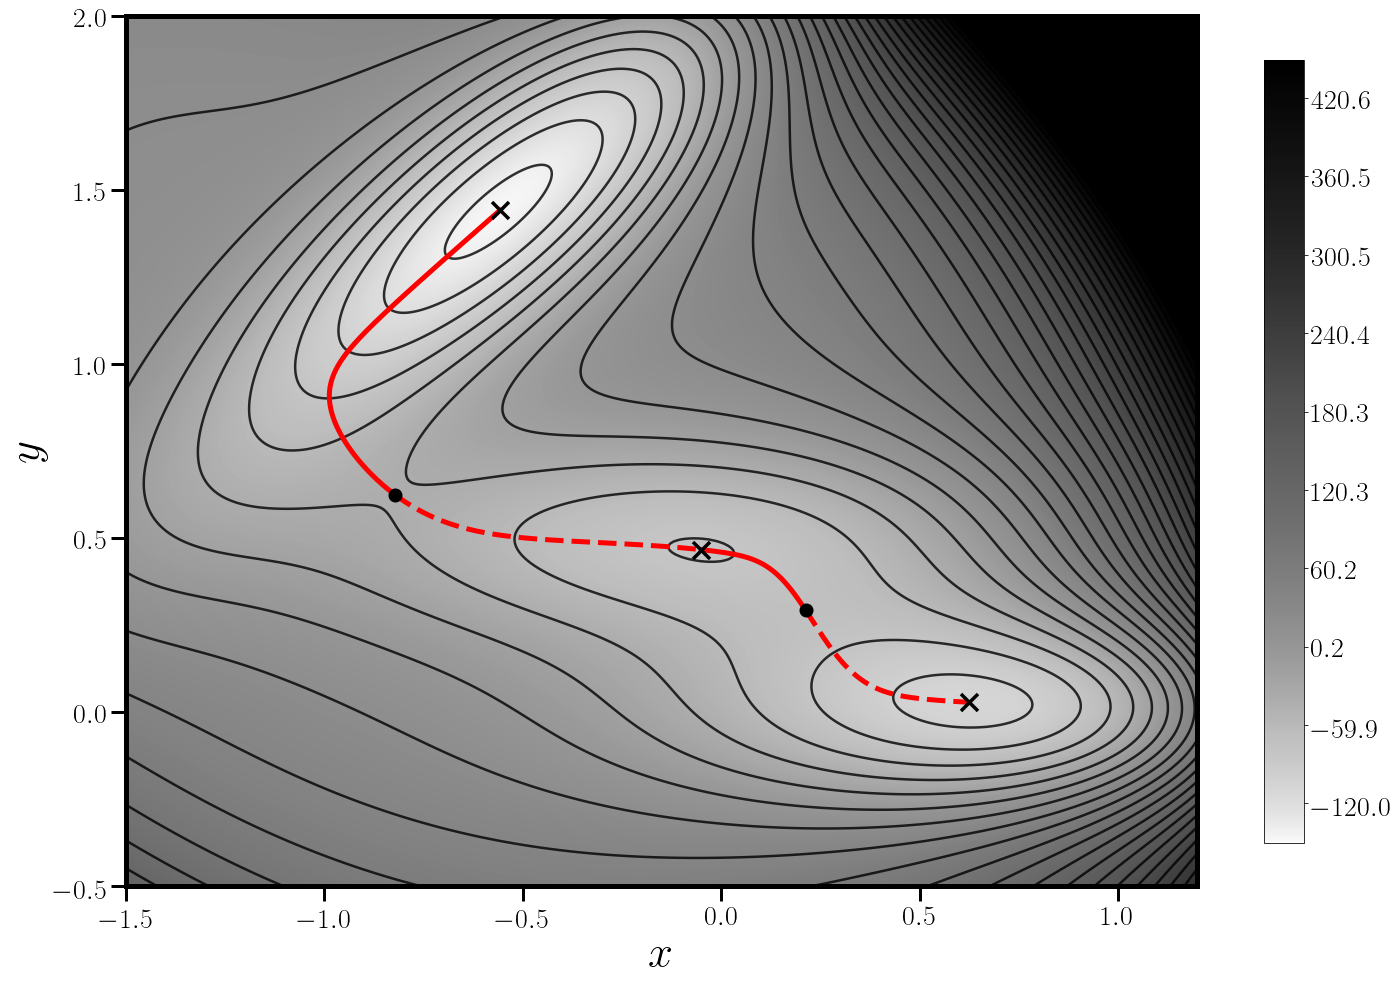

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Contour plot

level_min = -150
level_max = 450
level_N = 1000
levels = np.linspace(level_min, level_max, level_N)
levels = list(levels)

xmin, xmax = -1.5, 1.2
ymin, ymax = -0.5, 2

X, Y = np.meshgrid(np.linspace(xmin, xmax, 400), np.linspace(ymin, ymax, 400))
Z = system_pot(X, Y)

ax.fill([xmin, xmin, xmax, xmax, xmin],[ymax, ymin, ymin, ymax, ymax], "black", zorder=-1)

cpf = ax.contourf(X,Y,Z, cmap=cm.Greys_r.reversed(), levels=levels,
                 norm=colors.PowerNorm(gamma=0.5))
colours = [(0,0,0,0.8) for level in cpf.levels]
cp = ax.contour(X, Y, Z, 200, colors=colours, linewidths=contour_linewidth)

cbar = fig.colorbar(cpf, ax=ax, shrink=0.9)
cbar.ax.tick_params(labelsize=barlegend_font_size) 

# Plot path

for mtype, m in paths:
    ff.set_order(int(len(m)/2))
    
    instanton_color = het_instanton_color if mtype=="het" else sto_instanton_color
    instanton_linewidth = het_instanton_linewidth  if mtype=="het" else sto_instanton_linewidth 
    instanton_linestyle = het_instanton_linestyle if mtype=="het" else sto_instanton_linestyle
    
    ts = np.linspace(-1, 1, 1000)
    xs, vs = ff.evaluate(m, ts)
    plt.plot(xs[:,0], xs[:,1], color=instanton_color, linewidth=instanton_linewidth, linestyle=instanton_linestyle)

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xc[0], e_xc[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xs1[0], e_xs1[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)
plt.plot(e_xs2[0], e_xs2[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$x$', fontsize=axes_font_size)
ax.set_ylabel(r'$y$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('muller_brown_instanton.png', bbox_inches='tight')
plt.show()

#### Lagrangian

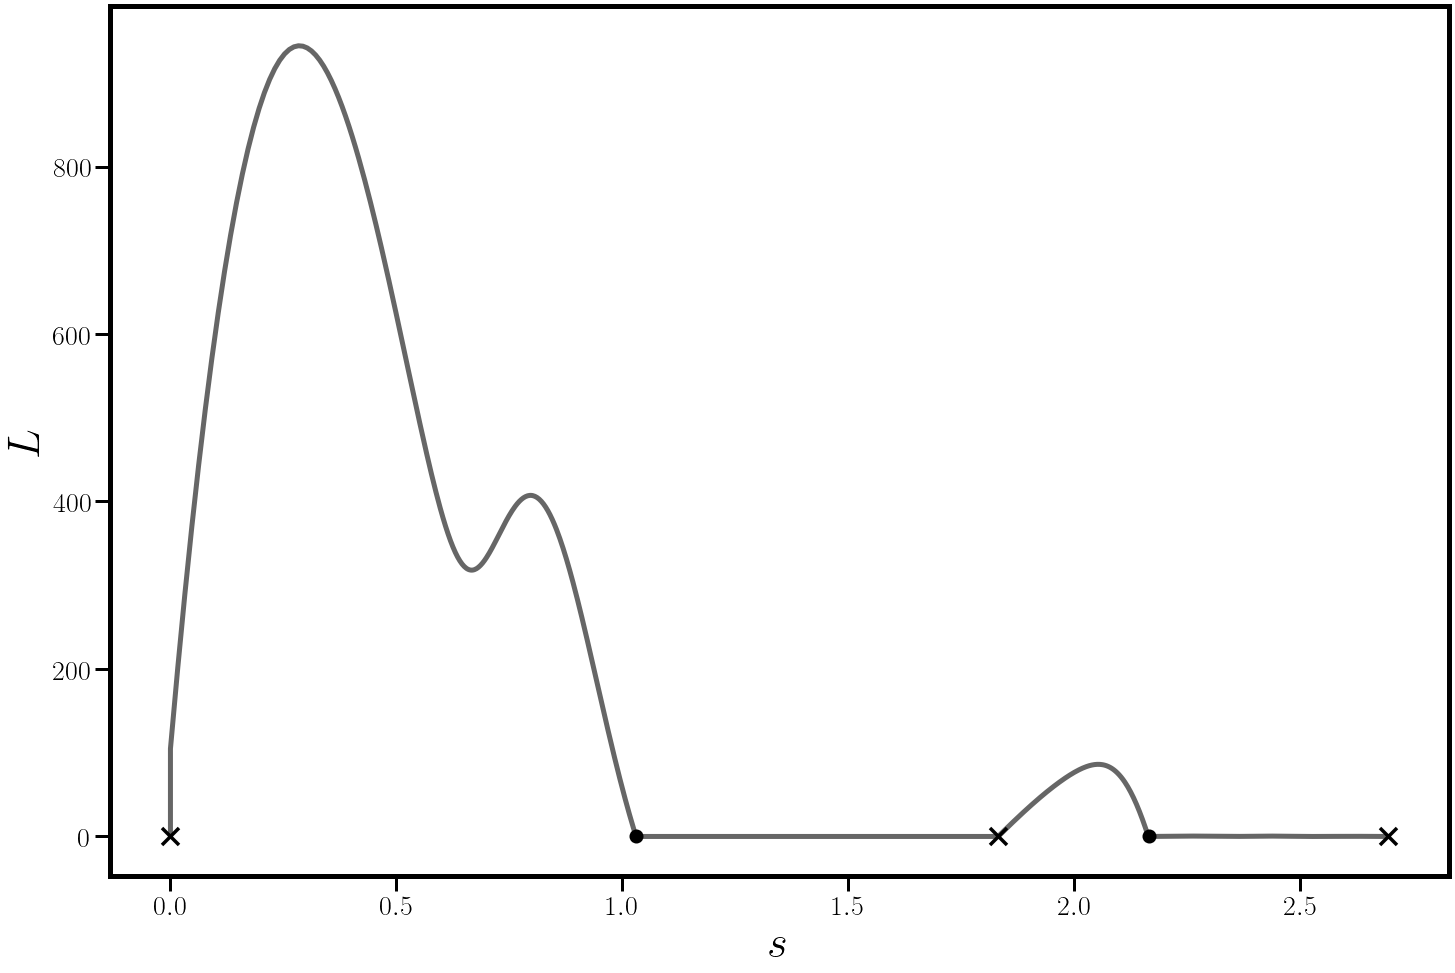

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Setup lagrangian data

m = np.array([-0.55822363, -0.80910208, -0.98605828, -0.84207228, -0.55248419,
       -0.23678387,  0.12368507,  0.28496535,  0.51983973,  0.6234994 ,
        1.44172584,  1.18792502,  0.9104756 ,  0.64216095,  0.5094209 ,
        0.48142532,  0.40802466,  0.15713297,  0.03564053,  0.02803776])
ls = np.array([1.99831382e-09, 1.04826792e+02, 2.01148244e+02, 2.89429646e+02,       3.70120285e+02, 4.43653491e+02, 5.10446657e+02, 5.70901271e+02,       6.25402958e+02, 6.74321560e+02, 7.18011252e+02, 7.56810697e+02,       7.91043244e+02, 8.21017169e+02, 8.47025952e+02, 8.69348586e+02,       8.88249925e+02, 9.03981055e+02, 9.16779686e+02, 9.26870570e+02,       9.34465926e+02, 9.39765885e+02, 9.42958942e+02, 9.44222405e+02,       9.43722860e+02, 9.41616624e+02, 9.38050203e+02, 9.33160744e+02,       9.27076476e+02, 9.19917154e+02, 9.11794480e+02, 9.02812524e+02,       8.93068133e+02, 8.82651319e+02, 8.71645649e+02, 8.60128605e+02,       8.48171946e+02, 8.35842043e+02, 8.23200211e+02, 8.10303018e+02,       7.97202586e+02, 7.83946872e+02, 7.70579946e+02, 7.57142241e+02,       7.43670798e+02, 7.30199503e+02, 7.16759297e+02, 7.03378386e+02,       6.90082435e+02, 6.76894751e+02, 6.63836451e+02, 6.50926628e+02,       6.38182496e+02, 6.25619538e+02, 6.13251630e+02, 6.01091170e+02,       5.89149192e+02, 5.77435470e+02, 5.65958619e+02, 5.54726189e+02,       5.43744746e+02, 5.33019958e+02, 5.22556663e+02, 5.12358938e+02,       5.02430164e+02, 4.92773083e+02, 4.83389849e+02, 4.74282078e+02,       4.65450897e+02, 4.56896979e+02, 4.48620584e+02, 4.40621595e+02,       4.32899547e+02, 4.25453656e+02, 4.18282848e+02, 4.11385777e+02,       4.04760854e+02, 3.98406260e+02, 3.92319967e+02, 3.86499754e+02,       3.80943219e+02, 3.75647794e+02, 3.70610753e+02, 3.65829226e+02,       3.61300207e+02, 3.57020560e+02, 3.52987027e+02, 3.49196236e+02,       3.45644704e+02, 3.42328842e+02, 3.39244961e+02, 3.36389273e+02,       3.33757898e+02, 3.31346862e+02, 3.29152104e+02, 3.27169474e+02,       3.25394739e+02, 3.23823582e+02, 3.22451603e+02, 3.21274325e+02,       3.20287190e+02, 3.19485563e+02, 3.18864734e+02, 3.18419918e+02,       3.18146255e+02, 3.18038816e+02, 3.18092599e+02, 3.18302534e+02,       3.18663484e+02, 3.19170245e+02, 3.19817552e+02, 3.20600074e+02,       3.21512423e+02, 3.22549152e+02, 3.23704760e+02, 3.24973689e+02,       3.26350336e+02, 3.27829047e+02, 3.29404125e+02, 3.31069829e+02,       3.32820384e+02, 3.34649976e+02, 3.36552764e+02, 3.38522876e+02,       3.40554420e+02, 3.42641483e+02, 3.44778140e+02, 3.46958454e+02,       3.49176484e+02, 3.51426288e+02, 3.53701931e+02, 3.55997485e+02,       3.58307042e+02, 3.60624712e+02, 3.62944632e+02, 3.65260975e+02,       3.67567949e+02, 3.69859809e+02, 3.72130861e+02, 3.74375467e+02,       3.76588054e+02, 3.78763117e+02, 3.80895229e+02, 3.82979043e+02,       3.85009303e+02, 3.86980846e+02, 3.88888613e+02, 3.90727649e+02,       3.92493116e+02, 3.94180294e+02, 3.95784588e+02, 3.97301536e+02,       3.98726811e+02, 4.00056232e+02, 4.01285762e+02, 4.02411519e+02,       4.03429779e+02, 4.04336980e+02, 4.05129728e+02, 4.05804798e+02,       4.06359143e+02, 4.06789894e+02, 4.07094361e+02, 4.07270045e+02,       4.07314629e+02, 4.07225992e+02, 4.07002201e+02, 4.06641519e+02,       4.06142406e+02, 4.05503516e+02, 4.04723703e+02, 4.03802018e+02,       4.02737710e+02, 4.01530225e+02, 4.00179206e+02, 3.98684494e+02,       3.97046121e+02, 3.95264315e+02, 3.93339494e+02, 3.91272262e+02,       3.89063413e+02, 3.86713919e+02, 3.84224936e+02, 3.81597791e+02,       3.78833986e+02, 3.75935190e+02, 3.72903233e+02, 3.69740106e+02,       3.66447952e+02, 3.63029062e+02, 3.59485871e+02, 3.55820948e+02,       3.52036997e+02, 3.48136844e+02, 3.44123438e+02, 3.39999837e+02,       3.35769208e+02, 3.31434816e+02, 3.27000023e+02, 3.22468273e+02,       3.17843095e+02, 3.13128089e+02, 3.08326920e+02, 3.03443316e+02,       2.98481056e+02, 2.93443967e+02, 2.88335915e+02, 2.83160799e+02,       2.77922543e+02, 2.72625095e+02, 2.67272411e+02, 2.61868460e+02,       2.56417209e+02, 2.50922620e+02, 2.45388646e+02, 2.39819221e+02,       2.34218260e+02, 2.28589648e+02, 2.22937239e+02, 2.17264848e+02,       2.11576247e+02, 2.05875162e+02, 2.00165268e+02, 1.94450182e+02,       1.88733462e+02, 1.83018603e+02, 1.77309030e+02, 1.71608100e+02,       1.65919096e+02, 1.60245222e+02, 1.54589604e+02, 1.48955286e+02,       1.43345227e+02, 1.37762300e+02, 1.32209291e+02, 1.26688894e+02,       1.21203714e+02, 1.15756261e+02, 1.10348954e+02, 1.04984116e+02,       9.96639784e+01, 9.43906733e+01, 8.91662398e+01, 8.39926208e+01,       7.88716640e+01, 7.38051219e+01, 6.87946524e+01, 6.38418194e+01,       5.89480932e+01, 5.41148518e+01, 4.93433817e+01, 4.46348792e+01,       3.99904514e+01, 3.54111174e+01, 3.08978105e+01, 2.64513789e+01,       2.20725879e+01, 1.77621213e+01, 1.35205835e+01, 9.34850097e+00,       5.24632467e+00, 1.21443162e+00, 7.71964781e-05, 2.11039784e-04,       3.73057577e-04, 5.64447675e-04, 7.86196144e-04, 1.03908026e-03,       1.32367246e-03, 1.64034528e-03, 1.98927711e-03, 2.37045877e-03,       2.78370086e-03, 3.22864163e-03, 3.70475559e-03, 4.21136245e-03,       4.74763661e-03, 5.31261689e-03, 5.90521666e-03, 6.52423404e-03,       7.16836234e-03, 7.83620051e-03, 8.52626366e-03, 9.23699347e-03,       9.96676854e-03, 1.07139145e-02, 1.14767142e-02, 1.22534172e-02,       1.30422491e-02, 1.38414212e-02, 1.46491386e-02, 1.54636089e-02,       1.62830501e-02, 1.71056980e-02, 1.79298136e-02, 1.87536889e-02,       1.95756540e-02, 2.03940819e-02, 2.12073939e-02, 2.20140645e-02,       2.28126250e-02, 2.36016675e-02, 2.43798480e-02, 2.51458890e-02,       2.58985817e-02, 2.66367881e-02, 2.73594419e-02, 2.80655497e-02,       2.87541916e-02, 2.94245210e-02, 3.00757649e-02, 3.07072230e-02,       3.13182671e-02, 3.19083397e-02, 3.24769530e-02, 3.30236866e-02,       3.35481865e-02, 3.40501622e-02, 3.45293851e-02, 3.49856856e-02,       3.54189509e-02, 3.58291221e-02, 3.62161918e-02, 3.65802007e-02,       3.69212354e-02, 3.72394251e-02, 3.75349386e-02, 3.78079816e-02,       3.80587935e-02, 3.82876448e-02, 3.84948341e-02, 3.86806851e-02,       3.88455442e-02, 3.89897774e-02, 3.91137679e-02, 3.92179137e-02,       3.93026250e-02, 3.93683217e-02, 3.94154314e-02, 3.94443875e-02,       3.94556265e-02, 3.94495868e-02, 3.94267065e-02, 3.93874220e-02,       3.93321661e-02, 3.92613671e-02, 3.91754470e-02, 3.90748206e-02,       3.89598942e-02, 3.88310650e-02, 3.86887199e-02, 3.85332350e-02,       3.83649748e-02, 3.81842918e-02, 3.79915262e-02, 3.77870052e-02,       3.75710432e-02, 3.73439415e-02, 3.71059879e-02, 3.68574575e-02,       3.65986122e-02, 3.63297011e-02, 3.60509607e-02, 3.57626153e-02,       3.54648775e-02, 3.51579484e-02, 3.48420184e-02, 3.45172675e-02,       3.41838660e-02, 3.38419753e-02, 3.34917485e-02, 3.31333312e-02,       3.27668621e-02, 3.23924739e-02, 3.20102942e-02, 3.16204464e-02,       3.12230504e-02, 3.08182235e-02, 3.04060816e-02, 2.99867397e-02,       2.95603132e-02, 2.91269184e-02, 2.86866740e-02, 2.82397016e-02,       2.77861266e-02, 2.73260794e-02, 2.68596962e-02, 2.63871199e-02,       2.59085008e-02, 2.54239976e-02, 2.49337784e-02, 2.44380213e-02,       2.39369151e-02, 2.34306604e-02, 2.29194700e-02, 2.24035698e-02,       2.18831994e-02, 2.13586126e-02, 2.08300782e-02, 2.02978803e-02,       1.97623190e-02, 1.92237108e-02, 1.86823888e-02, 1.81387034e-02,       1.75930222e-02, 1.70457306e-02, 1.64972318e-02, 1.59479469e-02,       1.53983151e-02, 1.48487937e-02, 1.42998580e-02, 1.37520013e-02,       1.32057345e-02, 1.26615864e-02, 1.21201027e-02, 1.15818465e-02,       1.10473972e-02, 1.05173504e-02, 9.99231750e-03, 9.47292472e-03,       8.95981292e-03, 8.45363669e-03, 7.95506369e-03, 7.46477386e-03,       6.98345860e-03, 6.51181989e-03, 6.05056935e-03, 5.60042729e-03,       5.16212166e-03, 4.73638706e-03, 4.32396357e-03, 3.92559567e-03,       3.54203105e-03, 3.17401944e-03, 2.82231135e-03, 2.48765684e-03,       2.17080426e-03, 1.87249891e-03, 1.59348178e-03, 1.33448819e-03,       1.09624649e-03, 8.79476651e-04, 6.84888969e-04, 5.13182688e-04,       3.65044645e-04, 2.41147923e-04, 1.42150497e-04, 6.86939022e-05,       2.14019016e-05, 8.79174969e-07, 7.71001945e-06, 4.24570705e-05,       1.05660043e-04, 1.97834497e-04, 3.19470625e-04, 4.71032070e-04,       6.52954774e-04, 8.65645851e-04, 1.10948250e-03, 1.38481095e-03,       1.69194544e-03, 2.03116724e-03, 2.40272368e-03, 2.80682729e-03,       3.24365491e-03, 3.71334687e-03, 4.21600620e-03, 4.75169794e-03,       5.32044837e-03, 5.92224442e-03, 6.55703307e-03, 7.22472075e-03,       7.92517285e-03, 8.65821326e-03, 9.42362394e-03, 1.02211445e-02,       1.10504721e-02, 1.19112606e-02, 1.28031212e-02, 1.37256213e-02,       1.46782852e-02, 1.56605933e-02, 1.66719826e-02, 1.77118463e-02,       1.87795342e-02, 1.98743523e-02, 2.09955635e-02, 2.21423873e-02,       2.33140005e-02, 2.45095370e-02, 2.57280883e-02, 2.69687041e-02,       2.82303925e-02, 2.95121203e-02, 3.08128139e-02, 3.21313596e-02,       3.34666044e-02, 3.48173563e-02, 3.61823857e-02, 3.75604253e-02,       3.89501716e-02, 4.03502855e-02, 4.17593934e-02, 4.31760879e-02,       4.45989290e-02, 4.60264454e-02, 4.74571353e-02, 4.88894678e-02,       5.03218843e-02, 5.17527996e-02, 5.31806035e-02, 5.46036622e-02,       5.60203199e-02, 5.74289002e-02, 5.88277080e-02, 6.02150312e-02,       6.15891425e-02, 6.29483013e-02, 6.42907554e-02, 6.56147436e-02,       6.69184970e-02, 6.82002421e-02, 6.94582021e-02, 7.06906002e-02,       7.18956609e-02, 7.30716136e-02, 7.42166942e-02, 7.53291481e-02,       7.64072331e-02, 7.74492217e-02, 7.84534042e-02, 7.94180915e-02,       8.03416182e-02, 8.12223452e-02, 8.20586633e-02, 8.28489958e-02,       8.35918021e-02, 8.42855809e-02, 8.49288730e-02, 8.55202653e-02,       8.60583936e-02, 8.65419462e-02, 8.69696674e-02, 8.73403608e-02,       8.76528928e-02, 8.79061959e-02, 8.80992724e-02, 8.82311977e-02,       8.83011238e-02, 8.83082825e-02, 8.82519893e-02, 8.81316461e-02,       8.79467447e-02, 8.76968703e-02, 8.73817044e-02, 8.70010279e-02,       8.65547242e-02, 8.60427818e-02, 8.54652976e-02, 8.48224790e-02,       8.41146467e-02, 8.33422370e-02, 8.25058038e-02, 8.16060213e-02,       8.06436848e-02, 7.96197132e-02, 7.85351500e-02, 7.73911647e-02,       7.61890536e-02, 7.49302404e-02, 7.36162769e-02, 7.22488430e-02,       7.08297466e-02, 6.93609231e-02, 6.78444345e-02, 6.62824686e-02,       6.46773374e-02, 6.30314751e-02, 6.13474361e-02, 5.96278925e-02,       5.78756310e-02, 5.60935497e-02, 5.42846540e-02, 5.24520528e-02,       5.05989537e-02, 4.87286578e-02, 4.68445546e-02, 4.49501156e-02,       4.30488882e-02, 4.11444886e-02, 3.92405947e-02, 3.73409383e-02,       3.54492964e-02, 3.35694834e-02, 3.17053409e-02, 2.98607289e-02,       2.80395151e-02, 2.62455650e-02, 2.44827304e-02, 2.27548383e-02,       2.10656790e-02, 1.94189943e-02, 1.78184643e-02, 1.62676950e-02,       1.47702048e-02, 1.33294109e-02, 1.19486154e-02, 1.06309916e-02,       9.37956871e-03, 8.19721806e-03, 7.08663785e-03, 6.05033839e-03,       5.09062698e-03, 4.20959282e-03, 3.40909186e-03, 2.69073168e-03,       2.05585643e-03, 1.50553186e-03, 1.04053058e-03, 6.61317444e-04,       3.68035276e-04, 1.60490914e-04, 3.81416218e-05, 8.19689276e-08,       4.50312235e-05, 1.71321322e-04, 3.76885490e-04, 6.59247574e-04,       1.01551217e-03, 1.44235558e-03, 1.93601775e-03, 2.49229518e-03,       3.10653487e-03, 3.77362950e-03, 4.48801380e-03, 5.24366220e-03,       6.03408786e-03, 6.85234321e-03, 7.69102194e-03, 8.54226260e-03,       9.39775393e-03, 1.02487418e-02, 1.10860381e-02, 1.19000314e-02,       1.26806996e-02, 1.34176242e-02, 1.41000076e-02, 1.47166910e-02,       1.52561758e-02, 1.57066466e-02, 1.60559960e-02, 1.62918523e-02,       1.64016091e-02, 1.63724573e-02, 1.61914192e-02, 1.58453849e-02,       1.53211509e-02, 1.46054613e-02, 1.36850505e-02, 1.25466883e-02,       1.11772275e-02, 9.56365294e-03, 7.69313276e-03, 5.55307121e-03,       3.13116354e-03, 4.15452211e-04, 1.08592722e+00, 2.35168182e+00,       3.61440468e+00, 4.87385730e+00, 6.12980536e+00, 7.38201889e+00,       8.63027237e+00, 9.87434489e+00, 1.11140202e+01, 1.23490869e+01,       1.35793385e+01, 1.48045734e+01, 1.60245952e+01, 1.72392125e+01,       1.84482390e+01, 1.96514938e+01, 2.08488010e+01, 2.20399902e+01,       2.32248960e+01, 2.44033583e+01, 2.55752223e+01, 2.67403382e+01,       2.78985613e+01, 2.90497521e+01, 3.01937760e+01, 3.13305031e+01,       3.24598086e+01, 3.35815718e+01, 3.46956771e+01, 3.58020128e+01,       3.69004716e+01, 3.79909499e+01, 3.90733483e+01, 4.01475707e+01,       4.12135243e+01, 4.22711196e+01, 4.33202698e+01, 4.43608906e+01,       4.53929001e+01, 4.64162182e+01, 4.74307664e+01, 4.84364677e+01,       4.94332456e+01, 5.04210244e+01, 5.13997285e+01, 5.23692818e+01,       5.33296075e+01, 5.42806276e+01, 5.52222624e+01, 5.61544300e+01,       5.70770457e+01, 5.79900215e+01, 5.88932658e+01, 5.97866822e+01,       6.06701695e+01, 6.15436209e+01, 6.24069230e+01, 6.32599557e+01,       6.41025910e+01, 6.49346926e+01, 6.57561151e+01, 6.65667031e+01,       6.73662903e+01, 6.81546994e+01, 6.89317403e+01, 6.96972098e+01,       7.04508908e+01, 7.11925512e+01, 7.19219429e+01, 7.26388012e+01,       7.33428434e+01, 7.40337685e+01, 7.47112554e+01, 7.53749628e+01,       7.60245275e+01, 7.66595638e+01, 7.72796622e+01, 7.78843889e+01,       7.84732841e+01, 7.90458618e+01, 7.96016081e+01, 8.01399808e+01,       8.06604080e+01, 8.11622875e+01, 8.16449858e+01, 8.21078371e+01,       8.25501427e+01, 8.29711700e+01, 8.33701521e+01, 8.37462867e+01,       8.40987357e+01, 8.44266247e+01, 8.47290423e+01, 8.50050399e+01,       8.52536315e+01, 8.54737930e+01, 8.56644628e+01, 8.58245409e+01,       8.59528899e+01, 8.60483346e+01, 8.61096625e+01, 8.61356244e+01,       8.61249349e+01, 8.60762732e+01, 8.59882839e+01, 8.58595783e+01,       8.56887353e+01, 8.54743029e+01, 8.52148000e+01, 8.49087177e+01,       8.45545214e+01, 8.41506528e+01, 8.36955323e+01, 8.31875611e+01,       8.26251242e+01, 8.20065926e+01, 8.13303268e+01, 8.05946799e+01,       7.97980002e+01, 7.89386357e+01, 7.80149369e+01, 7.70252608e+01,       7.59679752e+01, 7.48414625e+01, 7.36441238e+01, 7.23743836e+01,       7.10306942e+01, 6.96115402e+01, 6.81154434e+01, 6.65409675e+01,       6.48867231e+01, 6.31513727e+01, 6.13336355e+01, 5.94322930e+01,       5.74461934e+01, 5.53742575e+01, 5.32154832e+01, 5.09689511e+01,       4.86338291e+01, 4.62093779e+01, 4.36949557e+01, 4.10900229e+01,       3.83941474e+01, 3.56070087e+01, 3.27284025e+01, 2.97582453e+01,       2.66965782e+01, 2.35435710e+01, 2.02995258e+01, 1.69648805e+01,       1.35402122e+01, 1.00262398e+01, 6.42382671e+00, 2.73398317e+00,       3.49795860e-03, 1.68792198e-02, 3.11775164e-02, 4.63493529e-02,       6.23444778e-02, 7.91060645e-02, 9.65709374e-02, 1.14669840e-01,       1.33327749e-01, 1.52464224e-01, 1.71993809e-01, 1.91826464e-01,       2.11868039e-01, 2.32020787e-01, 2.52183906e-01, 2.72254115e-01,       2.92126263e-01, 3.11693960e-01, 3.30850232e-01, 3.49488197e-01,       3.67501757e-01, 3.84786302e-01, 4.01239422e-01, 4.16761624e-01,       4.31257046e-01, 4.44634171e-01, 4.56806526e-01, 4.67693368e-01,       4.77220352e-01, 4.85320174e-01, 4.91933180e-01, 4.97007950e-01,       5.00501830e-01, 5.02381430e-01, 5.02623064e-01, 5.01213148e-01,       4.98148520e-01, 4.93436718e-01, 4.87096178e-01, 4.79156362e-01,       4.69657817e-01, 4.58652153e-01, 4.46201942e-01, 4.32380532e-01,       4.17271785e-01, 4.00969719e-01, 3.83578075e-01, 3.65209791e-01,       3.45986396e-01, 3.26037317e-01, 3.05499109e-01, 2.84514603e-01,       2.63231980e-01, 2.41803777e-01, 2.20385826e-01, 1.99136134e-01,       1.78213710e-01, 1.57777350e-01, 1.37984379e-01, 1.18989375e-01,       1.00942866e-01, 8.39900275e-02, 6.82693730e-02, 5.39114719e-02,       4.10376851e-02, 2.97589440e-02, 2.01745802e-02, 1.23712192e-02,       6.42175295e-03, 2.38440064e-03, 3.01873130e-04, 2.00651351e-04,       2.09039090e-03, 5.96346349e-03, 1.17946453e-02, 1.95409613e-02,       2.91416930e-02, 4.05185563e-02, 5.35760549e-02, 6.82020111e-02,       8.42682772e-02, 1.01631626e-01, 1.20134817e-01, 1.39607838e-01,       1.59869308e-01, 1.80728039e-01, 2.01984744e-01, 2.23433873e-01,       2.44865569e-01, 2.66067720e-01, 2.86828089e-01, 3.06936503e-01,       3.26187076e-01, 3.44380436e-01, 3.61325940e-01, 3.76843849e-01,       3.90767420e-01, 4.02944916e-01, 4.13241480e-01, 4.21540857e-01,       4.27746948e-01, 4.31785152e-01, 4.33603487e-01, 4.33173471e-01,       4.30490730e-01, 4.25575342e-01, 4.18471878e-01, 4.09249154e-01,       3.97999681e-01, 3.84838810e-01, 3.69903577e-01, 3.53351267e-01,       3.35357689e-01, 3.16115198e-01, 2.95830479e-01, 2.74722102e-01,       2.53017910e-01, 2.30952238e-01, 2.08763016e-01, 1.86688793e-01,       1.64965713e-01, 1.43824493e-01, 1.23487436e-01, 1.04165534e-01,       8.60556790e-02, 6.93380551e-02, 5.41737189e-02, 4.07024251e-02,       2.90407221e-02, 1.92803506e-02, 1.14869696e-02, 5.69923285e-03,       1.92823316e-03, 1.57325158e-04, 3.42335142e-04, 2.41215880e-03,       6.26974346e-03, 1.17934458e-02, 1.88387507e-02, 2.72403329e-02,       3.68144356e-02, 4.73615395e-02, 5.86692882e-02, 7.05156340e-02,       8.26721637e-02, 9.49075610e-02, 1.06991161e-01, 1.18696550e-01,       1.29805151e-01, 1.40109765e-01, 1.49417996e-01, 1.57555510e-01,       1.64369093e-01, 1.69729434e-01, 1.73533593e-01, 1.75707108e-01,       1.76205678e-01, 1.75016392e-01, 1.72158452e-01, 1.67683343e-01,       1.61674428e-01, 1.54245922e-01, 1.45541219e-01, 1.35730562e-01,       1.25008018e-01, 1.13587773e-01, 1.01699738e-01, 8.95844847e-02,       7.74875356e-02, 6.56530580e-02, 5.43170244e-02, 4.36999301e-02,       3.39991862e-02, 2.53813434e-02, 1.79743426e-02, 1.18600438e-02,       7.06734261e-03, 3.56626346e-03, 1.26350233e-03, 1.07941007e-13])

Nm = int(len(m)/2)
dim = 2
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)

ts = np.linspace(-1, 1, 1000)
xs, vs = ff.evaluate(m, ts)

ds = np.sqrt(vs[:,0]**2 + vs[:,1]**2 )
s = [np.trapz(ds[:i], x=ts[:i]) for i in range(len(ds))]

# Plot fixed points and lagrangian

ax.plot(s, ls, linewidth=lagrangian_linewidth, color = lagrangian_linecolor)

fixed_points = [
    ("min", e_xa),
    ("max", e_xs1),
    ("min", e_xb),
    ("max", e_xs2),
    ("min", e_xc)
]

for i in range(len(fixed_points)):
    t, f = fixed_points[i]
    d = xs - f
    d = d[:,0]**2 + d[:,1]**2
    sf = s[np.where(d==np.min(d))[0][0]]

    if t=="min":
        plt.plot(sf, 0, min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
    else:
        plt.plot(sf, 0, max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$s$', fontsize=axes_font_size)
ax.set_ylabel(r'$L$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('muller_brown_lagrangian.png', bbox_inches='tight')
plt.show()

## Maier-Stein

In [33]:
m_beta = 10
dim = 2

def system_a(u, v):
    return np.array([u - np.power(u, 3) - m_beta * u * np.power(v, 2),
           -(1 + np.power(u, 2))*v])

In [34]:
e_xa  = np.array([-1,0])
e_xb  = np.array([1,0])
e_xs = np.array([0,0])

paths = [
    ("sto", np.array([-1.        , -0.96646202, -0.83341607, -0.63031912, -0.44860907,
       -0.30749978, -0.19490086, -0.10222141, -0.02953301,  0.        ,
        0.        ,  0.06900627,  0.2011512 ,  0.29089534,  0.31252609,
        0.28274155,  0.21500821,  0.124843  ,  0.03745186,  0. ])),
    ("het", np.array([0.        , 0.03015369, 0.11697778, 0.25      , 0.41317591,
       0.58682409, 0.75      , 0.88302222, 0.96984631, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.]))
]

Nm = int(len(paths[0][1])/2)
dim = 2
   
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)

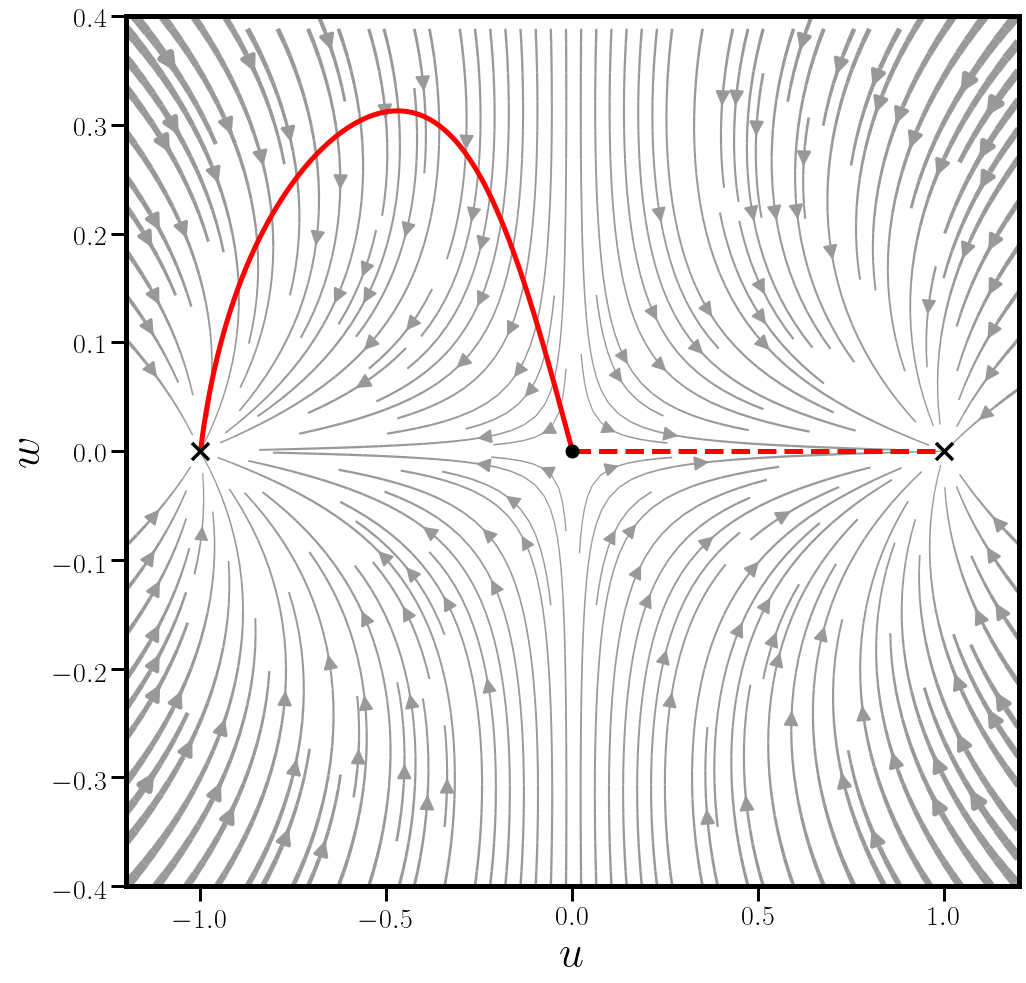

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Stream-plot

xmin, xmax = -1.2, 1.2
ymin, ymax = -0.4, 0.4

X, Y = np.meshgrid(np.linspace(xmin, xmax,400), np.linspace(ymin, ymax,400))
vx,vy=system_a(X,Y);
streamplot_linewidth=15
speed = np.sqrt(vx**2 + vy**2)
lw = (speed / speed.max())*(streamplot_linewidth_max - streamplot_linewidth_min) + streamplot_linewidth_min

ax.streamplot(X,Y, vx, vy, density=streamplot_density, color=streamplot_color, linewidth=lw, arrowsize=streamplot_arrowsize);

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Plot path

for mtype, m in paths:
    ff.set_order(int(len(m)/2))
    
    instanton_color = het_instanton_color if mtype=="het" else sto_instanton_color
    instanton_linewidth = het_instanton_linewidth  if mtype=="het" else sto_instanton_linewidth 
    instanton_linestyle = het_instanton_linestyle if mtype=="het" else sto_instanton_linestyle
    
    ts = np.linspace(-1, 1, 1000)
    xs, vs = ff.evaluate(m, ts)
    plt.plot(xs[:,0], xs[:,1], color=instanton_color, linewidth=instanton_linewidth, linestyle=instanton_linestyle)

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xs[0], e_xs[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w, plot_h)

plt.savefig('maier_stein_instanton.png', bbox_inches='tight')
plt.show()

#### Lagrangian

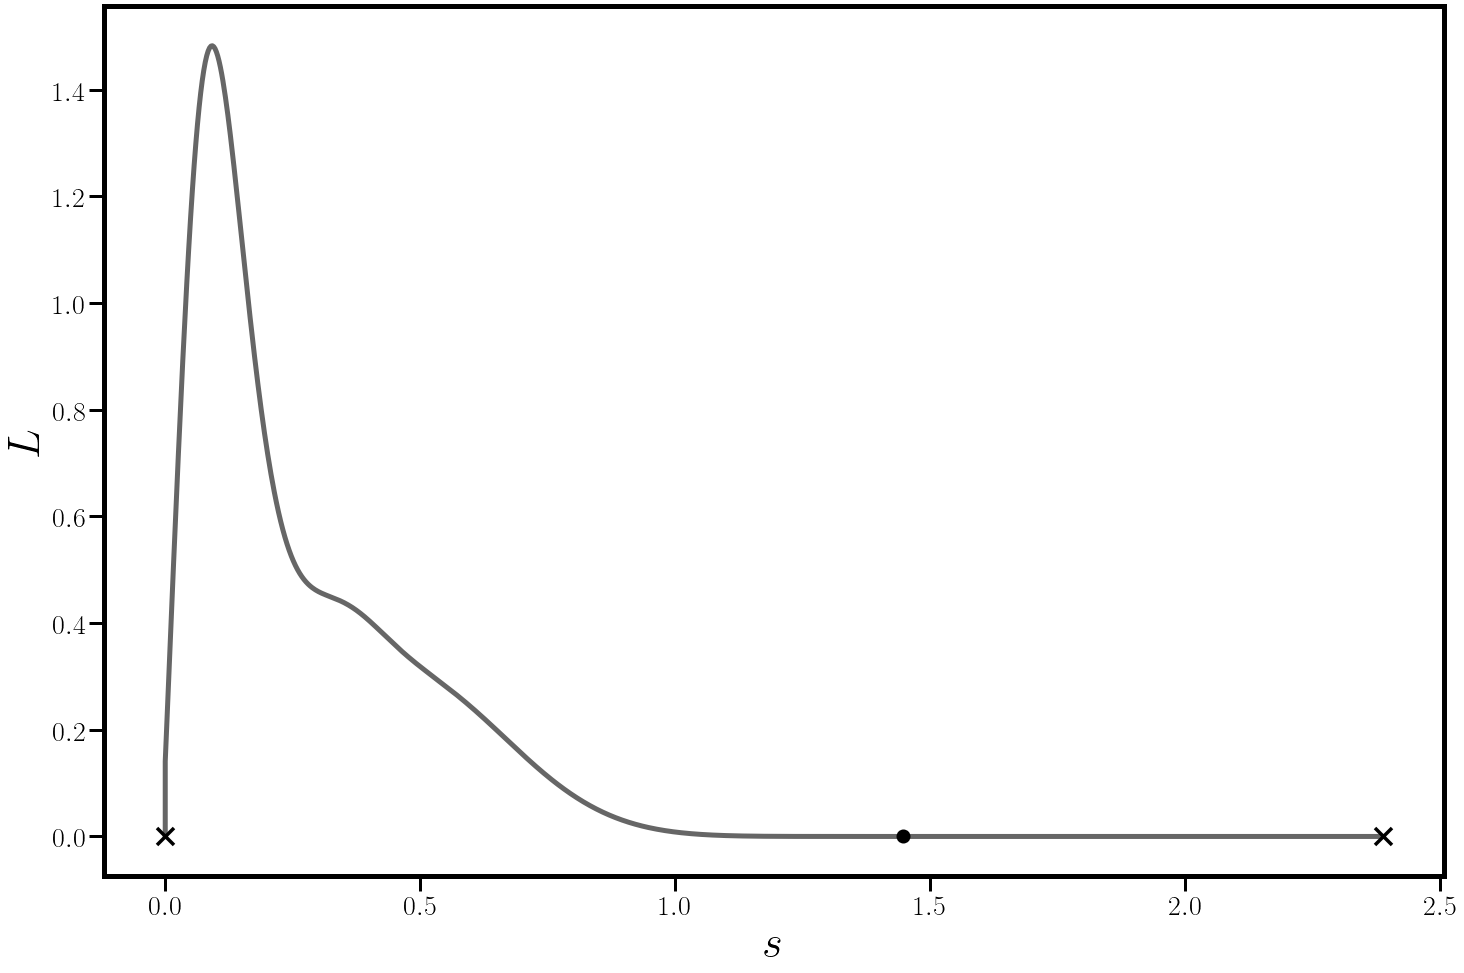

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Setup lagrangian data

m = np.array([-1.00000000e+00, -9.76965908e-01, -8.83272384e-01, -7.33209797e-01,       -5.99265116e-01, -4.47623500e-01, -2.63252185e-01, -1.11052137e-01,       -2.54505858e-02, -1.69293631e-03,  3.95390136e-05,  1.32809055e-02,        1.56666638e-01,  5.18691695e-01,  7.97509466e-01,  8.72422687e-01,        8.88150477e-01,  9.10221111e-01,  9.79829288e-01,  1.00000000e+00,        0.00000000e+00,  5.11495027e-02,  1.63730227e-01,  2.55190510e-01,        2.98392662e-01,  3.12483207e-01,  2.61514628e-01,  1.34645503e-01,        3.23014655e-02,  2.15286064e-03, -4.10558682e-06, -1.49532046e-06,        5.08474292e-07,  2.45525786e-07, -3.42808855e-07,  2.25627223e-07,       -1.19412285e-07, -5.43680001e-07,  5.06978600e-07,  0.00000000e+00])
ls = np.array([0.00000000e+00, 1.40837374e-01, 2.72706527e-01, 3.95868800e-01,       5.10595993e-01, 6.17168501e-01, 7.15873531e-01, 8.07003410e-01,       8.90853994e-01, 9.67723174e-01, 1.03790950e+00, 1.10171088e+00,       1.15942343e+00, 1.21134041e+00, 1.25775124e+00, 1.29894065e+00,       1.33518791e+00, 1.36676618e+00, 1.39394192e+00, 1.41697436e+00,       1.43611517e+00, 1.45160803e+00, 1.46368844e+00, 1.47258345e+00,       1.47851159e+00, 1.48168270e+00, 1.48229799e+00, 1.48054994e+00,       1.47662247e+00, 1.47069090e+00, 1.46292219e+00, 1.45347499e+00,       1.44249985e+00, 1.43013943e+00, 1.41652866e+00, 1.40179501e+00,       1.38605869e+00, 1.36943291e+00, 1.35202414e+00, 1.33393233e+00,       1.31525120e+00, 1.29606849e+00, 1.27646619e+00, 1.25652083e+00,       1.23630373e+00, 1.21588121e+00, 1.19531487e+00, 1.17466182e+00,       1.15397489e+00, 1.13330288e+00, 1.11269075e+00, 1.09217984e+00,       1.07180808e+00, 1.05161016e+00, 1.03161774e+00, 1.01185960e+00,       9.92361818e-01, 9.73147949e-01, 9.54239152e-01, 9.35654346e-01,       9.17410348e-01, 8.99522001e-01, 8.82002301e-01, 8.64862513e-01,       8.48112280e-01, 8.31759730e-01, 8.15811574e-01, 8.00273199e-01,       7.85148757e-01, 7.70441246e-01, 7.56152591e-01, 7.42283714e-01,       7.28834608e-01, 7.15804396e-01, 7.03191402e-01, 6.90993198e-01,       6.79206668e-01, 6.67828054e-01, 6.56853007e-01, 6.46276633e-01,       6.36093534e-01, 6.26297854e-01, 6.16883312e-01, 6.07843239e-01,       5.99170619e-01, 5.90858115e-01, 5.82898101e-01, 5.75282695e-01,       5.68003783e-01, 5.61053049e-01, 5.54421997e-01, 5.48101975e-01,       5.42084201e-01, 5.36359783e-01, 5.30919737e-01, 5.25755010e-01,       5.20856498e-01, 5.16215064e-01, 5.11821551e-01, 5.07666806e-01,       5.03741687e-01, 5.00037084e-01, 4.96543930e-01, 4.93253215e-01,       4.90155997e-01, 4.87243418e-01, 4.84506712e-01, 4.81937216e-01,       4.79526383e-01, 4.77265786e-01, 4.75147136e-01, 4.73162282e-01,       4.71303223e-01, 4.69562117e-01, 4.67931286e-01, 4.66403220e-01,       4.64970591e-01, 4.63626249e-01, 4.62363235e-01, 4.61174782e-01,       4.60054319e-01, 4.58995477e-01, 4.57992089e-01, 4.57038198e-01,       4.56128054e-01, 4.55256120e-01, 4.54417073e-01, 4.53605802e-01,       4.52817415e-01, 4.52047234e-01, 4.51290797e-01, 4.50543860e-01,       4.49802393e-01, 4.49062580e-01, 4.48320819e-01, 4.47573719e-01,       4.46818099e-01, 4.46050986e-01, 4.45269609e-01, 4.44471401e-01,       4.43653994e-01, 4.42815215e-01, 4.41953080e-01, 4.41065796e-01,       4.40151751e-01, 4.39209513e-01, 4.38237825e-01, 4.37235597e-01,       4.36201907e-01, 4.35135991e-01, 4.34037236e-01, 4.32905183e-01,       4.31739511e-01, 4.30540040e-01, 4.29306718e-01, 4.28039621e-01,       4.26738942e-01, 4.25404989e-01, 4.24038177e-01, 4.22639022e-01,       4.21208133e-01, 4.19746209e-01, 4.18254033e-01, 4.16732460e-01,       4.15182418e-01, 4.13604899e-01, 4.12000950e-01, 4.10371672e-01,       4.08718211e-01, 4.07041753e-01, 4.05343517e-01, 4.03624753e-01,       4.01886730e-01, 4.00130738e-01, 3.98358076e-01, 3.96570053e-01,       3.94767977e-01, 3.92953154e-01, 3.91126883e-01, 3.89290450e-01,       3.87445124e-01, 3.85592155e-01, 3.83732767e-01, 3.81868155e-01,       3.79999483e-01, 3.78127879e-01, 3.76254432e-01, 3.74380190e-01,       3.72506157e-01, 3.70633289e-01, 3.68762492e-01, 3.66894623e-01,       3.65030484e-01, 3.63170821e-01, 3.61316326e-01, 3.59467631e-01,       3.57625310e-01, 3.55789878e-01, 3.53961788e-01, 3.52141432e-01,       3.50329143e-01, 3.48525191e-01, 3.46729785e-01, 3.44943074e-01,       3.43165146e-01, 3.41396031e-01, 3.39635698e-01, 3.37884059e-01,       3.36140970e-01, 3.34406233e-01, 3.32679593e-01, 3.30960745e-01,       3.29249334e-01, 3.27544955e-01, 3.25847157e-01, 3.24155445e-01,       3.22469282e-01, 3.20788089e-01, 3.19111252e-01, 3.17438120e-01,       3.15768010e-01, 3.14100210e-01, 3.12433980e-01, 3.10768553e-01,       3.09103144e-01, 3.07436947e-01, 3.05769139e-01, 3.04098883e-01,       3.02425334e-01, 3.00747637e-01, 2.99064932e-01, 2.97376356e-01,       2.95681048e-01, 2.93978149e-01, 2.92266807e-01, 2.90546176e-01,       2.88815423e-01, 2.87073729e-01, 2.85320290e-01, 2.83554320e-01,       2.81775056e-01, 2.79981756e-01, 2.78173705e-01, 2.76350213e-01,       2.74510621e-01, 2.72654301e-01, 2.70780659e-01, 2.68889135e-01,       2.66979204e-01, 2.65050381e-01, 2.63102218e-01, 2.61134310e-01,       2.59146292e-01, 2.57137841e-01, 2.55108680e-01, 2.53058573e-01,       2.50987332e-01, 2.48894812e-01, 2.46780916e-01, 2.44645592e-01,       2.42488835e-01, 2.40310686e-01, 2.38111232e-01, 2.35890608e-01,       2.33648995e-01, 2.31386617e-01, 2.29103746e-01, 2.26800698e-01,       2.24477832e-01, 2.22135550e-01, 2.19774299e-01, 2.17394563e-01,       2.14996871e-01, 2.12581788e-01, 2.10149917e-01, 2.07701899e-01,       2.05238409e-01, 2.02760159e-01, 2.00267888e-01, 1.97762371e-01,       1.95244409e-01, 1.92714833e-01, 1.90174498e-01, 1.87624284e-01,       1.85065095e-01, 1.82497854e-01, 1.79923504e-01, 1.77343004e-01,       1.74757329e-01, 1.72167469e-01, 1.69574424e-01, 1.66979204e-01,       1.64382828e-01, 1.61786322e-01, 1.59190713e-01, 1.56597035e-01,       1.54006320e-01, 1.51419601e-01, 1.48837908e-01, 1.46262267e-01,       1.43693697e-01, 1.41133212e-01, 1.38581815e-01, 1.36040499e-01,       1.33510247e-01, 1.30992027e-01, 1.28486793e-01, 1.25995482e-01,       1.23519015e-01, 1.21058296e-01, 1.18614206e-01, 1.16187608e-01,       1.13779343e-01, 1.11390230e-01, 1.09021064e-01, 1.06672615e-01,       1.04345630e-01, 1.02040829e-01, 9.97589053e-02, 9.75005267e-02,       9.52663328e-02, 9.30569356e-02, 9.08729188e-02, 8.87148376e-02,       8.65832184e-02, 8.44785587e-02, 8.24013267e-02, 8.03519614e-02,       7.83308724e-02, 7.63384403e-02, 7.43750160e-02, 7.24409218e-02,       7.05364506e-02, 6.86618668e-02, 6.68174062e-02, 6.50032765e-02,       6.32196572e-02, 6.14667007e-02, 5.97445320e-02, 5.80532497e-02,       5.63929258e-02, 5.47636071e-02, 5.31653149e-02, 5.15980461e-02,       5.00617734e-02, 4.85564464e-02, 4.70819917e-02, 4.56383138e-02,       4.42252959e-02, 4.28428002e-02, 4.14906690e-02, 4.01687251e-02,       3.88767726e-02, 3.76145978e-02, 3.63819697e-02, 3.51786407e-02,       3.40043476e-02, 3.28588121e-02, 3.17417415e-02, 3.06528297e-02,       2.95917576e-02, 2.85581943e-02, 2.75517972e-02, 2.65722131e-02,       2.56190789e-02, 2.46920222e-02, 2.37906621e-02, 2.29146097e-02,       2.20634689e-02, 2.12368371e-02, 2.04343056e-02, 1.96554606e-02,       1.88998834e-02, 1.81671515e-02, 1.74568385e-02, 1.67685155e-02,       1.61017510e-02, 1.54561116e-02, 1.48311627e-02, 1.42264689e-02,       1.36415945e-02, 1.30761037e-02, 1.25295617e-02, 1.20015344e-02,       1.14915894e-02, 1.09992960e-02, 1.05242258e-02, 1.00659530e-02,       9.62405482e-03, 9.19811168e-03, 8.78770767e-03, 8.39243079e-03,       8.01187320e-03, 7.64563156e-03, 7.29330719e-03, 6.95450640e-03,       6.62884061e-03, 6.31592666e-03, 6.01538690e-03, 5.72684943e-03,       5.44994821e-03, 5.18432326e-03, 4.92962076e-03, 4.68549315e-03,       4.45159927e-03, 4.22760444e-03, 4.01318055e-03, 3.80800611e-03,       3.61176632e-03, 3.42415311e-03, 3.24486519e-03, 3.07360806e-03,       2.91009405e-03, 2.75404229e-03, 2.60517873e-03, 2.46323614e-03,       2.32795408e-03, 2.19907885e-03, 2.07636349e-03, 1.95956772e-03,       1.84845790e-03, 1.74280698e-03, 1.64239440e-03, 1.54700610e-03,       1.45643435e-03, 1.37047776e-03, 1.28894115e-03, 1.21163547e-03,       1.13837774e-03, 1.06899091e-03, 1.00330379e-03, 9.41150958e-04,       8.82372624e-04, 8.26814559e-04, 7.74327966e-04, 7.24769378e-04,       6.78000543e-04, 6.33888314e-04, 5.92304531e-04, 5.53125905e-04,       5.16233906e-04, 4.81514641e-04, 4.48858739e-04, 4.18161234e-04,       3.89321442e-04, 3.62242852e-04, 3.36833002e-04, 3.13003364e-04,       2.90669227e-04, 2.69749586e-04, 2.50167022e-04, 2.31847591e-04,       2.14720712e-04, 1.98719058e-04, 1.83778441e-04, 1.69837711e-04,       1.56838644e-04, 1.44725842e-04, 1.33446625e-04, 1.22950937e-04,       1.13191239e-04, 1.04122420e-04, 9.57016933e-05, 8.78885125e-05,       8.06444743e-05, 7.39332325e-05, 6.77204112e-05, 6.19735206e-05,       5.66618748e-05, 5.17565125e-05, 4.72301191e-05, 4.30569522e-05,       3.92127680e-05, 3.56747511e-05, 3.24214463e-05, 2.94326922e-05,       2.66895575e-05, 2.41742792e-05, 2.18702036e-05, 1.97617288e-05,       1.78342493e-05, 1.60741037e-05, 1.44685233e-05, 1.30055833e-05,       1.16741563e-05, 1.04638671e-05, 9.36504980e-06, 8.36870703e-06,       7.46647053e-06, 6.65056386e-06, 5.91376672e-06, 5.24938104e-06,       4.65119875e-06, 4.11347103e-06, 3.63087932e-06, 3.19850763e-06,       2.81181648e-06, 2.46661813e-06, 2.15905323e-06, 1.88556877e-06,       1.64289728e-06, 1.42803720e-06, 1.23823449e-06, 1.07096526e-06,       9.23919507e-07, 7.94985849e-07, 6.82237187e-07, 5.83917310e-07,       4.98428336e-07, 4.24318971e-07, 3.60273520e-07, 3.05101609e-07,       2.57728575e-07, 2.17186454e-07, 1.82605543e-07, 1.53206459e-07,       1.28292659e-07, 1.07243352e-07, 8.95067432e-08, 7.45935299e-08,       6.20705663e-08, 5.15545810e-08, 4.27058124e-08, 3.52213970e-08,       2.88283362e-08, 2.32759340e-08, 1.83278996e-08, 1.37554480e-08,       9.33775393e-09, 4.91019736e-09, 9.21662661e-10, 5.15933358e-11,       5.52785243e-10, 9.78193688e-10, 1.22714288e-09, 1.33137822e-09,       1.33226349e-09, 1.26444367e-09, 1.15423125e-09, 1.02083784e-09,       8.77986580e-10, 7.35305775e-10, 5.99400199e-10, 4.74637903e-10,       3.63720085e-10, 2.68095989e-10, 1.88270415e-10, 1.24037403e-10,       7.46627183e-11, 3.90298668e-11, 1.57591100e-11, 3.30550247e-12,       3.98454507e-14, 4.31515688e-12, 1.45205112e-11, 2.91236849e-11,       4.67038215e-11, 6.59752170e-11, 8.58032650e-11, 1.05213562e-10,       1.23395142e-10, 1.39698759e-10, 1.53631111e-10, 1.64845808e-10,       1.73131861e-10, 1.78400364e-10, 1.80669984e-10, 1.80051817e-10,       1.76734046e-10, 1.70966818e-10, 1.63047659e-10, 1.53307683e-10,       1.42098809e-10, 1.29782130e-10, 1.16717537e-10, 1.03254662e-10,       8.97251635e-11, 7.64363439e-11, 6.36660668e-11, 5.16589224e-11,       4.06235639e-11, 3.07311301e-11, 2.21146585e-11, 1.48693849e-11,       9.05382294e-12, 4.69151557e-12, 1.77334867e-12, 2.60323122e-13,       8.66821805e-14, 1.16329841e-12, 3.38122900e-12, 6.61535627e-12,       1.07280375e-11, 1.55726954e-11, 2.09972888e-11, 2.68476126e-11,       3.29703820e-11, 3.92160649e-11, 4.54414352e-11, 5.15118245e-11,       5.73030589e-11, 6.27030716e-11, 6.76131929e-11, 7.19491158e-11,       7.56415507e-11, 7.86365772e-11, 8.08957140e-11, 8.23957213e-11,       8.31281613e-11, 8.30987397e-11, 8.23264523e-11, 8.08425642e-11,       7.86894538e-11, 7.59193342e-11, 7.25928978e-11, 6.87778979e-11,       6.45476966e-11, 5.99797976e-11, 5.51544053e-11, 5.01530007e-11,       4.50569838e-11, 3.99463808e-11, 3.48986374e-11, 2.99875099e-11,       2.52820698e-11, 2.08458233e-11, 1.67359546e-11, 1.30027039e-11,       9.68886863e-12, 6.82944933e-12, 4.45140886e-12, 2.57357937e-12,       1.20667625e-12, 3.53436030e-13, 8.86617169e-15, 1.60585087e-13,       7.89269691e-13, 1.86917669e-12, 3.36872370e-12, 5.25115715e-12,       7.47523918e-12, 9.99599188e-12, 1.27654519e-11, 1.57334562e-11,       1.88484089e-11, 2.20580706e-11, 2.53102921e-11, 2.85537496e-11,       3.17386291e-11, 3.48172914e-11, 3.77448454e-11, 4.04797029e-11,       4.29840503e-11, 4.52242618e-11, 4.71712253e-11, 4.88006788e-11,       5.00933253e-11, 5.10350304e-11, 5.16167942e-11, 5.18348559e-11,       5.16905199e-11, 5.11900244e-11, 5.03443676e-11, 4.91689883e-11,       4.76835516e-11, 4.59114552e-11, 4.38795111e-11, 4.16175427e-11,       3.91578020e-11, 3.65346364e-11, 3.37839062e-11, 3.09424014e-11,       2.80475781e-11, 2.51367815e-11, 2.22469820e-11, 1.94142064e-11,       1.66730241e-11, 1.40562423e-11, 1.15945031e-11, 9.31588140e-12,       7.24559301e-12, 5.40570366e-12, 3.81505938e-12, 2.48884247e-12,       1.43862700e-12, 6.72295553e-13, 1.93872696e-13, 3.83026943e-15,       9.87265825e-14, 4.71678252e-13, 1.11230469e-12, 2.00714445e-12,       3.13948867e-12, 4.48993620e-12, 6.03683770e-12, 7.75612907e-12,       9.62194213e-12, 1.16072429e-11, 1.36836098e-11, 1.58218438e-11,       1.79927184e-11, 2.01666461e-11, 2.23147611e-11, 2.44086973e-11,       2.64212541e-11, 2.83266188e-11, 3.01006997e-11, 3.17213478e-11,       3.31687455e-11, 3.44254070e-11, 3.54763996e-11, 3.63096775e-11,       3.69160813e-11, 3.72892828e-11, 3.74260622e-11, 3.73261977e-11,       3.69924646e-11, 3.64300812e-11, 3.56477070e-11, 3.46564444e-11,       3.34695605e-11, 3.21028759e-11, 3.05743209e-11, 2.89035462e-11,       2.71116463e-11, 2.52211585e-11, 2.32556197e-11, 2.12392326e-11,       1.91965333e-11, 1.71519465e-11, 1.51305635e-11, 1.31556988e-11,       1.12505560e-11, 9.43756184e-12, 7.73703324e-12, 6.16862117e-12,       4.74909001e-12, 3.49476004e-12, 2.41795473e-12, 1.52999835e-12,       8.39883718e-13, 3.53161944e-13, 7.37188088e-14, 2.66453526e-15,       1.38000722e-13, 4.76285678e-13, 1.01063602e-12, 1.73261405e-12,       2.63111755e-12, 3.69304587e-12, 4.90352203e-12, 6.24600371e-12,       7.70228326e-12, 9.25315380e-12, 1.08785203e-11, 1.25569555e-11,       1.42672540e-11, 1.59872116e-11, 1.76954007e-11, 1.93707272e-11,       2.09916529e-11, 2.25384156e-11, 2.39919196e-11, 2.53348453e-11,       2.65505395e-11, 2.76239032e-11, 2.85427237e-11, 2.92961211e-11,       2.98752134e-11, 3.02731173e-11, 3.04862802e-11, 3.05113712e-11,       3.03499448e-11, 3.00035552e-11, 2.94773095e-11, 2.87776469e-11,       2.79141155e-11, 2.68973732e-11, 2.57407429e-11, 2.44577691e-11,       2.30642172e-11, 2.15780727e-11, 2.00170991e-11, 1.83997262e-11,       1.67468261e-11, 1.50772728e-11, 1.34114941e-11, 1.17699184e-11,       1.01713082e-11, 8.63531469e-12, 7.17925719e-12, 5.82145443e-12,       4.57633931e-12, 3.45901086e-12, 2.48234766e-12, 1.65623071e-12,       9.90540983e-13, 4.91828800e-13, 1.64868119e-13, 1.19904087e-14,       3.43058915e-14, 2.29039010e-13, 5.92637051e-13, 1.11854970e-12,       1.79867232e-12, 2.62245781e-12, 3.57780472e-12, 4.65072425e-12,       5.82567328e-12, 7.08566539e-12, 8.41315906e-12, 9.78883641e-12,       1.11930465e-11, 1.26059163e-11, 1.40072398e-11, 1.53765889e-11,       1.66945346e-11, 1.79416482e-11, 1.90998328e-11, 2.01518802e-11,       2.10820250e-11, 2.18760565e-11, 2.25218733e-11, 2.30087061e-11,       2.33288944e-11, 2.34765540e-11, 2.34483544e-11, 2.32435182e-11,       2.28635999e-11, 2.23132068e-11, 2.15993889e-11, 2.07316386e-11,       1.97220018e-11, 1.85847449e-11, 1.73363546e-11, 1.59954827e-11,       1.45822243e-11, 1.31185063e-11, 1.16270327e-11, 1.01317288e-11,       8.65696403e-12, 7.22710780e-12, 5.86647397e-12, 4.59865479e-12,       3.44646534e-12, 2.43088882e-12, 1.57152069e-12, 8.85624907e-13,       3.87856414e-13, 8.99835761e-14, 6.38378239e-16, 1.25233157e-13,       4.65100181e-13, 1.01810227e-12, 1.77804993e-12, 2.73470135e-12,       3.87428978e-12, 5.17880183e-12, 6.62694899e-12, 8.19405654e-12,       9.85242443e-12, 1.15719379e-11, 1.33204003e-11, 1.50641721e-11,       1.67689196e-11, 1.84001703e-11, 1.99240346e-11, 2.13080942e-11,       2.25220675e-11, 2.35385600e-11, 2.43336740e-11, 2.48879251e-11,       2.51865750e-11, 2.52202287e-11, 2.49852222e-11, 2.44837761e-11,       2.37241893e-11, 2.27207003e-11, 2.14934043e-11, 2.00677253e-11,       1.84740556e-11, 1.67469788e-11, 1.49245477e-11, 1.30474243e-11,       1.11578663e-11, 9.29870070e-12, 7.51233797e-12, 5.83970372e-12,       4.31925329e-12, 2.98600034e-12, 1.87067029e-12, 9.99075822e-13,       3.91298105e-13, 6.14508444e-14, 1.72084569e-14, 2.59736677e-13,       7.83637044e-13, 1.57714120e-12, 2.62237454e-12, 3.89582810e-12,       5.36887201e-12, 7.00839387e-12, 8.77754813e-12, 1.06365680e-11,       1.25435773e-11, 1.44554785e-11, 1.63289243e-11, 1.81210325e-11,       1.97904262e-11, 2.12979842e-11, 2.26077074e-11, 2.36873507e-11,       2.45092280e-11, 2.50507115e-11, 2.52948565e-11, 2.52307689e-11,       2.48540424e-11, 2.41669393e-11, 2.31787159e-11, 2.19056266e-11,       2.03710798e-11, 1.86055164e-11, 1.66465071e-11, 1.45385960e-11,       1.23333913e-11, 1.00895819e-11, 7.87326454e-12, 5.75847876e-12,       3.82821205e-12, 2.17612386e-12, 9.09142553e-13, 1.51332072e-13,       4.90007340e-14, 7.76215897e-13, 2.53678328e-12, 5.55010465e-12,       9.98605929e-12, 1.57699535e-11, 2.21482112e-11, 2.71387648e-11,       2.79006382e-11, 2.32169145e-11, 1.54048185e-11, 8.01622007e-12,       2.96865614e-12, 4.75629952e-13, 5.90083538e-14, 1.15953080e-12,       3.32145769e-12, 6.20495842e-12, 9.55730634e-12, 1.31842766e-11,       1.69297597e-11, 2.06628638e-11, 2.42702108e-11, 2.76516587e-11,       3.07181919e-11, 3.33910469e-11, 3.56018964e-11, 3.72933628e-11,       3.84198645e-11, 3.89487886e-11, 3.88614418e-11, 3.81541743e-11,       3.68392955e-11, 3.49460322e-11, 3.25208194e-11, 2.96278280e-11,       2.63487010e-11, 2.27823038e-11, 1.90434890e-11, 1.52619306e-11,       1.15795984e-11, 8.14817658e-12, 5.12540010e-12, 2.67025291e-12,       9.37999678e-13, 7.36632977e-14, 2.04558592e-13, 1.43232648e-12,       3.82374687e-12, 7.40127404e-12, 1.21330168e-11, 1.79228299e-11,       2.46015430e-11, 3.19191062e-11, 3.95403432e-11, 4.70435635e-11,       5.39265022e-11, 5.96196426e-11, 6.35115155e-11, 6.49895138e-11,       6.35020370e-11, 5.86501958e-11, 5.03206504e-11, 3.88766450e-11,       2.54274345e-11, 1.21734862e-11, 2.62435386e-12, 0.00000000e+00])
    
Nm = int(len(m)/2)
dim = 2
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)
    
ts = np.linspace(-1, 1, 1000)
xs, vs = ff.evaluate(m, ts)

ds = np.sqrt(vs[:,0]**2 + vs[:,1]**2 )
s = [np.trapz(ds[:i], x=ts[:i]) for i in range(len(ds))]

# Plot fixed points and lagrangian

ax.plot(s, ls, linewidth=lagrangian_linewidth, color = lagrangian_linecolor)

fixed_points = [
    ("min", e_xa),
    ("max", e_xs),
    ("min", e_xb)
]

sfs = []

for i in range(len(fixed_points)):
    t, f = fixed_points[i]
    d = xs - f
    d = d[:,0]**2 + d[:,1]**2
    sf = s[np.where(d==np.min(d))[0][0]]
    sfs.append(sf)
    
sfs[-1] = s[-1]
sfs[0] = s[0]
    
for i in range(len(fixed_points)):
    t, f = fixed_points[i]
    sf = sfs[i]
    if t=="min":
        plt.plot(sf, 0, min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
    else:
        plt.plot(sf, 0, max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$s$', fontsize=axes_font_size)
ax.set_ylabel(r'$L$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('maier_stein_lagrangian.png', bbox_inches='tight')
plt.show()

#### Quasi-potential

In [12]:
qp_data = np.fromfile("data/maier-stein-quasi-potential.dat",'float32')
qp_width = int(qp_data[0])
qp_height = int(qp_data[1])
qp_xs = qp_data[2:2+qp_width]
qp_ys = qp_data[2+qp_width:3+qp_width+qp_height - 1]
qp_data_offset = 2 + np.size(qp_xs) + np.size(qp_ys)

qp_Z = qp_data[qp_data_offset:].reshape(qp_height, qp_width)
qp_X = np.repeat([qp_xs], len(qp_xs), axis=0)
qp_Y = np.repeat([qp_ys], len(qp_ys), axis=0).T

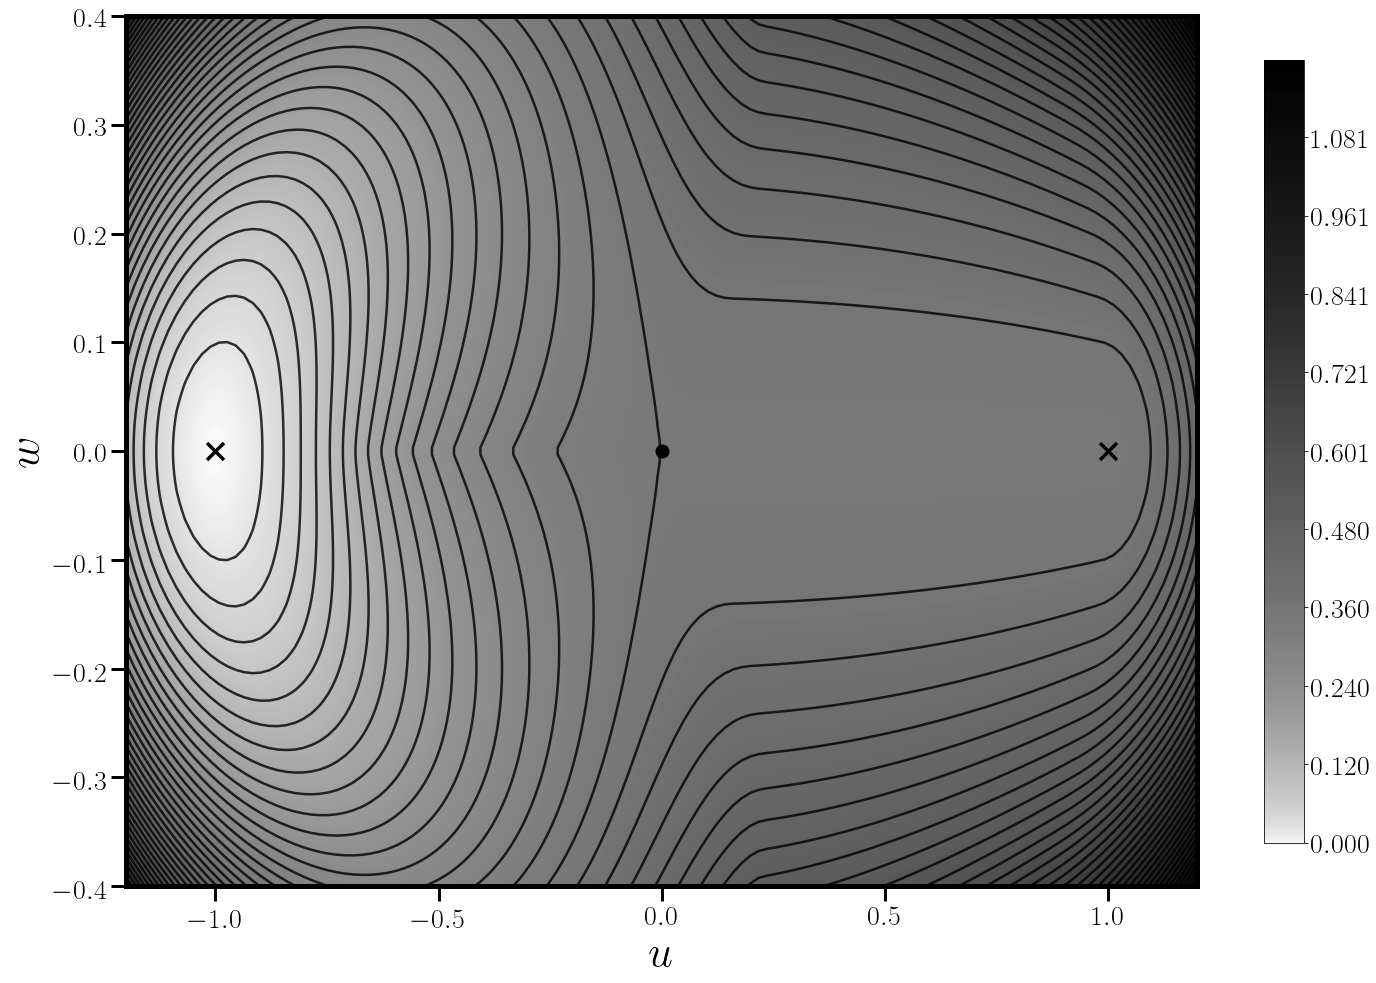

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Contour plot

level_min = 0
level_max = 1.2
level_N = 1000
levels = np.linspace(level_min, level_max, level_N)
levels = list(levels)

xmin, xmax = np.min(qp_xs), np.max(qp_xs)
ymin, ymax =  np.min(qp_ys), np.max(qp_ys)

ax.fill([xmin, xmin, xmax, xmax, xmin],[ymax, ymin, ymin, ymax, ymax], "black", zorder=-1)

cpf = ax.contourf(qp_X,qp_Y,qp_Z, cmap=cm.Greys_r.reversed(), levels=levels,
                 norm=colors.PowerNorm(gamma=0.4))
colours = [(0,0,0,0.8) for level in cpf.levels]
cp = ax.contour(qp_X,qp_Y,qp_Z, 70, colors=colours, linewidths=contour_linewidth)

cbar = fig.colorbar(cpf, ax=ax, shrink=0.9)
cbar.ax.tick_params(labelsize=barlegend_font_size) 

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xs[0], e_xs[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('maier_stein_quasipotential.png', bbox_inches='tight')
plt.show()

In [14]:
qp_data = np.fromfile("data/maier-stein-quasi-potential_reversed.dat",'float32')
qp_width = int(qp_data[0])
qp_height = int(qp_data[1])
qp_xs = qp_data[2:2+qp_width]
qp_ys = qp_data[2+qp_width:3+qp_width+qp_height - 1]
qp_data_offset = 2 + np.size(qp_xs) + np.size(qp_ys)

qp_Z = qp_data[qp_data_offset:].reshape(qp_height, qp_width)
qp_X = np.repeat([qp_xs], len(qp_xs), axis=0)
qp_Y = np.repeat([qp_ys], len(qp_ys), axis=0).T

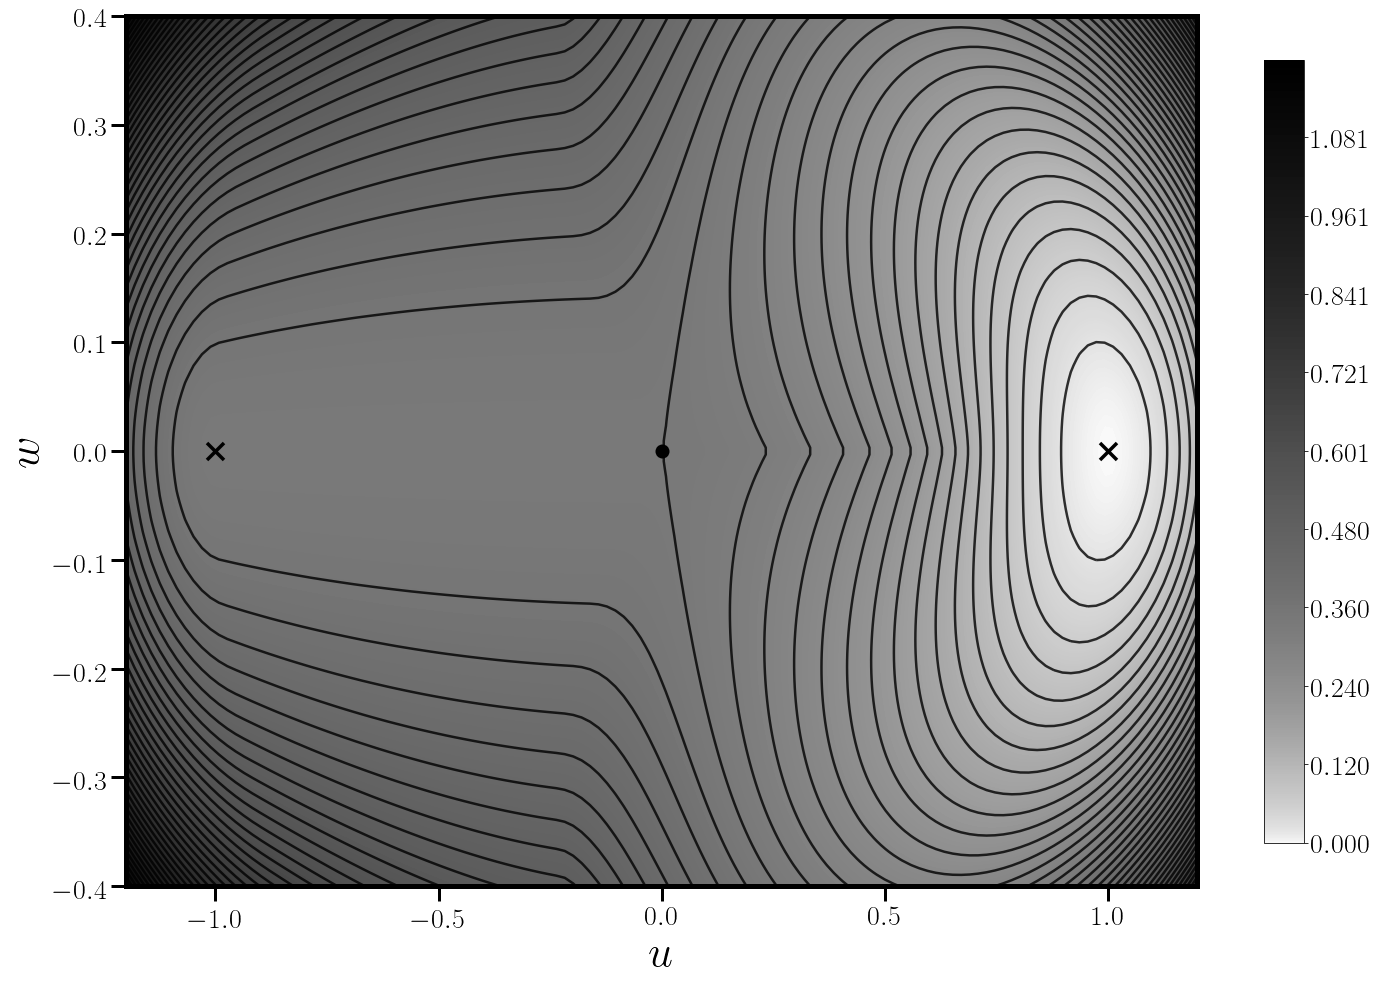

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Contour plot

level_min = 0
level_max = 1.2
level_N = 1000
levels = np.linspace(level_min, level_max, level_N)
levels = list(levels)

xmin, xmax = np.min(qp_xs), np.max(qp_xs)
ymin, ymax =  np.min(qp_ys), np.max(qp_ys)

ax.fill([xmin, xmin, xmax, xmax, xmin],[ymax, ymin, ymin, ymax, ymax], "black", zorder=-1)

cpf = ax.contourf(qp_X,qp_Y,qp_Z, cmap=cm.Greys_r.reversed(), levels=levels,
                 norm=colors.PowerNorm(gamma=0.4))
colours = [(0,0,0,0.8) for level in cpf.levels]
cp = ax.contour(qp_X,qp_Y,qp_Z, 70, colors=colours, linewidths=contour_linewidth)

cbar = fig.colorbar(cpf, ax=ax, shrink=0.9)
cbar.ax.tick_params(labelsize=barlegend_font_size) 

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xs[0], e_xs[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('maier_stein_quasipotential_reversed.png', bbox_inches='tight')
plt.show()

#### Underdamped Maier-Stein

In [43]:
inst_data1_A = np.fromfile("data/inertial_maier_stein_A (gamma=1.0, m=0.1, Nm=76, Nq=608, Date=2019-11-11 08:06).dat",'float32')
inst_data2_A = np.fromfile("data/inertial_maier_stein_A (gamma=1.0, m=0.5, Nm=76, Nq=608, Date=2019-11-10 14:45).dat",'float32')
inst_data3_A = np.fromfile("data/inertial_maier_stein_A (gamma=1.0, m=1.0, Nm=76, Nq=608, Date=2019-11-09 03:24).dat",'float32')

#inst_data1_B = np.fromfile("data/inertial_maier_stein_A (gamma=1.0, m=0.1, Nm=76, Nq=608, Date=2019-11-11 08:06).dat",'float32')
inst_data2_B = np.fromfile("data/inertial_maier_stein_B (gamma=1.0, m=0.5, Nm=28, Nq=224, Date=2019-09-27 14:31).dat",'float32')
inst_data3_B = np.fromfile("data/inertial_maier_stein_B (gamma=1, m=1, Nm=28, Nq=224, Date=2019-09-27 14:29).dat",'float32')

inst_data_A = inst_data2_A
inst_data_B = inst_data2_B

inst_dim_A = int(inst_data_A[0])
inst_Nm_A = int(inst_data_A[1]) + 2 # +2 due to fixed end-points
inst_Nq_A = int(inst_data_A[2])
inst_m_A = inst_data_A[3:]

inst_dim_B = int(inst_data_B[0])
inst_Nm_B = int(inst_data_B[1]) + 2 # +2 due to fixed end-points
inst_Nq_B = int(inst_data_B[2])
inst_m_B = inst_data_B[3:]

In [44]:
e_xa  = np.array([-1,0])
e_xb  = np.array([1,0])
e_xs = np.array([0,0])

paths = [
    ("sto", inst_m_A),
    ("het", inst_m_B)
]

Nm = int(len(paths[0][1])/2)
dim = 2
   
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)

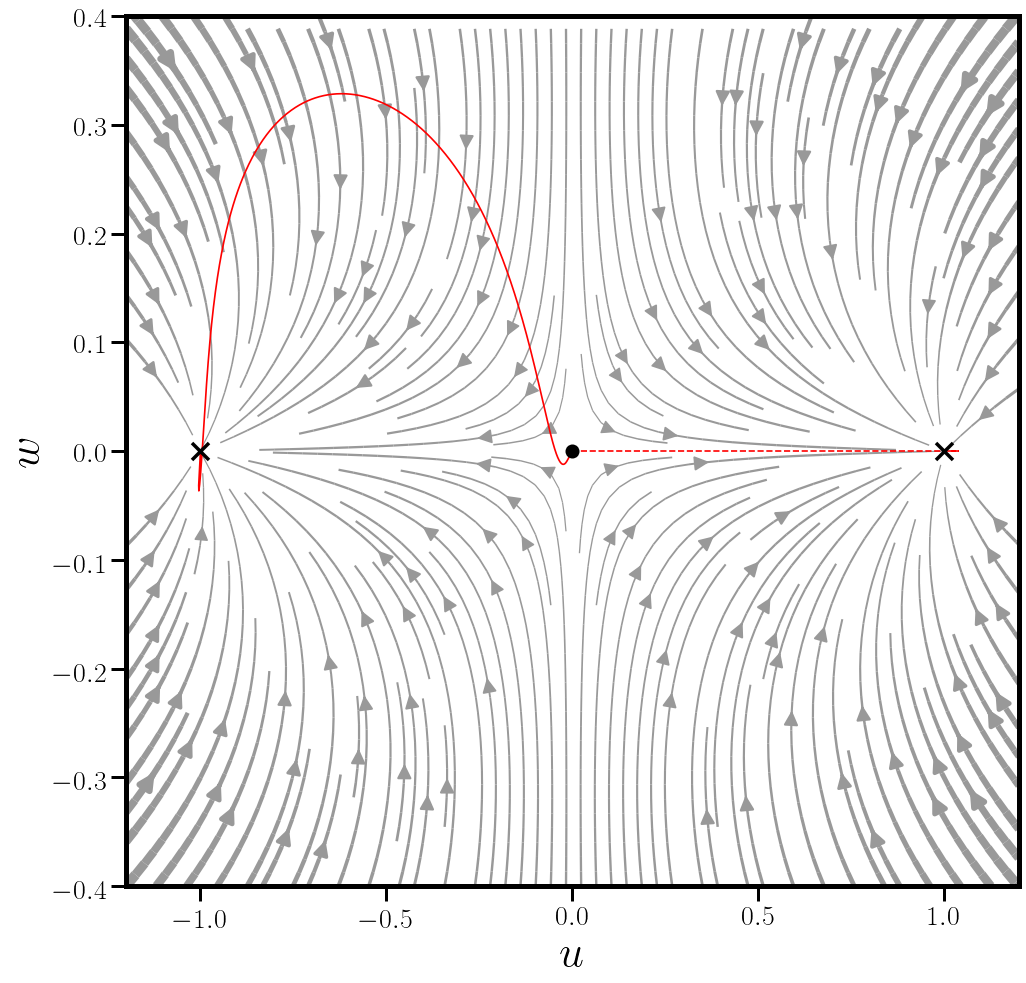

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Stream-plot

xmin, xmax = -1.2, 1.2
ymin, ymax = -0.4, 0.4

X, Y = np.meshgrid(np.linspace(xmin, xmax,400), np.linspace(ymin, ymax,400))
vx,vy=system_a(X,Y);
streamplot_linewidth=15
speed = np.sqrt(vx**2 + vy**2)
lw = (speed / speed.max())*(streamplot_linewidth_max - streamplot_linewidth_min) + streamplot_linewidth_min

ax.streamplot(X,Y, vx, vy, density=streamplot_density, color=streamplot_color, linewidth=lw, arrowsize=streamplot_arrowsize);

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Plot path

for mtype, m in paths:
    ff.set_order(int(len(m)/2))
    
    instanton_color = het_instanton_color if mtype=="het" else sto_instanton_color
    instanton_linewidth = het_instanton_linewidth  if mtype=="het" else sto_instanton_linewidth 
    instanton_linestyle = het_instanton_linestyle if mtype=="het" else sto_instanton_linestyle
    
    ts = np.linspace(-1, 1, 1000)
    xs, vs = ff.evaluate(m, ts)
    plt.plot(xs[:,0], xs[:,1], color=instanton_color, linewidth=instanton_linewidth/3, linestyle=instanton_linestyle)

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
plt.plot(e_xs[0], e_xs[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w, plot_h)

plt.savefig('underdamped_maier_stein_instanton(m=0.5).png', bbox_inches='tight')
plt.show()

## Genetic Switch

In [19]:
dim = 2

m_a1 = 156
m_a2 = 30
m_tau = 1
m_rtau = 1/m_tau
m_K1 = 1
m_K2 = 1
m_rK1 = 1/m_K1
m_rK2 = 1/m_K2
m_n = 3
m_m = 1

def system_a(x, y):
    return np.array([m_a1/(1 + np.power(( y * m_rK2 ), m_n)) - x * m_rtau,
                     m_a2/(1 + np.power(( x * m_rK1 ), m_m)) - y * m_rtau])

In [20]:
e_xa  = np.array([12.17078937,  2.2777678])
e_xb  = np.array([154.89618054,   0.19243576])
e_xs = np.array([5.88007796e-03, 2.98246289e+01])

paths = [
    ("sto", np.array([154.89618054, 154.20719646, 151.27464937, 145.92120571,
       140.78926379, 136.19133128, 129.40328028, 119.8710298 ,
       109.67354473,  99.34976996,  88.88761758,  78.20432628,
        67.64544231,  57.4486872 ,  47.81036465,  39.01488172,
        31.19647472,  24.62669878,  19.28477142,  15.36343559,
        12.97940705,  12.17078937,   0.19243576,   0.25410409,
         0.39878531,   0.54245843,   0.63702626,   0.70592926,
         0.79249858,   0.89669945,   0.99603822,   1.09035765,
         1.18388172,   1.28087707,   1.38180664,   1.48798257,
         1.6008337 ,   1.71983572,   1.84458881,   1.96927125,
         2.08882674,   2.18907594,   2.25490816,   2.2777678 ])),
    ("het", np.array([12.17078937,  13.32386952,  18.25047233,  29.26557363,
        45.40206126,  68.8085222 ,  94.45173763, 104.61314928,
       105.91817273, 120.01616771, 142.06619709, 148.21694968,
       150.51055916, 154.89618054,   2.2777678 ,   2.1619713 ,
         1.80597463,   1.37649865,   1.05125139,   0.77759448,
         0.57268442,   0.50404113,   0.49550748,   0.40730031,
         0.27467967,   0.2372712 ,   0.2224161 ,   0.19243576]))
]

Nm = int(len(paths[0][1])/2)
dim = 2
   
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)

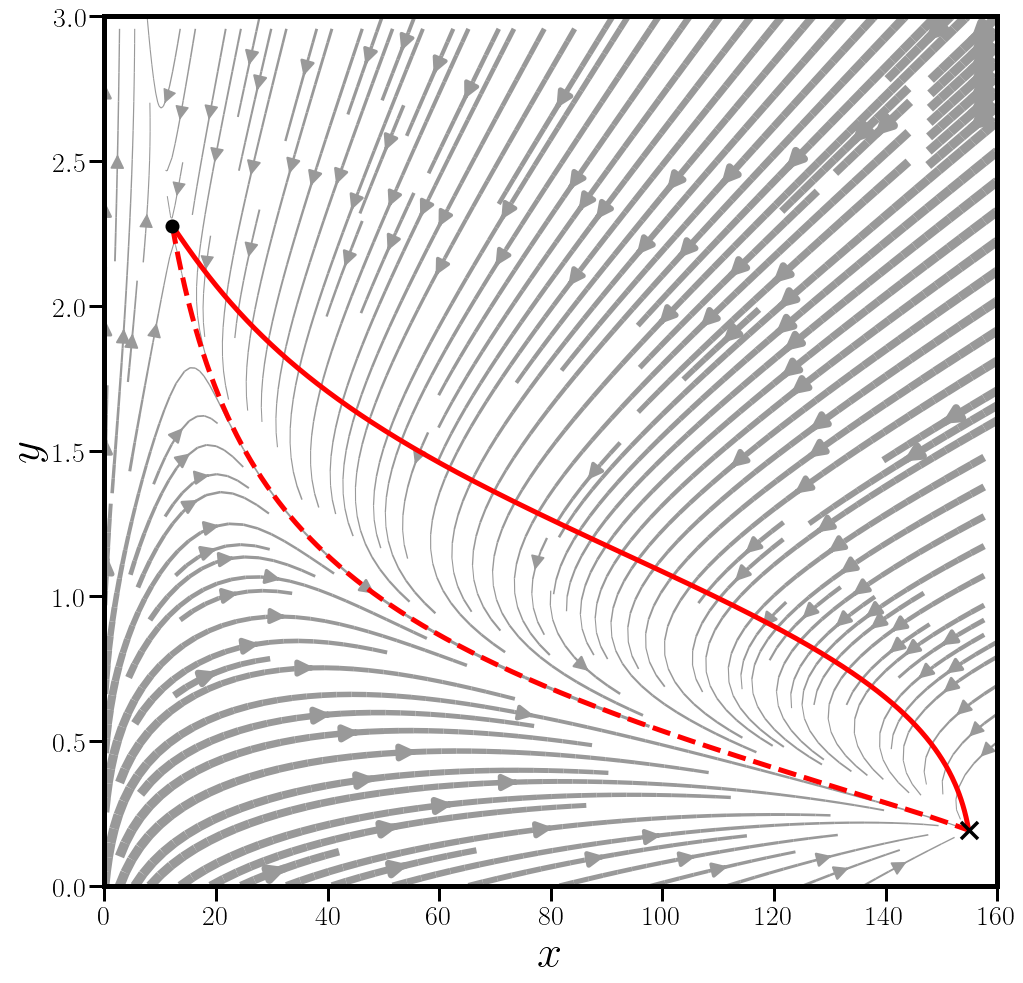

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Stream-plot

xmin, xmax = 0, 160
ymin, ymax = 0, 3

X, Y = np.meshgrid(np.linspace(xmin, xmax,400), np.linspace(ymin, ymax,400))
vx,vy=system_a(X,Y);
streamplot_linewidth=15
speed = np.sqrt(vx**2 + vy**2)
lw = (speed / speed.max())*(streamplot_linewidth_max - streamplot_linewidth_min) + streamplot_linewidth_min

ax.streamplot(X,Y, vx, vy, density=streamplot_density, color=streamplot_color, linewidth=lw, arrowsize=streamplot_arrowsize);

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Plot path

for mtype, m in paths:
    ff.set_order(int(len(m)/2))
    
    instanton_color = het_instanton_color if mtype=="het" else sto_instanton_color
    instanton_linewidth = het_instanton_linewidth  if mtype=="het" else sto_instanton_linewidth 
    instanton_linestyle = het_instanton_linestyle if mtype=="het" else sto_instanton_linestyle
    
    ts = np.linspace(-1, 1, 1000)
    xs, vs = ff.evaluate(m, ts)
    plt.plot(xs[:,0], xs[:,1], color=instanton_color, linewidth=instanton_linewidth, linestyle=instanton_linestyle)

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)

# Frame settings

ax.set_xlabel(r'$x$', fontsize=axes_font_size)
ax.set_ylabel(r'$y$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w, plot_h)

plt.savefig('genetic_switch_instanton.png', bbox_inches='tight')
plt.show()

#### Lagrangian

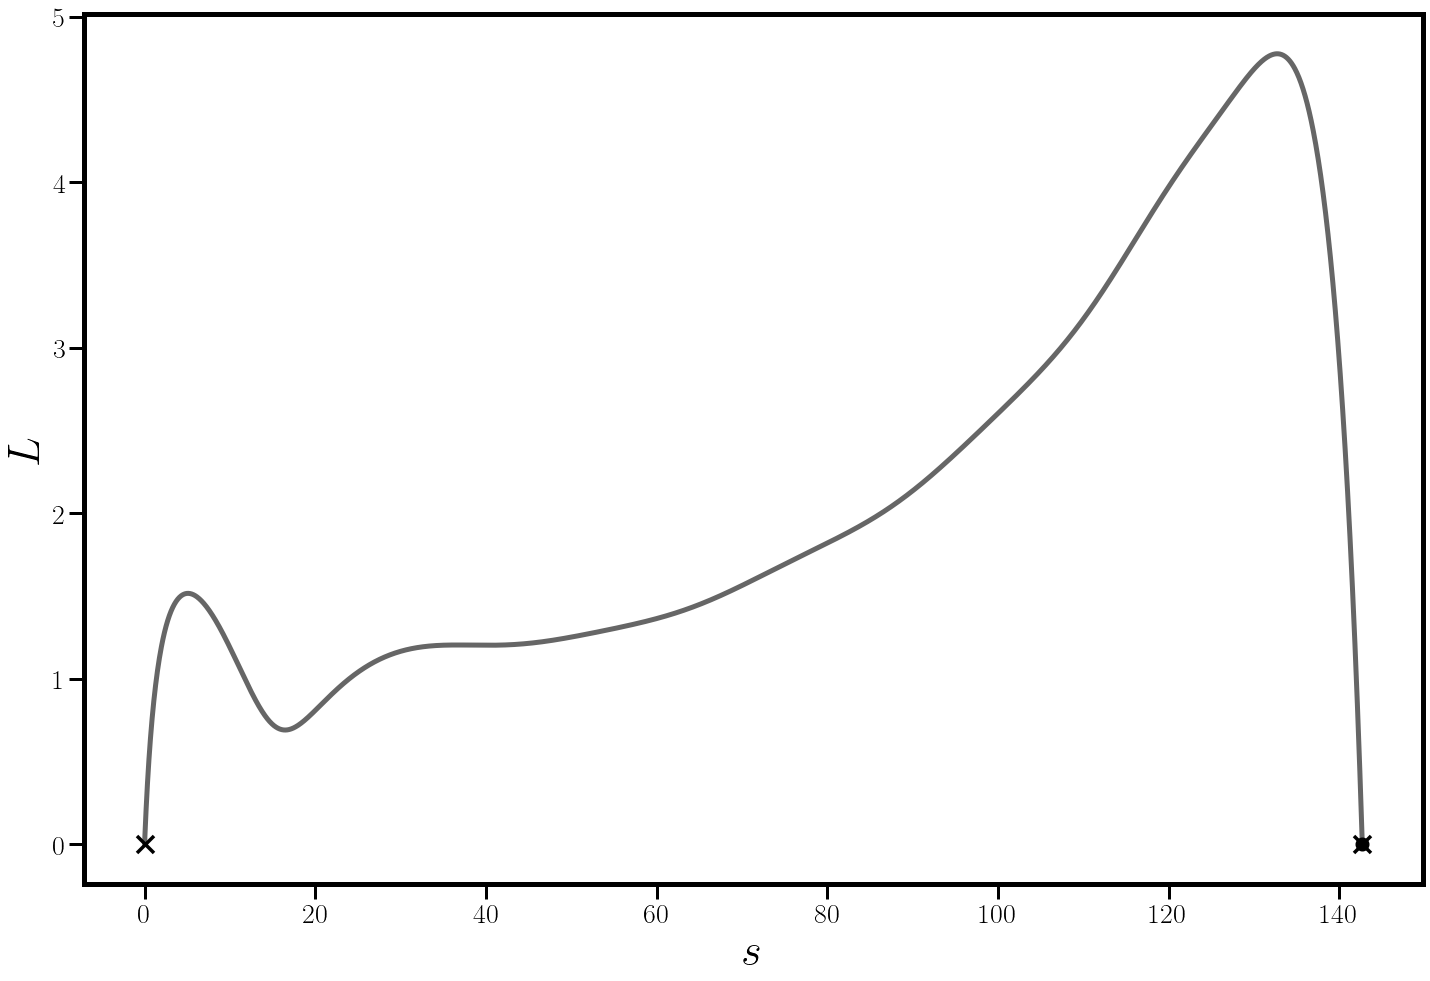

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Setup lagrangian data

m = np.array([154.89618054, 154.20719646, 151.27464937, 145.92120571, 140.78926379, 136.19133128, 129.40328028, 119.8710298 ,       109.67354473,  99.34976996,  88.88761758,  78.20432628,        67.64544231,  57.4486872 ,  47.81036465,  39.01488172,        31.19647472,  24.62669878,  19.28477142,  15.36343559,        12.97940705,  12.17078937,   0.19243576,   0.25410409,         0.39878531,   0.54245843,   0.63702626,   0.70592926,         0.79249858,   0.89669945,   0.99603822,   1.09035765,         1.18388172,   1.28087707,   1.38180664,   1.48798257,         1.6008337 ,   1.71983572,   1.84458881,   1.96927125,         2.08882674,   2.18907594,   2.25490816,   2.2777678])
ls = np.array([3.02358220548251e-12, 0.044824049210390404, 0.08870350244270275, 0.13165253891459194, 0.1736850189423178, 0.21481451954459985, 0.2550543632931941, 0.2944176417785638, 0.3329172347764846, 0.37056582597649523, 0.4073759159559778, 0.4433598329426829, 0.47852974179732044, 0.5128976515593777, 0.5464754218298893, 0.5792747682089683, 0.61130726696247, 0.6425843590573237, 0.6731173536770285, 0.7029174313075899, 0.7319956464663449, 0.7603629301321604, 0.7880300919249805, 0.8150078220732127, 0.8413066932013322, 0.8669371619633637, 0.8919095705444136, 0.9162341480481899, 0.9399210117856427, 0.9629801684778414, 0.9854215153831944, 1.0072548413597815, 1.028489827868924, 1.0491360499287339, 1.069202977022229, 1.0886999739667544, 1.107636301747732, 1.1260211183223987, 1.1438634793966855, 1.1611723391775683, 1.1779565511058365, 1.194224868569762, 1.209985945603961, 1.2252483375736176, 1.2400205018479937, 1.2543107984634219, 1.2681274907781983, 1.281478746120058, 1.2943726364286476, 1.3068171388923133, 1.318820136582758, 1.3303894190851224, 1.341532683127582, 1.3522575332095812, 1.3625714822285886, 1.3724819521078189, 1.3819962744236136, 1.3911216910341864, 1.3998653547092772, 1.408234329761001, 1.4162355926777082, 1.4238760327572777, 1.4311624527451272, 1.438101569472849, 1.4447000144994036, 1.4509643347544738, 1.4569009931851156, 1.4625163694030334, 1.4678167603353813, 1.472808380877666, 1.477497364548526, 1.4818897641465014, 1.485991552409132, 1.4898086226735359, 1.4933467895389185, 1.4966117895309026, 1.4996092817672206, 1.5023448486235793, 1.5048239964033883, 1.507052156004761, 1.5090346835920627, 1.510776861264958, 1.51228389773064, 1.5135609289739023, 1.5146130189293672, 1.515445160152467, 1.516062274490082, 1.5164692137523161, 1.5166707603817713, 1.516671628123504, 1.5164764626937313, 1.5160898424464904, 1.515516279041094, 1.5147602181059483, 1.5138260399030514, 1.5127180599889698, 1.5114405298755855, 1.5099976376868653, 1.5083935088160842, 1.50663220657907, 1.5047177328650605, 1.5026540287861962, 1.5004449753237168, 1.4980943939713143, 1.4956060473758725, 1.492983639975705, 1.4902308186348137, 1.4873511732749876, 1.484348237504264, 1.4812254892417513, 1.4779863513399505, 1.474634192202302, 1.4711723263985732, 1.4676040152764926, 1.4639324675670196, 1.4601608399909765, 1.4562922378571557, 1.452329715658152, 1.4482762776641493, 1.4441348785087484, 1.4399084237755915, 1.435599770576232, 1.4312117281272094, 1.4267470583216664, 1.422208476297783, 1.4175986510005032, 1.412920205742239, 1.4081757187573203, 1.4033677237526945, 1.3984987104546462, 1.393571125150288, 1.3885873712262082, 1.3835498097008667, 1.3784607597544891, 1.3733224992535042, 1.368137265270434, 1.3629072546010548, 1.3576346242747377, 1.3523214920619466, 1.3469699369779846, 1.3415819997798053, 1.3361596834623697, 1.3307049537454532, 1.3252197395619305, 1.3197059335366248, 1.314165392463451, 1.3085999377793769, 1.3030113560296286, 1.2974013993330118, 1.2917717858409787, 1.2861242001939672, 1.2804602939686447, 1.2747816861282217, 1.2690899634627613, 1.2633866810269865, 1.2576733625754741, 1.2519515009913675, 1.246222558711338, 1.2404879681479315, 1.2347491321060033, 1.229007424195629, 1.2232641892414904, 1.2175207436876008, 1.2117783759975964, 1.2060383470518445, 1.200301890539322, 1.194570213348129, 1.1888444959483877, 1.1831258927733188, 1.1774155325965694, 1.1717145189051053, 1.1660239302672153, 1.1603448206988105, 1.154678220024607, 1.1490251342345346, 1.143386545838439, 1.137763414215442, 1.1321566759603456, 1.1265672452256013, 1.120996014060779, 1.1154438527463526, 1.1099116101265736, 1.104400113935526, 1.0989101711228386, 1.0934425681724633, 1.0879980714211115, 1.0825774273706656, 1.0771813629986582, 1.0718105860638616, 1.0664657854101733, 1.061147631264589, 1.0558567755350623, 1.0505938521017697, 1.0453594771065582, 1.040154249238526, 1.0349787500177854, 1.0298335440728579, 1.0247191794178434, 1.0196361877245863, 1.0145850845922268, 1.0095663698133421, 1.0045805276371311, 0.9996280270280522, 0.9947093219237786, 0.9898248514890611, 0.9849750403641337, 0.9801602989139155, 0.9753810234720959, 0.9706375965804455, 0.9659303872297187, 0.961259751092939, 0.9566260307586845, 0.9520295559600527, 0.9474706438004432, 0.9429495989778616, 0.9384667140052443, 0.9340222694280556, 0.9296165340396101, 0.9252497650923033, 0.9209222085079318, 0.9166340990835806, 0.9123856606948948, 0.9081771064992381, 0.9040086391312343, 0.899880450901037, 0.8957927239852097, 0.8917456306188569, 0.8877393332822976, 0.8837739848868296, 0.8798497289570832, 0.8759666998115563, 0.8721250227397377, 0.8683248141769582, 0.8645661818781036, 0.8608492250864401, 0.8571740347027799, 0.8535406934490766, 0.8499492760329304, 0.8463998493073177, 0.8428924724288436, 0.8394271970141745, 0.8360040672930609, 0.8326231202597683, 0.8292843858226888, 0.8259878869503154, 0.8227336398167608, 0.8195216539436387, 0.8163519323405808, 0.8132244716425703, 0.8101392622484127, 0.8070962884510209, 0.8040955285724749, 0.8011369550919198, 0.7982205347733498, 0.7953462287931643, 0.7925139928614726, 0.7897237773454435, 0.7869755273883356, 0.7842691830278454, 0.7816046793120677, 0.7789819464130687, 0.7764009097395501, 0.7738614900472385, 0.7713636035475702, 0.7689071620133063, 0.7664920728851712, 0.7641182393740564, 0.7617855605623163, 0.759493931504835, 0.7572432433246377, 0.7550333833117975, 0.7528642350168866, 0.7507356783435171, 0.7486475896415641, 0.7465998417945912, 0.7445923043109133, 0.7426248434073841, 0.7406973220968212, 0.7388096002707698, 0.7369615347816989, 0.7351529795229226, 0.7333837855092042, 0.7316538009545184, 0.7299628713461743, 0.7283108395222371, 0.7266975457442868, 0.7251228277689279, 0.7235865209194117, 0.7220884581548717, 0.7206284701383083, 0.7192063853038917, 0.7178220299226723, 0.7164752281657911, 0.7151658021697358, 0.7138935720955715, 0.7126583561922644, 0.7114599708547757, 0.7102982306822696, 0.7091729485360929, 0.7080839355951412, 0.7070310014120196, 0.7060139539645434, 0.7050325997113305, 0.7040867436418239, 0.7031761893271096, 0.702300738969825, 0.7014601934527036, 0.7006543523865503, 0.6998830141557164, 0.6991459759653935, 0.6984430338849279, 0.6977739828922722, 0.6971386169170728, 0.6965367288817106, 0.6959681107425695, 0.6954325535316457, 0.6949298473937233, 0.6944597816266196, 0.6940221447169961, 0.6936167243792397, 0.6932433075899098, 0.6929016806235495, 0.6925916290873602, 0.6923129379538295, 0.6920653915954063, 0.6918487738155363, 0.691662867879586, 0.691507456547015, 0.6913823221008215, 0.6912872463764188, 0.6912220107918756, 0.6911863963733822, 0.691180183785832, 0.6912031533569234, 0.6912550851051265, 0.6913357587642395, 0.6914449538089684, 0.6915824494789149, 0.6917480248024503, 0.6919414586200219, 0.6921625296072307, 0.6924110162960915, 0.6926866970977699, 0.6929893503231597, 0.6933187542032329, 0.6936746869099579, 0.6940569265747172, 0.6944652513089977, 0.6948994392221266, 0.695359268439347, 0.6958445171205767, 0.6963549634768924, 0.6968903857884925, 0.6974505624192489, 0.6980352718358063, 0.6986442926205427, 0.6992774034891909, 0.6999343833031162, 0.7006150110877343, 0.7013190660425153, 0.7020463275583779, 0.702796575229172, 0.7035695888661166, 0.7043651485098508, 0.7051830344436212, 0.7060230272048784, 0.7068849075980097, 0.7077684567058213, 0.7086734559004526, 0.7095996868551993, 0.7105469315549726, 0.7115149723073273, 0.7125035917513287, 0.7135125728697176, 0.7145416989974365, 0.7155907538319752, 0.7166595214414428, 0.7177477862752539, 0.7188553331726553, 0.7199819473703428, 0.7211274145123525, 0.7222915206580183, 0.7234740522898164, 0.7246747963213238, 0.7258935401052895, 0.7271300714409108, 0.7283841785813365, 0.7296556502408293, 0.7309442756029512, 0.7322498443252243, 0.7335721465481129, 0.7349109729007068, 0.7362661145070888, 0.7376373629927002, 0.7390245104920723, 0.7404273496524638, 0.7418456736415919, 0.7432792761530891, 0.7447279514130969, 0.7461914941834493, 0.7476696997700856, 0.7491623640275975, 0.7506692833628676, 0.752190254743482, 0.7537250757009133, 0.7552735443346137, 0.7568354593208824, 0.7584106199130929, 0.759998825950106, 0.7615998778596804, 0.7632135766634747, 0.7648397239811402, 0.7664781220360055, 0.7681285736582595, 0.7697908822919999, 0.7714648519961429, 0.773150287451017, 0.7748469939635925, 0.7765547774690731, 0.7782734445374899, 0.7800028023768846, 0.781742658838084, 0.7834928224178839, 0.7852531022647327, 0.7870233081810056, 0.7888032506280069, 0.7905927407311992, 0.7923915902820227, 0.7941996117424424, 0.7960166182510875, 0.7978424236239334, 0.7996768423606682, 0.8015196896471934, 0.8033707813608544, 0.8052299340724858, 0.8070969650527786, 0.8089716922743264, 0.8108539344152632, 0.8127435108644931, 0.814640241724419, 0.8165439478168537, 0.818454450682566, 0.8203715725899201, 0.8222951365355584, 0.8242249662500853, 0.8261608862003413, 0.8281027215939503, 0.8300502983840943, 0.8320034432720149, 0.8339619837106511, 0.8359257479103235, 0.8378945648398712, 0.8398682642327913, 0.8418466765908761, 0.843829633186715, 0.8458169660684689, 0.8478085080630535, 0.8498040927818238, 0.8518035546217106, 0.8538067287715876, 0.8558134512147717, 0.8578235587326617, 0.8598368889099675, 0.8618532801374386, 0.8638725716166391, 0.8658946033626762, 0.8679192162089748, 0.8699462518118253, 0.8719755526519748, 0.8740069620416762, 0.8760403241265067, 0.8780754838890061, 0.8801122871550433, 0.882150580594498, 0.8841902117276277, 0.8862310289287052, 0.8882728814287475, 0.8903156193202904, 0.8923590935619359, 0.8944031559803989, 0.8964476592766459, 0.8984924570290787, 0.9005374036964895, 0.9025823546237461, 0.9046271660433831, 0.906671695082423, 0.9087157997641953, 0.9107593390131115, 0.9128021726578481, 0.9148441614365765, 0.9168851669994638, 0.9189250519134475, 0.9209636796667837, 0.9230009146699558, 0.9250366222638604, 0.9270706687204893, 0.9291029212472495, 0.9311332479926477, 0.9331615180476547, 0.9351876014500249, 0.9372113691918003, 0.9392326932163542, 0.9412514464268043, 0.9432675026905599, 0.9452807368395497, 0.9472910246754509, 0.9492982429740096, 0.9513022694893607, 0.9533029829542556, 0.9553002630871106, 0.9572939905947351, 0.9592840471748332, 0.9612703155205509, 0.9632526793243414, 0.9652310232793297, 0.9672052330854513, 0.9691751954514984, 0.9711407980973945, 0.9731019297605599, 0.9750584801956848, 0.9770103401810957, 0.9789574015196649, 0.9808995570438128, 0.9828367006170993, 0.9847687271376344, 0.9866955325430808, 0.9886170138104262, 0.9905330689616676, 0.9924435970663126, 0.9943484982429709, 0.9962476736616281, 0.9981410255513765, 1.0000284571951852, 1.0019098729410416, 1.0037851781980862, 1.0056542794420693, 1.0075170842185344, 1.0093735011432727, 1.0112234399057343, 1.0130668112719832, 1.0149035270862896, 1.016733500274313, 1.0185566448421923, 1.0203728758849593, 1.0221821095808536, 1.0239842631997362, 1.0257792551012699, 1.027567004739467, 1.0293474326610976, 1.0311204605116018, 1.0328860110332698, 1.034644008069563, 1.0363943765637487, 1.0381370425632213, 1.0398719332201836, 1.0415989767914198, 1.0433181026414786, 1.0450292412426734, 1.0467323241769009, 1.0484272841363236, 1.050114054925416, 1.0517925714596004, 1.0534627697688848, 1.055124586996044, 1.0567779613984385, 1.058422832349379, 1.0600591403374438, 1.061686826967616, 1.0633058349610565, 1.0649161081562397, 1.0665175915080454, 1.0681102310886672, 1.0696939740876132, 1.0712687688110236, 1.0728345646830348, 1.074391312243506, 1.0759389631489285, 1.077477470172198, 1.079006787201024, 1.0805268692392929, 1.0820376724034304, 1.0835391539258126, 1.0850312721502178, 1.0865139865320543, 1.0879872576379057, 1.089451047144621, 1.0909053178372687, 1.0923500336070902, 1.0937851594540007, 1.0952106614802233, 1.0966265068909706, 1.0980326639939904, 1.0994291021956997, 1.1008157920007307, 1.1021927050096565, 1.1035598139167178, 1.104917092507776, 1.1062645156582676, 1.1076020593320663, 1.1089297005762546, 1.1102474175220323, 1.1115551893794873, 1.1128529964364589, 1.1141408200555816, 1.1154186426711021, 1.1166864477856961, 1.1179442199686491, 1.119191944851309, 1.1204296091245851, 1.1216572005362195, 1.1228747078864671, 1.124082121024685, 1.1252794308470584, 1.12646662928978, 1.127643709331096, 1.12881066497971, 1.1299674912791033, 1.1311141842948018, 1.1322507411205152, 1.1333771598629028, 1.1344934396454391, 1.1355995806027295, 1.1366955838705053, 1.137781451589035, 1.1388571868933468, 1.1399227939086813, 1.1409782777482178, 1.1420236445060254, 1.1430589012534256, 1.144084056032625, 1.1450991178526237, 1.1461040966833025, 1.1470990034517854, 1.1480838500333448, 1.1490586492491275, 1.1500234148597883, 1.1509781615600332, 1.1519229049717978, 1.1528576616397004, 1.1537824490237654, 1.1546972854962405, 1.1556021903306828, 1.156497183701049, 1.157382286671691, 1.1582575211937183, 1.1591229100963574, 1.1599784770828592, 1.1608242467204946, 1.1616602444382806, 1.1624864965165216, 1.1633030300849896, 1.1641098731074635, 1.1649070543862763, 1.1656946035441251, 1.166472551024981, 1.1672409280849934, 1.1679997667824864, 1.1687490999743204, 1.1694889613077066, 1.1702193852092933, 1.1709404068856202, 1.1716520623067481, 1.1723543882048943, 1.173047422063064, 1.1737312021123216, 1.1744057673167845, 1.1750711573731678, 1.1757274126975972, 1.1763745744215157, 1.177012684381225, 1.1776417851096994, 1.178261919832039, 1.1788731324536457, 1.179475467552038, 1.1800689703723037, 1.1806536868152762, 1.1812296634307131, 1.1817969474091115, 1.182355586572612, 1.1829056293672693, 1.1834471248544105, 1.1839801227010867, 1.1845046731737057, 1.1850208271275733, 1.1855286359991624, 1.186028151795199, 1.1865194270899337, 1.1870025150101355, 1.1874774692273604, 1.18794434395204, 1.1884031939243869, 1.188854074401661, 1.189297041152713, 1.18973215044889, 1.1901594590540299, 1.190579024215367, 1.1909909036553472, 1.1913951555643507, 1.1917918385852317, 1.1921810118137728, 1.1925627347804948, 1.1929370674479287, 1.1933040701992468, 1.1936638038287128, 1.194016329531678, 1.1943617088982137, 1.1947000039031082, 1.1950312768954063, 1.1953555905893154, 1.1956730080551097, 1.1959835927136737, 1.1962874083210409, 1.196584518963391, 1.196874989045682, 1.1971588832861926, 1.1974362667015157, 1.197707204604285, 1.1979717625858939, 1.1982300065146774, 1.1984820025231784, 1.1987278169985984, 1.198967516574612, 1.1992011681236363, 1.1994288387440974, 1.1996505957558838, 1.1998665066848844, 1.2000766392616242, 1.2002810614053487, 1.2004798412203854, 1.2006730469825015, 1.2008607471316282, 1.201043010265039, 1.2012199051237076, 1.2013915005895797, 1.2015578656687467, 1.2017190694891724, 1.2018751812893242, 1.2020262704090783, 1.2021724062801695, 1.2023136584198255, 1.202450096418488, 1.2025817899343565, 1.2027088086838376, 1.2028312224297224, 1.2029491009761841, 1.2030625141610471, 1.2031715318421448, 1.203276223892317, 1.20337666019077, 1.2034729106144368, 1.2035650450279718, 1.2036531332782943, 1.2037372451823103, 1.2038174505210009, 1.2038938190326007, 1.2039664204003202, 1.204035324249162, 1.2041006001318237, 1.2041623175259701, 1.2042205458237731, 1.2042753543237268, 1.2043268122215522, 1.2043749886074693, 1.2044199524516443, 1.2044617726014621, 1.2045005177724306, 1.204536256535448, 1.204569057318622, 1.2045989883931725, 1.2046261178661553, 1.2046505136763699, 1.2046722435829906, 1.2046913751623833, 1.2047079757971915, 1.2047221126699696, 1.2047338527586362, 1.2047432628255592, 1.2047504094134638, 1.2047553588367919, 1.2047581771762452, 1.2047589302706, 1.2047576837103406, 1.2047545028317472, 1.2047494527096205, 1.204742598150915, 1.204734003685644, 1.2047237335677892, 1.2047118517607487, 1.2046984219346086, 1.2046835074620503, 1.2046671714069817, 1.204649476524537, 1.2046304852497087, 1.204610259695528, 1.2045888616448792, 1.2045663525445889, 1.2045427935040607, 1.204518245280724, 1.2044927682859452, 1.2044664225682027, 1.2044392678180884, 1.2044113633546658, 1.2043827681259245, 1.2043535406996853, 1.2043237392631454, 1.2042934216124195, 1.2042626451516298, 1.2042314668865401, 1.204199943420008, 1.2041681309488013, 1.2041360852558682, 1.2041038617094273, 1.2040715152556913, 1.204039100416594, 1.2040066712852422, 1.2039742815195495, 1.203941984339508, 1.203909832527188, 1.203877878417643, 1.203846173893453, 1.2038147703888171, 1.203783718878185, 1.2037530698794399, 1.2037228734425298, 1.2036931791540155, 1.2036640361293394, 1.2036354930087327, 1.2036075979567613, 1.203580398660506, 1.203553942320923, 1.2035282756560264, 1.2035034448940678, 1.2034794957735357, 1.2034564735386084, 1.2034344229368799, 1.20341338821936, 1.2033934131336537, 1.2033745409262337, 1.2033568143356206, 1.2033402755951101, 1.2033249664273171, 1.2033109280455392, 1.203298201146481, 1.203286825912528, 1.2032768420112916, 1.203268288590607, 1.2032612042776236, 1.2032556271801695, 1.2032515948808395, 1.2032491444406332, 1.2032483123939528, 1.2032491347495125, 1.2032516469885195, 1.2032558840642196, 1.2032618804009871, 1.2032696698925065, 1.2032792859026813, 1.2032907612651798, 1.203304128279342, 1.203319418715182, 1.203336663808841, 1.203355894264405, 1.203377140252087, 1.2034004314100457, 1.2034257968425663, 1.2034532651205154, 1.2034828642840694, 1.203514621838167, 1.2035485647561472, 1.2035847194788403, 1.203623111915931, 1.203663767445505, 1.2037067109145028, 1.2037519666405387, 1.203799558411447, 1.2038495094870996, 1.2039018426003167, 1.2039565799545926, 1.2040137432304618, 1.2040733535827712, 1.2041354316429533, 1.2041999975208455, 1.2042670708046899, 1.2043366705624976, 1.204408815345687, 1.2044835231899924, 1.2045608116122821, 1.2046406976205617, 1.204723197709427, 1.2048083278618833, 1.204896103556166, 1.2049865397621033, 1.205079650946118, 1.2051754510739556, 1.2052739536093213, 1.2053751715202452, 1.2054791172777186, 1.2055858028584225, 1.2056952397524583, 1.2058074389588, 1.205922410988478, 1.206040165873219, 1.206160713160898, 1.2062840619241797, 1.2064102207564247, 1.2065391977830586, 1.2066710006552057, 1.2068056365606026, 1.2069431122208698, 1.2070834338965142, 1.2072266073923856, 1.2073726380558583, 1.2075215307854705, 1.207673290027742, 1.2078279197867232, 1.20798542362445, 1.2081458046627631, 1.2083090655892192, 1.20847520865982, 1.2086442357021951, 1.20881614811924, 1.2089909468927544, 1.2091686325866249, 1.2093492053531918, 1.2095326649309754, 1.2097190106542257, 1.2099082414561053, 1.2101003558677803, 1.2102953520279698, 1.2104932276838554, 1.210693980196993, 1.210897606542403, 1.2111041033208494, 1.2113134667533814, 1.2115256926945221, 1.2117407766304495, 1.2119587136853625, 1.2121794986237546, 1.2124031258581454, 1.2126295894495343, 1.2128588831155867, 1.2130910002310884, 1.2133259338338576, 1.2135636766311109, 1.2138042210003732, 1.214047558998118, 1.2142936823579475, 1.2145425825015082, 1.2147942505412175, 1.2150486772829936, 1.2153058532285286, 1.2155657685893857, 1.2158284132797235, 1.2160937769308475, 1.2163618488880275, 1.216632618220956, 1.2169060737255677, 1.2171822039285871, 1.217460997094804, 1.217742441228438, 1.2180265240776862, 1.218313233146091, 1.218602555687994, 1.218894478718994, 1.2191889890214043, 1.219486073142889, 1.2197857174105593, 1.2200879079273363, 1.220392630580136, 1.2206998710471453, 1.2210096147982767, 1.2213218471028995, 1.221636553033477, 1.2219537174701145, 1.2222733251078353, 1.2225953604583992, 1.2229198078557602, 1.2232466514637963, 1.2235758752776746, 1.2239074631283984, 1.2242413986937208, 1.224577665493598, 1.2249162469051953, 1.225257126157885, 1.225600286345525, 1.2259457104273679, 1.2262933812371557, 1.226643281480392, 1.226995393747984, 1.2273497005144236, 1.2277061841450632, 1.2280648269033918, 1.2284256109501257, 1.2287885183536673, 1.2291535310919244, 1.2295206310568574, 1.2298898000599365, 1.2302610198403272, 1.2306342720603425, 1.2310095383222688, 1.2313868001619994, 1.2317660390622223, 1.2321472364510555, 1.2325303737097784, 1.2329154321791975, 1.233302393158283, 1.2336912379150817, 1.2340819476880824, 1.2344745036893983, 1.2348688871147715, 1.235265079140845, 1.235663060936531, 1.236062813663466, 1.2364643184796478, 1.2368675565471676, 1.2372725090367567, 1.2376791571268768, 1.2380874820141798, 1.2384974649135074, 1.2389090870660766, 1.239322329740844, 1.2397371742381438, 1.2401536018978732, 1.2405715940994924, 1.2409911322688458, 1.241412197880436, 1.241834772463335, 1.2422588376043677, 1.2426843749517502, 1.243111366219182, 1.2435397931903935, 1.243969637724149, 1.2444008817551548, 1.2448335073004273, 1.2452674964615653, 1.2457028314311174, 1.2461394944944004, 1.246577468030864, 1.2470167345236405, 1.247457276557725, 1.247899076828162, 1.2483421181386802, 1.2487863834089694, 1.2492318556787723, 1.2496785181074301, 1.2501263539807042, 1.250575346713049, 1.2510254798507958, 1.2514767370762456, 1.251929102210397, 1.252382559214766, 1.252837092198206, 1.2532926854173638, 1.253749323278953, 1.2542069903461197, 1.2546656713375341, 1.2551253511346658, 1.2555860147808744, 1.2560476474868665, 1.2565102346325148, 1.256973761768677, 1.2574382146231073, 1.2579035790977287, 1.2583698412800004, 1.2588369874365526, 1.2593050040186426, 1.2597738776694314, 1.2602435952189808, 1.2607141436924394, 1.2611855103104972, 1.2616576824898402, 1.2621306478490624, 1.2626043942086653, 1.263078909593787, 1.2635541822346568, 1.2640302005738704, 1.2645069532618436, 1.2649844291636327, 1.2654626173584802, 1.265941507143907, 1.2664210880338942, 1.2669013497652486, 1.2673822822962393, 1.2678638758097804, 1.268346120714341, 1.2688290076466728, 1.2693125274695376, 1.269796671280801, 1.2702814304093408, 1.270766796413227, 1.27125276109291, 1.2717393164780333, 1.2722264548419844, 1.272714168692346, 1.2732024507795359, 1.2736912940931688, 1.274180691867059, 1.2746706375778558, 1.275161124945953, 1.275652147936853, 1.276143700763896, 1.2766357778864403, 1.2771283740116814, 1.2776214840955618, 1.2781151033427705, 1.2786092272085625, 1.279103851400123, 1.279598971872474, 1.2800945848343872, 1.280590686747928, 1.2810872743248183, 1.2815843445318933, 1.2820818945874635, 1.282579921964043, 1.28307842438835, 1.2835773998399418, 1.2840768465516703, 1.2845767630128648, 1.2850771479629657, 1.2855780003988002, 1.2860793195695805, 1.286581104977813, 1.2870833563806627, 1.2875860737867697, 1.2880892574603422, 1.28859290791479, 1.289097025920455, 1.2896016124946073, 1.2901066689100844, 1.2906121966861974, 1.2911181975987347, 1.2916246736667745, 1.292131627163144, 1.2926390606066889, 1.2931469767645467, 1.2936553786512377, 1.2941642695263909, 1.2946736528951988, 1.2951835325079628, 1.29569391235691, 1.2962047966757382, 1.296716189943254, 1.2972280968729137, 1.2977405224232825, 1.2982534717848466, 1.298766950388199, 1.299280963898127, 1.2997955182136138, 1.3003106194664724, 1.3008262740199825, 1.3013424884652522, 1.301859269623037, 1.3023766245428305, 1.3028945604978617, 1.3034130849823669, 1.3039322057175013, 1.3044519306404254, 1.304972267910216, 1.3054932259010457, 1.3060148132021823, 1.3065370386170798, 1.3070599111606498, 1.3075834400556232, 1.3081076347343696, 1.3086325048334402, 1.3091580601940223, 1.3096843108587564, 1.3102112670694623, 1.3107389392644109, 1.3112673380787783, 1.311796474340099, 1.312326359067356, 1.3128570034664335, 1.3133884189310265, 1.3139206170394573, 1.3144536095496733, 1.3149874084001567, 1.3155220257081055, 1.3160574737603383, 1.3165937650205706, 1.317130912121229, 1.3176689278598133, 1.318207825198897, 1.3187476172638526, 1.3192883173392147, 1.3198299388664054, 1.3203724954405516, 1.3209160008073013, 1.3214604688628242, 1.3220059136478994, 1.3225523493479159, 1.3230997902860508, 1.323648250926908, 1.3241977458665133, 1.3247482898354974, 1.325299897691366, 1.3258525844194082, 1.3264063651281504, 1.3269612550466263, 1.3275172695207402, 1.3280744240114473, 1.328632734090661, 1.3291922154394342, 1.3297528838452308, 1.3303147551964685, 1.330877845482064, 1.3314421707864312, 1.3320077472890262, 1.3325745912566163, 1.3331427190469185, 1.3337121470990496, 1.3342828919339809, 1.3348549701499905, 1.335428398420845, 1.3360031934903418, 1.3365793721727641, 1.3371569513446957, 1.33773594794593, 1.3383163789767423, 1.338898261490158, 1.3394816125919533, 1.3400664494374723, 1.3406527892288977, 1.3412406492097944, 1.3418300466619257, 1.342420998905709, 1.3430135232911198, 1.3436076372008756, 1.3442033580413408, 1.344800703243891, 1.3453996902580911, 1.3460003365507873, 1.3466026596011034, 1.3472066768995319, 1.3478124059415677, 1.3484198642272531, 1.3490290692552662, 1.3496400385215566, 1.3502527895170715, 1.3508673397213897, 1.351483706601357, 1.3521019076069933, 1.3527219601696743, 1.3533438816980379, 1.3539676895734374, 1.3545934011481222, 1.3552210337429642, 1.355850604643365, 1.3564821310928892, 1.3571156302941745, 1.3577511194066574, 1.3583886155379332, 1.3590281357446656, 1.3596696970303128, 1.360313316336942, 1.360959010548413, 1.3616067964821923, 1.3622566908875342, 1.3629087104445716, 1.3635628717588588, 1.3642191913581883, 1.364877685691681, 1.3655383711234208, 1.366201263934272, 1.3668663803118761, 1.367533736355199, 1.368203348066345, 1.3688752313473742, 1.3695494020025762, 1.3702258757298296, 1.3709046681192376, 1.371585794654493, 1.3722692707001443, 1.372955111511601, 1.3736433322205812, 1.3743339478392045, 1.3750269732554443, 1.3757224232290355, 1.3764203123905645, 1.3771206552382864, 1.377823466132213, 1.3785287592991153, 1.3792365488206997, 1.379946848635882, 1.3806596725389682, 1.3813750341746527, 1.382092947036199, 1.3828134244627108, 1.3835364796368594, 1.3842621255826089, 1.3849903751638521, 1.38572124107759, 1.3864547358566597, 1.3871908718638224, 1.3879296612926737, 1.388671116162186, 1.3894152483144353, 1.39016206941551, 1.390911590950509, 1.391663824220359, 1.3924187803436325, 1.3931764702510918, 1.3939369046852335, 1.3947000941948318, 1.3954660491394861, 1.3962347796787071, 1.397006295780102, 1.3977806072084604, 1.3985577235280289, 1.399337654100691, 1.4001204080836942, 1.4009059944260116, 1.4016944218692515, 1.4024856989453838, 1.4032798339735564, 1.4040768350569124, 1.4048767100880468, 1.4056794667380927, 1.4064851124617235, 1.4072936544926051, 1.4081050998433966, 1.408919455303021, 1.4097367274366661, 1.4105569225816907, 1.4113800468498994, 1.412206106123449, 1.4130351060530302, 1.413867052061505, 1.4147019493366315, 1.4155398028315176, 1.4163806172687146, 1.4172243971283933, 1.4180711466615321, 1.4189208698735456, 1.4197735705342893, 1.4206292521748765, 1.4214879180831304, 1.4223495713058583, 1.423214214647487, 1.4240818506682444, 1.4249524816859775, 1.4258261097720606, 1.4267027367518494, 1.4275823642065006, 1.4284649934693334, 1.4293506256249202, 1.4302392615122699, 1.4311309017211897, 1.4320255465927403, 1.4329231962187805, 1.433823850441513, 1.434727508853939, 1.4356341707980391, 1.4365438353661375, 1.4374565014009022, 1.4383721674926164, 1.4392908319814524, 1.44021249295929, 1.441137148261987, 1.442064795479837, 1.4429954319493845, 1.4439290547575183, 1.444865660740561, 1.4458052464842694, 1.4467478083247443, 1.4476933423488845, 1.4486418443925686, 1.4495933100424736, 1.4505477346388034, 1.4515051132707413, 1.4524654407814523, 1.4534287117662643, 1.4543949205731224, 1.4553640613048628, 1.4563361278164848, 1.4573111137210617, 1.4582890123865582, 1.4592698169344658, 1.4602535202493527, 1.4612401149693142, 1.4622295934918839, 1.4632219479772175, 1.4642171703449094, 1.465215252274902, 1.4662161852133977, 1.4672199603664922, 1.4682265687106337, 1.4692360009826189, 1.470248247692325, 1.4712632991140708, 1.472281145292527, 1.4733017760477196, 1.4743251809668436, 1.4753513494147228, 1.4763802705297167, 1.477411933228268, 1.4784463262039935, 1.4794834379313215, 1.480523256664128, 1.4815657704425576, 1.4826109670893857, 1.4836588342132018, 1.4847093592115925, 1.4857625292711418, 1.4868183313719783, 1.4878767522841372, 1.4889377785762008, 1.4900013966116603, 1.4910675925534633, 1.4921363523667424, 1.4932076618188148, 1.494281506481002, 1.4953578717318123, 1.4964367427614889, 1.497518104567007, 1.4986019419625336, 1.4996882395771536, 1.5007769818548695, 1.501868153063242, 1.5029617372902067, 1.5040577184495305, 1.5051560802794484, 1.506256806350848, 1.5073598800636319, 1.5084652846535391, 1.5095730031907806, 1.510683018587315, 1.5117953135950302, 1.5129098708102902, 1.5140266726757545, 1.5151457014835614, 1.5162669393785109, 1.517390368359429, 1.5185159702814417, 1.519643726860977, 1.520773619677584, 1.5219056301739329, 1.5230397396626358, 1.5241759293262476, 1.5253141802231767, 1.5264544732858667, 1.5275967893280722, 1.5287411090453134, 1.5298874130189688, 1.5310356817167303, 1.5321858955016978, 1.5333380346264676, 1.5344920792435914, 1.5356480094060316, 1.5368058050694344, 1.5379654460948586, 1.5391269122528684, 1.54029018322899, 1.5414552386223477, 1.5426220579502115, 1.5437906206539083, 1.5449609060983676, 1.5461328935771235, 1.5473065623159528, 1.5484818914733296, 1.5496588601477015, 1.550837447377944, 1.5520176321483632, 1.5531993933868762, 1.554382709978654, 1.5555675607588455, 1.5567539245212174, 1.5579417800204283, 1.5591311059752115, 1.5603218810729231, 1.5615140839704509, 1.5627076932992168, 1.5639026876692697, 1.5650990456701948, 1.5662967458783896, 1.5674957668543357, 1.5686960871526026, 1.5698976853236672, 1.5711005399111855, 1.57230462946427, 1.5735099325361261, 1.5747164276872354, 1.5759240934903573, 1.5771329085346224, 1.5783428514259867, 1.5795539007922343, 1.580766035288434, 1.581979233597849, 1.5831934744351202, 1.5844087365517225, 1.585624998739604, 1.5868422398307303, 1.5880604387043604, 1.5892795742906856, 1.590499625571283, 1.5917205715854834, 1.5929423914303698, 1.594165064270328, 1.5953885693315897, 1.5966128859145101, 1.5978379933917495, 1.5990638712123655, 1.6002904989072704, 1.6015178560896857, 1.6027459224619633, 1.603974677815586, 1.605204102035259, 1.6064341751066422, 1.6076648771122564, 1.6088961882405783, 1.6101280887878602, 1.611360559159948, 1.6125935798781939, 1.6138271315790007, 1.6150611950229177, 1.6162957510914566, 1.6175307807957324, 1.618766265274644, 1.6200021858026048, 1.6212385237922717, 1.6224752607936352, 1.6237123785012955, 1.6249498587571907, 1.626187683552871, 1.6274258350317723, 1.6286642954937633, 1.6299030473969651, 1.631142073364117, 1.6323813561821225, 1.633620878804777, 1.6348606243582253, 1.6361005761432352, 1.6373407176388355, 1.6385810325027705, 1.6398215045769575, 1.6410621178888505, 1.6423028566559879, 1.643543705286902, 1.6447846483861213, 1.6460256707550798, 1.6472667573953004, 1.6485078935129422, 1.6497490645188009, 1.650990256033765, 1.6522314538897263, 1.653472644130943, 1.654713813021317, 1.6559549470430284, 1.657196032900174, 1.6584370575205867, 1.6596780080603821, 1.6609188719048689, 1.6621596366717313, 1.6634002902133034, 1.6646408206183878, 1.6658812162149843, 1.6671214655739277, 1.6683615575079784, 1.6696014810786437, 1.6708412255943585, 1.6720807806150333, 1.6733201359534178, 1.6745592816764656, 1.6757982081105638, 1.6770369058394863, 1.6782753657089415, 1.6795135788277094, 1.6807515365710515, 1.6819892305802568, 1.6832266527667343, 1.6844637953129222, 1.6857006506731977, 1.686937211578197, 1.6881734710334513, 1.689409422324161, 1.6906450590140594, 1.691880374950415, 1.6931153642613026, 1.6943500213599236, 1.6955843409473346, 1.6968183180108554, 1.6980519478272527, 1.699285225964104, 1.7005181482800253, 1.7017507109285361, 1.702982910356468, 1.7042147433060109, 1.7054462068172143, 1.706677298228442, 1.7079080151759172, 1.7091383555978155, 1.7103683177324456, 1.7115979001212054, 1.7128271016076724, 1.7140559213403321, 1.7152843587725783, 1.7165124136638497, 1.7177400860794023, 1.7189673763923565, 1.7201942852839238, 1.721420813742725, 1.72264696306911, 1.7238727348699285, 1.7250981310646694, 1.7263231538822765, 1.7275478058627414, 1.7287720898582393, 1.7299960090324475, 1.7312195668612276, 1.7324427671319427, 1.7336656139436855, 1.7348881117109158, 1.7361102651582314, 1.7373320793235507, 1.7385535595572037, 1.7397747115230686, 1.7409955411965257, 1.7422160548655938, 1.743436259130931, 1.7446561609035598, 1.7458757674080516, 1.7470950861791152, 1.7483141250622793, 1.7495328922143472, 1.7507513961008954, 1.7519696454990026, 1.7531876494904282, 1.7544054174711619, 1.7556229591398278, 1.756840284504051, 1.7580574038765917, 1.7592743278767102, 1.7604910674276653, 1.7617076337555773, 1.762924038390338, 1.7641402931612902, 1.7653564102013206, 1.7665724019407207, 1.7677882811080963, 1.769004060729685, 1.7702197541289024, 1.7714353749206566, 1.7726509370161239, 1.7738664546172913, 1.7750819422160475, 1.7762974145941826, 1.7775128868213415, 1.778728374252978, 1.7799438925269442, 1.7811594575664458, 1.7823750855750404, 1.783590793035728, 1.7848065967066304, 1.786022513626449, 1.787238561103095, 1.788454756719375, 1.7896711183270781, 1.7908876640442486, 1.7921044122588228, 1.7933213816195348, 1.794538591037508, 1.7957560596830717, 1.7969738069850791, 1.7981918526268146, 1.7994102165439472, 1.800628918924076, 1.801847980201046, 1.803067421054493, 1.8042872624077972, 1.805507525426492, 1.8067282315114426, 1.8079494022999825, 1.8091710596636403, 1.8103932257031374, 1.8116159227465687, 1.8128391733464468, 1.8140630002783382, 1.8152874265369974, 1.8165124753318196, 1.8177381700879778, 1.8189645344389191, 1.8201915922277294, 1.8214193675000843, 1.8226478845037946, 1.8238771676851684, 1.82510724168651, 1.8263381313411173, 1.8275698616710088, 1.8288024578855584, 1.8300359453749024, 1.8312703497094844, 1.8325056966339162, 1.8337420120687966, 1.834979322099798, 1.8362176529801673, 1.8374570311266325, 1.8386974831130374, 1.839939035668749, 1.8411817156750203, 1.8424255501627158, 1.8436705663048087, 1.8449167914177451, 1.8461642529534856, 1.847412978497914, 1.8486629957692458, 1.8499143326084777, 1.85116701698189, 1.852421076972405, 1.853676540780043, 1.8549334367144183, 1.8561917931929202, 1.857451638737075, 1.85871300196618, 1.8599759115968482, 1.861240396437097, 1.8625064853818003, 1.8637742074099606, 1.8650435915817525, 1.8663146670314745, 1.8675874629652753, 1.8688620086572882, 1.8701383334469028, 1.8714164667301247, 1.8726964379600304, 1.87397827664131, 1.8752620123257202, 1.8765476746075365, 1.8778352931205973, 1.8791248975328472, 1.8804165175436083, 1.8817101828776686, 1.8830059232836902, 1.8843037685262516, 1.885603748385165, 1.8869058926491107, 1.8882102311129074, 1.8895167935716017, 1.8908256098170568, 1.8921367096340873, 1.8934501227961391, 1.8947658790602873, 1.896084008162461, 1.8974045398160797, 1.8987275037043219, 1.9000529294771695, 1.901380846748225, 1.9027112850892536, 1.9040442740254093, 1.9053798430318238, 1.9067180215290591, 1.9080588388799242, 1.9094023243833362, 1.9107485072702275, 1.9120974167008171, 1.9134490817598362, 1.9148035314503886, 1.9161607946921322, 1.917520900316731, 1.9188838770610346, 1.9202497535663952, 1.9216185583713923, 1.9229903199111504, 1.9243650665086989, 1.9257428263736074, 1.927123627598121, 1.928507498151248, 1.9298944658751225, 1.93128455848273, 1.9326778035504049, 1.934074228515783, 1.9354738606741648, 1.9368767271730576, 1.9382828550089926, 1.93969227102275, 1.9411050018954938, 1.942521074146498, 1.9439405141249608, 1.9453633480115968, 1.9467896018084048, 1.9482193013409415, 1.9496524722501363, 1.9510891399893353, 1.9525293298220276, 1.9539730668152515, 1.955420375839367, 1.9568712815596427, 1.9583258084360295, 1.9597839807197488, 1.9612458224462443, 1.9627113574335908, 1.964180609279083, 1.9656536013560526, 1.9671303568068197, 1.9686108985442843, 1.9700952492441957, 1.9715834313428786, 1.9730754670354145, 1.974571378269502, 1.9760711867431837, 1.9775749139023446, 1.9790825809357102, 1.9805942087732546, 1.9821098180811987, 1.9836294292597358, 1.985153062440304, 1.9866807374801283, 1.988212473962676, 1.9897482911915176, 1.9912882081880525, 1.9928322436885537, 1.9943804161430307, 1.995932743708181, 1.9974892442489818, 1.9990499353327777, 2.00061483422769, 2.002183957899206, 2.0037573230081307, 2.0053349459076344, 2.0069168426400665, 2.008503028936275, 2.0100935202103756, 2.0116883315579344, 2.013287477755739, 2.0148909732570246, 2.0164988321889723, 2.0181110683522547, 2.019727695216943, 2.0213487259225076, 2.0229741732721322, 2.0246040497343074, 2.026238367438509, 2.0278771381726983, 2.02952037338423, 2.0311680841762154, 2.0328202813029748, 2.034476975173675, 2.0361381758461903, 2.0378038930277853, 2.0394741360712487, 2.0411489139764853, 2.042828235385514, 2.044512108583149, 2.046200541495182, 2.0478935416865625, 2.0495911163602614, 2.051293272356361, 2.053000016149781, 2.0547113538511894, 2.0564272912038177, 2.0581478335827796, 2.059872985995071, 2.061602753078205, 2.0633371390988486, 2.065076147952368, 2.0668197831632824, 2.0685680478804898, 2.070320944882951, 2.0720784765742337, 2.0738406449825106, 2.0756074517630623, 2.0773788981941834, 2.079154985180139, 2.0809357132477544, 2.0827210825493694, 2.084511092859202, 2.0863057435778956, 2.088105033727288, 2.089908961954052, 2.091717526529237, 2.093530725346227, 2.0953485559250566, 2.0971710154085486, 2.098998100563904, 2.1008298077861127, 2.102666133093635, 2.104507072133174, 2.1063526201758123, 2.1082027721229224, 2.110057522502757, 2.111916865473404, 2.1137807948227874, 2.115649303968894, 2.1175223859634116, 2.119400033489228, 2.121282238864751, 2.1231689940427714, 2.1250602906125096, 2.1269561198021165, 2.1288564724779917, 2.130761339146602, 2.1326707099585747, 2.1345845747059684, 2.1365029228270487, 2.1384257434076517, 2.140353025181639, 2.1422847565338543, 2.144220925500804, 2.146161519774523, 2.1481065267023496, 2.1500559332910143, 2.1520097262059608, 2.1539678917774836, 2.155930415999592, 2.157897284535011, 2.1598684827145007, 2.1618439955414033, 2.1638238076941434, 2.165807903527366, 2.167796267077165, 2.1697888820599474, 2.171785731878572, 2.1737867996246223, 2.1757920680793177, 2.1778015197169225, 2.179815136711113, 2.181832900932477, 2.1838547939564705, 2.1858807970636462, 2.187910891243746, 2.1899450571993384, 2.1919832753494575, 2.194025525831421, 2.1960717885060603, 2.1981220429593122, 2.2001762685076756, 2.2022344442002577, 2.204296548824459, 2.2063625609075643, 2.208432458721518, 2.2105062202861063, 2.2125838233735067, 2.2146652455137428, 2.216750463994458, 2.2188394558691016, 2.2209321979592005, 2.2230286668575445, 2.225128838935234, 2.227232690343044, 2.229340197017791, 2.2314513346850617, 2.2335660788648966, 2.235684404874519, 2.237806287836065, 2.239931702677495, 2.2420606241382757, 2.2441930267759744, 2.246328884968534, 2.2484681729204112, 2.2506108646653047, 2.2527569340745686, 2.254906354858349, 2.257059100572633, 2.2592151446235675, 2.261374460271327, 2.2635370206392054, 2.265702798713164, 2.267871767349561, 2.2700438992817453, 2.2722191671221026, 2.274397543369787, 2.276579000414131, 2.278763510542376, 2.2809510459414923, 2.2831415787065907, 2.285335080844561, 2.2875315242806664, 2.28973088086218, 2.2919331223667996, 2.294138220504692, 2.2963461469266804, 2.2985568732283355, 2.3007703709565703, 2.3029866116135054, 2.305205566664654, 2.307427207543242, 2.3096515056545286, 2.311878432383992, 2.31410795910233, 2.3163400571691, 2.3185746979418127, 2.320811852779343, 2.3230514930492063, 2.325293590131423, 2.3275381154273873, 2.329785040362367, 2.33203433639369, 2.3342859750162006, 2.3365399277674896, 2.3387961662342605, 2.341054662057786, 2.34331538694164, 2.3455783126537426, 2.3478434110384114, 2.350110654015907, 2.3523800135917554, 2.354651461862659, 2.3569249710228632, 2.359200513367796, 2.3614780613022504, 2.3637575873453898, 2.366039064138704, 2.368322464446919, 2.370607761171186, 2.3728949273483977, 2.3751839361621023, 2.3774747609452334, 2.3797673751873845, 2.382061752540949, 2.3843578668272585, 2.3866556920406765, 2.388955202357465, 2.3912563721398783, 2.3935591759411636, 2.3958635885146577, 2.39816958481606, 2.400477140011617, 2.402786229483354, 2.4050968288347576, 2.407408913897143, 2.409722460733974, 2.4120374456492755, 2.414353845190817, 2.4166716361569343, 2.4189907956022125, 2.4213113008440814, 2.4236331294659976, 2.4259562593256305, 2.428280668559637, 2.4306063355886636, 2.432933239123713, 2.435261358170692, 2.4375906720372313, 2.4399211603367803, 2.4422528029954265, 2.444585580255989, 2.4469194726832484, 2.449254461171222, 2.4515905269477116, 2.453927651575441, 2.456265816965015, 2.4586050053737836, 2.4609451994122082, 2.4632863820511375, 2.4656285366256725, 2.4679716468378956, 2.470315696765283, 2.4726606708645704, 2.475006553974481, 2.4773533313227745, 2.4797009885303396, 2.482049511616424, 2.484398887001589, 2.486749101513624, 2.4891001423914076, 2.491451997291051, 2.493804654287487, 2.4961581018808374, 2.498512328999823, 2.5008673250058564, 2.5032230796996373, 2.505579583320241, 2.5079368265537596, 2.5102948005353483, 2.5126534968530905, 2.5150129075514087, 2.517373025137431, 2.5197338425805356, 2.5220953533194006, 2.5244575512635947, 2.5268204307978976, 2.5291839867857107, 2.53154821457224, 2.5339131099863152, 2.5362786693469843, 2.53864488946283, 2.541011767638338, 2.543379301672985, 2.5457474898689725, 2.5481163310284956, 2.550485824460793, 2.552855969983284, 2.555226767923159, 2.557598219121928, 2.5599703249347385, 2.5623430872360586, 2.5647165084196786, 2.567090591401211, 2.5694653396190006, 2.5718407570404906, 2.5742168481569934, 2.57659361799233, 2.578971072099421, 2.581349216564604, 2.583728058008319, 2.58610760358647, 2.5884878609911084, 2.590868838452934, 2.593250544741295, 2.595632989164642, 2.5980161815739393, 2.600400132360164, 2.6027848524574893, 2.6051703533430555, 2.6075566470360627, 2.6099437461007255, 2.612331663644909, 2.6147204133212654, 2.6171100093247333, 2.6195004663975396, 2.6218917998235156, 2.624284025430825, 2.6266771595926457, 2.629071219223988, 2.6314662217819205, 2.633862185266935, 2.63625912821999, 2.6386570697218303, 2.641056029393212, 2.6434560273930856, 2.6458570844174574, 2.6482592216973444, 2.6506624609992286, 2.653066824621419, 2.6554723353940517, 2.6578790166765884, 2.6602868923566803, 2.6626959868460744, 2.6651063250824336, 2.667517932522969, 2.669930835144669, 2.6723450594417955, 2.6747606324220214, 2.6771775816055197, 2.679595935020643, 2.6820157212025606, 2.6844369691887096, 2.686859708517204, 2.689283969223652, 2.6917097818361526, 2.6941371773730225, 2.696566187340295, 2.6989968437262633, 2.7014291789989784, 2.70386322610193, 2.7062990184508635, 2.7087365899271845, 2.711175974877733, 2.7136172081075074, 2.7160603248755706, 2.7185053608920953, 2.7209523523122243, 2.7234013357322056, 2.7258523481848442, 2.7283054271324545, 2.7307606104650404, 2.733217936491883, 2.735677443939494, 2.7381391719420662, 2.7406031600419283, 2.7430694481779483, 2.7455380766828057, 2.748009086277534, 2.7504825180647003, 2.7529584135215828, 2.7554368144956243, 2.75791776319943, 2.7604013021991705, 2.762887474413901, 2.7653763231069206, 2.767867891877586, 2.7703622246567647, 2.77285936569956, 2.7753593595771235, 2.7778622511707454, 2.7803680856654864, 2.782876908539947, 2.7853887655637664, 2.787903702784888, 2.7904217665261513, 2.7929430033750577, 2.7954674601776333, 2.797995184030242, 2.800526222271401, 2.803060622474277, 2.8055984324378187, 2.808139700179936, 2.810684473927722, 2.813232802110406, 2.8157847333507107, 2.818340316455078, 2.820899600407074, 2.823462634357611, 2.8260294676163085, 2.828600149642398, 2.831174730037219, 2.8337532585333065, 2.836335784987341, 2.838922359368553, 2.8415130317523563, 2.84410785230898, 2.846706871295737, 2.8493101390454285, 2.8519177059602043, 2.8545296224976937, 2.857145939166003, 2.859766706511209, 2.8623919751075846, 2.8650217955491826, 2.867656218439379, 2.8702952943817763, 2.8729390739674727, 2.875587607768921, 2.8782409463269687, 2.880899140143356, 2.8835622396666167, 2.8862302952870778, 2.888903357321851, 2.8915814760064222, 2.8942647014866907, 2.896953083804192, 2.899646672888366, 2.9023455185458715, 2.905049670451035, 2.90775917813221, 2.9104740909638167, 2.913194458156113, 2.9159203287429136, 2.9186517515715877, 2.9213887752925984, 2.9241314483492715, 2.926879818966654, 2.929633935139236, 2.93239384462413, 2.9351595949260627, 2.9379312332898735, 2.940708806687553, 2.943492361808694, 2.9462819450486677, 2.949077602499983, 2.951879379938873, 2.9546873228166532, 2.9575014762465344, 2.960321884995892, 2.9631485934733064, 2.9659816457183297, 2.968821085391255, 2.9716669557615205, 2.974519299697249, 2.977378159656155, 2.98024357767099, 2.983115595343861, 2.9859942538319046, 2.9888795938375097, 2.9917716555985407, 2.9946704788771967, 2.9975761029500063, 3.000488566596914, 3.0034079080896845, 3.006334165184171, 3.009267375107129, 3.0122075745489383, 3.015154799649281, 3.018109085991682, 3.021070468588732, 3.0240389818752647, 3.0270146596965333, 3.0299975352993442, 3.032987641322052, 3.0359850097825074, 3.038989672070784, 3.0420016589384886, 3.0450210004894416, 3.0480477261689884, 3.051081864755133, 3.0541234443503527, 3.057172492369318, 3.0602290355320747, 3.063293099854036, 3.066364710635753, 3.0694438924565475, 3.0725306691626884, 3.075625063859661, 3.078727098903755, 3.0818367958929684, 3.0849541756583676, 3.088079258256812, 3.09121206295913, 3.0943526082464814, 3.097500911798761, 3.1006569904880052, 3.1038208603704334, 3.1069925366782627, 3.1101720338119776, 3.1133593653323715, 3.116554543954635, 3.1197575815388063, 3.122968489084542, 3.1261872767236127, 3.1294139537108094, 3.132648528421214, 3.1358910083386036, 3.1391414000536315, 3.1423997092542777, 3.1456659407208463, 3.148940098318917, 3.1522221849950256, 3.1555122027696143, 3.1588101527308936, 3.1621160350302944, 3.165429848878148, 3.1687515925352727, 3.1720812633100195, 3.1754188575553144, 3.178764370659337, 3.182117797044384, 3.1854791301616387, 3.1888483624870787, 3.192225485516701, 3.195610489763567, 3.199003364752798, 3.202404099020441, 3.205812680107101, 3.209229094557031, 3.2126533279147225, 3.2160853647208114, 3.2195251885118523, 3.2229727818148604, 3.2264281261479937, 3.2298912020164607, 3.2333619889120655, 3.236840465311161, 3.2403266086707845, 3.2438203954329765, 3.2473218010177334, 3.250830799825735, 3.254347365236299, 3.2578714696076077, 3.261403084276253, 3.2649421795567832, 3.2684887247426104, 3.27204268810533, 3.275604036896766, 3.2791727373485173, 3.282748754673321, 3.286332053067099, 3.2899225957085036, 3.2935203447625554, 3.2971252613817796, 3.300737305708253, 3.3043564368749685, 3.3079826130112906, 3.3116157912420476, 3.315255927692988, 3.318902977492826, 3.3225568947780175, 3.326217632695034, 3.3298851434042263, 3.3335593780848285, 3.3372402869399593, 3.340927819198214, 3.344621923122304, 3.348322546010877, 3.3520296342062466, 3.3557431330984855, 3.3594629871308825, 3.363189139806309, 3.3669215336951765, 3.3706601104388483, 3.3744048107578237, 3.37815557445947, 3.3819123404434777, 3.3856750467100483, 3.3894436303671682, 3.3932180276394774, 3.3969981738746355, 3.400784003553099, 3.404575450295397, 3.408372446872818, 3.412174925213776, 3.4159828164147257, 3.4197960507499374, 3.4236145576799117, 3.4274382658622926, 3.4312671031605078, 3.4351009966569563, 3.4389398726607396, 3.4427836567206214, 3.4466322736345774, 3.4504856474607095, 3.4543437015317977, 3.4582063584633715, 3.4620735401681486, 3.4659451678666073, 3.4698211621005157, 3.473701442745323, 3.477585929022325, 3.481474539512874, 3.4853671921706564, 3.4892638043355646, 3.4931642927477924, 3.497068573560796, 3.5009765623563, 3.5048881741588502, 3.5088033234490013, 3.512721924179459, 3.5166438897890657, 3.5205691332190554, 3.52449756692738, 3.5284291029046244, 3.532363652689469, 3.5363011273861957, 3.540241437677537, 3.5441844938445684, 3.5481302057809216, 3.5520784830106322, 3.5560292347045106, 3.559982369696968, 3.563937796503069, 3.5678954233377453, 3.5718551581302336, 3.5758169085449936, 3.5797805819976247, 3.5837460856728285, 3.587713326544076, 3.591682211390548, 3.59565264681612, 3.5996245392686887, 3.603597795057567, 3.607572320373606, 3.6115480213077262, 3.6155248038704713, 3.6195025740112214, 3.6234812376370655, 3.6274607006328097, 3.6314408688813273, 3.6354216482827724, 3.639402944773451, 3.64338466434765, 3.6473667130773038, 3.6513489971312083, 3.655331422795939, 3.6593138964969967, 3.663296324818134, 3.6672786145222744, 3.671260672571975, 3.6752424061512556, 3.679223722684469, 3.6832045298582443, 3.6871847356430862, 3.691164248312589, 3.695142976465263, 3.699120829045455, 3.7030977153642652, 3.7070735451214887, 3.711048228425284, 3.715021675813091, 3.7189937982755055, 3.7229645072734456, 3.72693371476214, 3.73090133321125, 3.7348672756261294, 3.73883145556772, 3.742793787175742, 3.7467541851882515, 3.7507125649624413, 3.7546688424961303, 3.7586229344492494, 3.762574758162941, 3.7665242316817285, 3.7704712737742057, 3.774415803952138, 3.7783577424927444, 3.7822970104584783, 3.7862335297170375, 3.790167222961827, 3.7940980137326505, 3.7980258264344684, 3.8019505863579752, 3.8058722197007455, 3.809790653583491, 3.813705816072911, 3.817617636199202, 3.8215260439754957, 3.8254309704171874, 3.829332347560353, 3.8332301084806204, 3.8371241873117015, 3.8410145192634673, 3.8449010406401385, 3.8487836888575657, 3.8526624024616467, 3.8565371211456068, 3.8604077857661423, 3.8642743383617244, 3.8681367221686287, 3.8719948816363967, 3.8758487624465943, 3.8796983115254307, 3.8835434770609254, 3.88738420851962, 3.8912204566584023, 3.895052173542126, 3.8988793125554366, 3.9027018284195947, 3.9065196772037325, 3.9103328163390643, 3.914141204633097, 3.9179448022802035, 3.921743570875833, 3.925537473426857, 3.929326474364302, 3.933110539554491, 3.9368896363088197, 3.9406637333951267, 3.944432801047242, 3.948196810974423, 3.95195573637136, 3.9557095519251106, 3.9594582338252167, 3.9632017597702998, 3.9669401089761323, 3.970673262180526, 3.974401201653791, 3.9781239111996456, 3.9818413761653346, 3.985553583442197, 3.9892605214735113, 3.9929621802563133, 3.996658551345604, 4.000349627856622, 4.0040354044682545, 4.007715877422584, 4.0113910445286365, 4.015060905160908, 4.018725460260725, 4.022384712334542, 4.0260386654537115, 4.02968732525278, 4.033330698925965, 4.036968795225675, 4.040601624457736, 4.044229198478092, 4.04785153068724, 4.051468636025106, 4.055080530964801, 4.058687233506248, 4.062288763167544, 4.065885140979276, 4.069476389471674, 4.073062532669837, 4.076643596079975, 4.0802196066798615, 4.083790592908031, 4.087356584649797, 4.090917613226111, 4.094473711377873, 4.098024913253084, 4.101571254390933, 4.1051127717057625, 4.1086495034713835, 4.1121814893016335, 4.115708770134688, 4.11923138821237, 4.122749387060821, 4.126262811470156, 4.12977170747331, 4.133276122323991, 4.13677610447337, 4.140271703547114, 4.143762970319926, 4.147249956691894, 4.150732715661093, 4.154211301296868, 4.157685768713122, 4.161156174038638, 4.164622574389, 4.168085027834991, 4.171543593372462, 4.174998330891185, 4.1784493011412, 4.181896565699162, 4.185340186934923, 4.188780227976281, 4.192216752671925, 4.195649825556643, 4.199079511810623, 4.202505877223757, 4.2059289881549375, 4.209348911491702, 4.212765714609759, 4.216179465330242, 4.219590231877646, 4.222998082835147, 4.226403087101744, 4.229805313844736, 4.23320483245584, 4.2366017125015105, 4.239996023677122, 4.243387835757062, 4.246777218545503, 4.250164241825246, 4.253548975306785, 4.2569314885769245, 4.2603118510437525, 4.263690131884687, 4.267066399990313, 4.270440723909246, 4.273813171791971, 4.27718381133343, 4.280552709714698, 4.283919933543643, 4.287285548796831, 4.290649620756767, 4.29401221395176, 4.297373392093846, 4.3007332180146705, 4.304091753603302, 4.307449059740065, 4.310805196231968, 4.314160221746761, 4.317514193744728, 4.320867168412292, 4.324219200593461, 4.3275703437192306, 4.330920649739255, 4.33427016904966, 4.337618950423121, 4.3409670409351975, 4.3443144858918, 4.347661328756999, 4.351007611075715, 4.354353372402102, 4.357698650220982, 4.361043479873842, 4.364387894479933, 4.367731924859413, 4.371075599455594, 4.374418944254785, 4.377761982707398, 4.38110473564825, 4.3844472212146, 4.387789454766221, 4.391131448802184, 4.39447321287912, 4.397814753528792, 4.401156074172832, 4.40449717504066, 4.4078380530835375, 4.4111787018903215, 4.4145191116014075, 4.417859268823008, 4.421199156540865, 4.424538754034074, 4.427878036785955, 4.431216976398105, 4.434555540501947, 4.4378936926704, 4.441231392328518, 4.444568594665611, 4.447905250544409, 4.451241306412953, 4.454576704213878, 4.45791138129448, 4.461245270315203, 4.4645782991608485, 4.467910390848715, 4.471241463437309, 4.474571429936304, 4.477900198213433, 4.4812276709051275, 4.484553745323296, 4.487878313364945, 4.4912012614194055, 4.494522470277502, 4.4978418150391235, 4.501159165022841, 4.5044743836720045, 4.507787328464929, 4.511097850823603, 4.514405796020014, 4.517711003086788, 4.521013304725784, 4.524312527216125, 4.527608490324383, 4.53090100721306, 4.534189884350894, 4.537474921422131, 4.540755911237511, 4.544032639643774, 4.54730488543521, 4.550572420264302, 4.5538350085539605, 4.557092407408277, 4.560344366526579, 4.563590628114753, 4.566830926799753, 4.5700649895426295, 4.573292535553378, 4.5765132762061285, 4.579726914953881, 4.582933147245853, 4.586131660443357, 4.589322133737596, 4.592504238068273, 4.595677636042069, 4.598841981852047, 4.601996921199657, 4.605142091213565, 4.608277120374225, 4.611401628434919, 4.61451522634718, 4.617617516184055, 4.620708091067684, 4.623786535093586, 4.6268524232610275, 4.6299053213991215, 4.632944786098562, 4.635970364641878, 4.6389815949346485, 4.641978005439341, 4.644959115109543, 4.647924433324533, 4.650873459827267, 4.6538056846607105, 4.65672058810793, 4.659617640632064, 4.662496302818056, 4.665356025315589, 4.668196248783772, 4.671016403836461, 4.673815910989504, 4.676594180609527, 4.6793506128638, 4.682084597671576, 4.684795514657424, 4.687482733105412, 4.690145611915227, 4.692783499559994, 4.695395734044951, 4.6979816428689105, 4.700540542986005, 4.703071740769815, 4.705574531979721, 4.708048201727024, 4.710492024445443, 4.712905263860364, 4.7152871729623484, 4.717636993980875, 4.719953958360406, 4.722237286737936, 4.724486188922697, 4.726699863877002, 4.728877499699479, 4.731018273609948, 4.733121351936006, 4.735185890101548, 4.737211032616472, 4.739195913069693, 4.741139654122321, 4.743041367503565, 4.744900154008576, 4.746715103497365, 4.748485294896398, 4.750209796201148, 4.751887664481956, 4.753517945889541, 4.755099675664042, 4.756631878145242, 4.75811356678463, 4.759543744159316, 4.760921401987105, 4.76224552114445, 4.763515071685333, 4.764729012861665, 4.765886293146025, 4.766985850255992, 4.768026611178982, 4.769007492200558, 4.769927398933021, 4.77078522634514, 4.771579858795462, 4.772310170064429, 4.772975023389904, 4.773573271503324, 4.7741037566671025, 4.77456531071374, 4.774956755085668, 4.77527690087669, 4.775524548874898, 4.77569848960519, 4.775797503375088, 4.775820360319017, 4.775765820446111, 4.775632633685689, 4.775419539937161, 4.775125269117211, 4.774748541209988, 4.774288066316217, 4.773742544704078, 4.773110666859111, 4.7723911135353205, 4.771582555805992, 4.770683655114624, 4.7696930633261445, 4.768609422777047, 4.767431366326377, 4.7661575174055315, 4.764786490067763, 4.763316889037128, 4.761747309756913, 4.760076338435908, 4.758302552095472, 4.756424518614381, 4.7544407967716324, 4.752349936289875, 4.750150477874627, 4.747840953253615, 4.745419885213835, 4.742885787635032, 4.740237165522842, 4.737472515038178, 4.734590323524344, 4.731589069530969, 4.728467222835491, 4.725223244460665, 4.721855586688662, 4.718362693072095, 4.714742998440386, 4.710994928902153, 4.707116901843563, 4.703107325921849, 4.69896460105366, 4.694687118398576, 4.690273260337449, 4.68572140044472, 4.681029903454885, 4.676197125223041, 4.671221412678733, 4.666101103773144, 4.66083452741907, 4.655420003423785, 4.6498558424141265, 4.644140345753613, 4.638271805451268, 4.632248504061408, 4.626068714575922, 4.6197307003047285, 4.613232714749074, 4.60657300146346, 4.5997497939073355, 4.5927613152863955, 4.58560577838216, 4.578281385370872, 4.5707863276294916, 4.563118785530037, 4.555276928221133, 4.547258913395751, 4.539062887046555, 4.530686983205783, 4.5221293236719475, 4.513388017720899, 4.504461161801316, 4.495346839215301, 4.486043119781556, 4.476548059482411, 4.466859700093266, 4.45697606879483, 4.4468951777654695, 4.436615023757099, 4.426133587649417, 4.415448833985835, 4.404558710487862, 4.393461147549516, 4.382154057709329, 4.370635335100587, 4.358902854879091, 4.346954472626919, 4.334788023733154, 4.32240132274967, 4.309792162721209, 4.296958314491377, 4.283897525980478, 4.270607521437199, 4.257086000662611, 4.24333063820572, 4.22933908252989, 4.215108955149901, 4.2006378497382855, 4.185923331200769, 4.170962934719739, 4.155754164765625, 4.140294494074595, 4.124581362592323, 4.108612176383389, 4.09238430650467, 4.0758950878430085, 4.059141817915247, 4.04212175563103, 4.024832120016583, 4.00727008889902, 3.9894327975505917, 3.9713173372919073, 3.952920754052741, 3.9342400468904373, 3.9152721664646606, 3.8960140134672656, 3.8764624370069782, 3.856614232947692, 3.836466142199413, 3.8160148489610606, 3.795256978914125, 3.7741890973664454, 3.7528077073444877, 3.7311092476338388, 3.709090090767006, 3.6867465409565625, 3.664074831973693, 3.641071124970523, 3.617731506245235, 3.594051984949118, 3.5700284907344724, 3.545656871341663, 3.520932890125266, 3.4958522235170904, 3.470410458425903, 3.4446030895719844, 3.4184255167555477, 3.3918730420579664, 3.3649408669744787, 3.337624089477032, 3.3099177010063556, 3.281816583391276, 3.253315505694914, 3.22440912098574, 3.1950919630321266, 3.1653584429197963, 3.1352028455896033, 3.104619326295122, 3.0736019069784533, 3.042144472562285, 3.010240767157171, 2.977884390182467, 2.9450687923988568, 2.9117872718516224, 2.878032969722341, 2.843798866087724, 2.80907777558366, 2.7738623429730893, 2.7381450386148884, 2.7019181538338444, 2.6651737961874886, 2.6279038846296885, 2.5901001445682112, 2.5517541028142574, 2.512857082422215, 2.473400197416794, 2.4333743474066125, 2.392770212080265, 2.3515782455841787, 2.3097886707787154, 2.267391473370651, 2.224376395919421, 2.180732931714033, 2.1364503185189108, 2.091517532184781, 2.045923280122665, 1.9996559946372514, 1.9527038261171867, 1.905054636078816, 1.8566959900601034, 1.8076151503611797, 1.7577990686285787, 1.7072343782787982, 1.6559073867578107, 1.6038040676324599, 1.5509100525099626, 1.4972106227806137, 1.4426907011801262, 1.3873348431663217, 1.3311272281059843, 1.274051650266415, 1.2160915096068905, 1.1572298023644692, 1.0974491114286735, 1.0367315964991235, 0.9750589840197428, 0.912412556883865, 0.8487731439028181, 0.7841211090314957, 0.7184363403433451, 0.6516982387475423, 0.5838857064398901, 0.5149771350794285, 0.44495039368184663, 0.37378281622068954, 0.301451188926416, 0.22793173727358607, 0.1532001126451954, 0.077231378663416, 5.939095892790315e-09])
Nm = int(len(m)/2)
dim = 2
ff = pyritz.funcs.CollocationFF(Nm, dim, derivatives=1)
    
ts = np.linspace(-1, 1, 3000)
xs, vs = ff.evaluate(m, ts)

ds = np.sqrt(vs[:,0]**2 + vs[:,1]**2 )
s = [np.trapz(ds[:i], x=ts[:i]) for i in range(len(ds))]

# Plot fixed points and lagrangian

ax.plot(s, ls, linewidth=lagrangian_linewidth, color = lagrangian_linecolor)

fixed_points = [
    ("min", e_xa),
    ("max", e_xs),
    ("min", e_xb)
]

sfs = []

for i in range(len(fixed_points)):
    t, f = fixed_points[i]
    d = xs - f
    d = d[:,0]**2 + d[:,1]**2
    sf = s[np.where(d==np.min(d))[0][0]]
    sfs.append(sf)
    
sfs[-1] = s[-1]
sfs[0] = s[0]
    
for i in range(len(fixed_points)):
    t, f = fixed_points[i]
    sf = sfs[i]
    if t=="min":
        plt.plot(sf, 0, min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)
    else:
        plt.plot(sf, 0, max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)

# Frame settings

ax.set_xlabel(r'$s$', fontsize=axes_font_size)
ax.set_ylabel(r'$L$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('genetic_switch_lagrangian.png', bbox_inches='tight')
plt.show()

#### Quasi-potential

In [23]:
qp_data = np.fromfile("data/genetic_switch_xa_to_xb.dat",'float32')

qp_width = int(qp_data[0])
qp_height = int(qp_data[1])
qp_xs = qp_data[2:2+qp_width]
qp_ys = qp_data[2+qp_width:3+qp_width+qp_height - 1]
qp_data_offset = 2 + np.size(qp_xs) + np.size(qp_ys)

qp_Z = qp_data[qp_data_offset:].reshape(qp_height, qp_width)
qp_X = np.repeat([qp_xs], len(qp_xs), axis=0)
qp_Y = np.repeat([qp_ys], len(qp_ys), axis=0).T

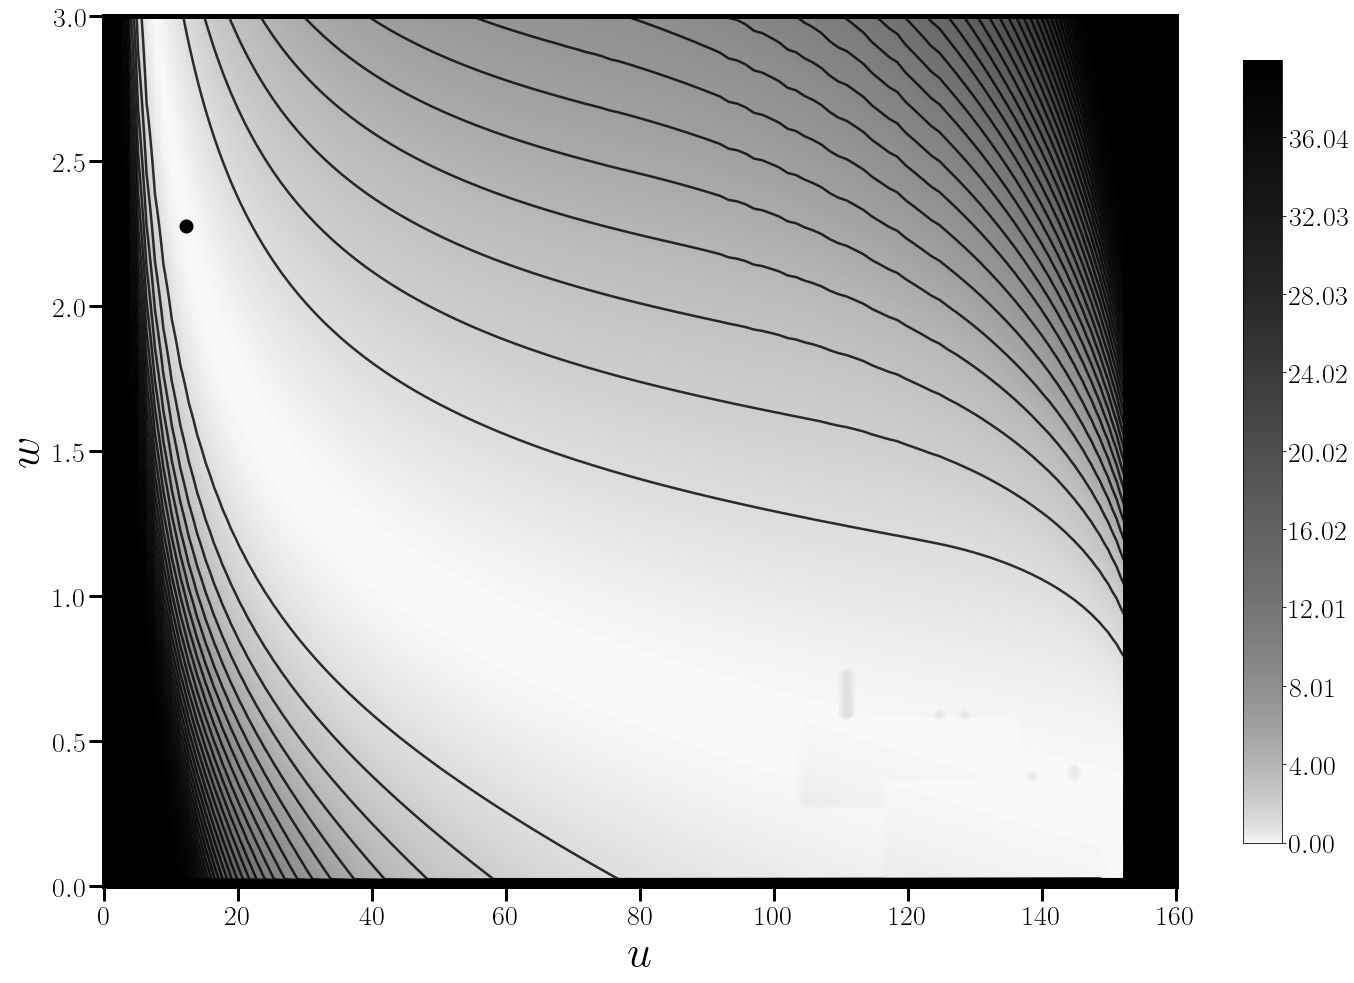

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Contour plot

level_min = 0
level_max = 40
level_N = 1000
levels = np.linspace(level_min, level_max, level_N)
levels = list(levels)

xmin, xmax = np.min(qp_xs), np.max(qp_xs)
ymin, ymax =  np.min(qp_ys), np.max(qp_ys)

ax.fill([xmin, xmin, xmax, xmax, xmin],[ymax, ymin, ymin, ymax, ymax], "black", zorder=-1)

cpf = ax.contourf(qp_X,qp_Y,qp_Z, cmap=cm.Greys_r.reversed(), levels=levels,
                 norm=colors.PowerNorm(gamma=0.4))
colours = [(0,0,0,0.8) for level in cpf.levels]

cp_levels = np.arange(0, 40, 1)
cp = ax.contour(qp_X,qp_Y,qp_Z, 20, colors=colours, linewidths=contour_linewidth, levels=cp_levels)

cbar = fig.colorbar(cpf, ax=ax, shrink=0.9)
cbar.ax.tick_params(labelsize=barlegend_font_size) 

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('genetic_switch_quasipotential_from_xa_to_xb.png', bbox_inches='tight')
plt.show()

In [25]:
qp_data = np.fromfile("data/genetic_switch_quasipotential_from_xb_to_xa.dat",'float32')

qp_width = int(qp_data[0])
qp_height = int(qp_data[1])
qp_xs = qp_data[2:2+qp_width]
qp_ys = qp_data[2+qp_width:3+qp_width+qp_height - 1]
qp_data_offset = 2 + np.size(qp_xs) + np.size(qp_ys)

qp_Z = qp_data[qp_data_offset:].reshape(qp_height, qp_width)
qp_X = np.repeat([qp_xs], len(qp_xs), axis=0)
qp_Y = np.repeat([qp_ys], len(qp_ys), axis=0).T

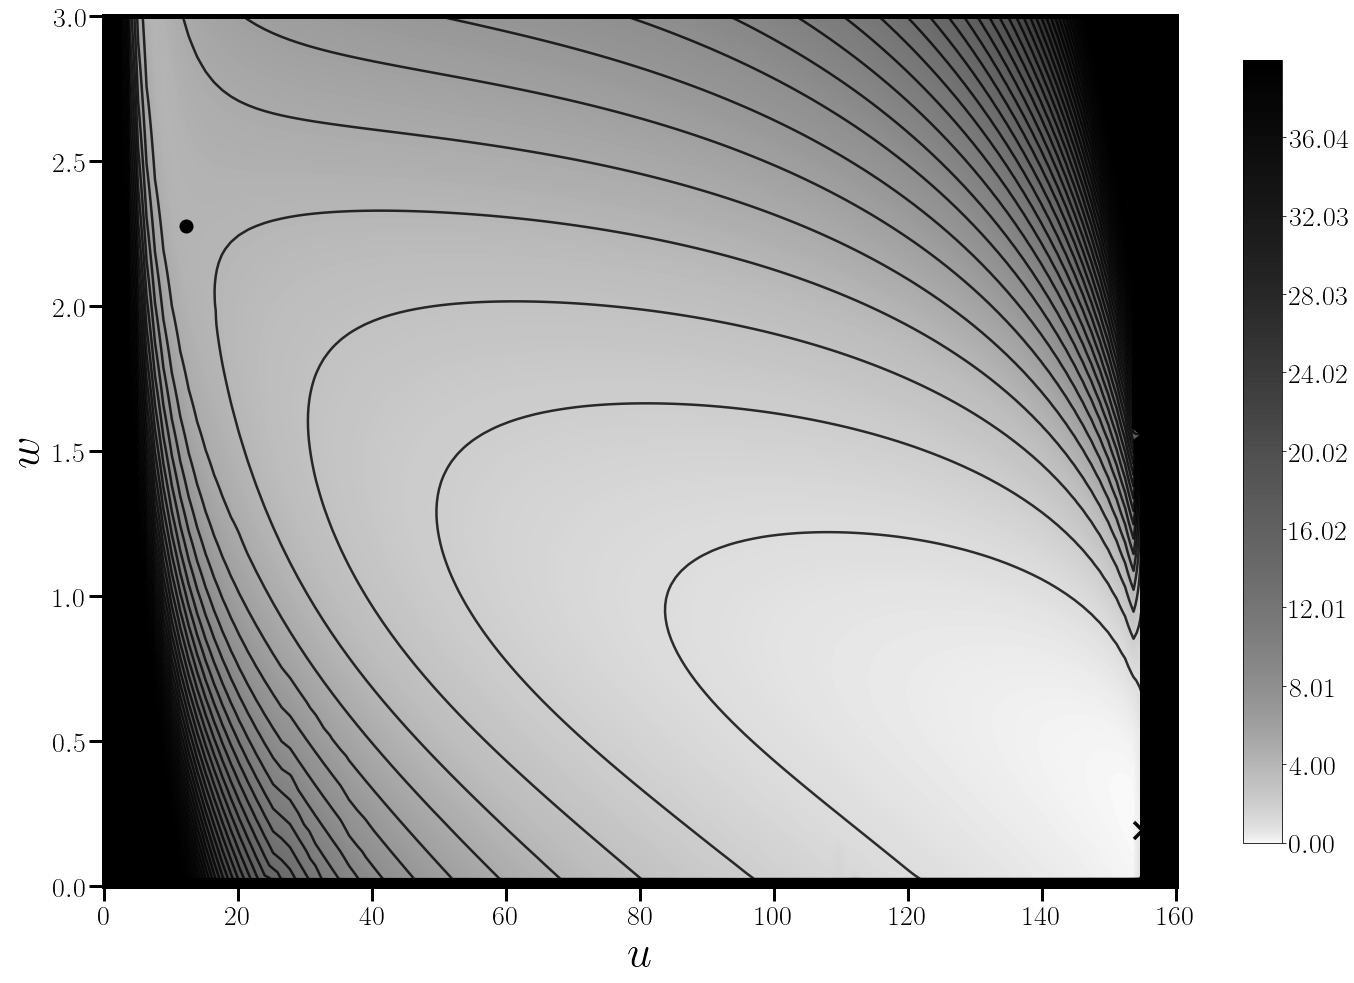

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Contour plot

level_min = 0
level_max = 40
level_N = 1000
levels = np.linspace(level_min, level_max, level_N)
levels = list(levels)

xmin, xmax = np.min(qp_xs), np.max(qp_xs)
ymin, ymax =  np.min(qp_ys), np.max(qp_ys)

ax.fill([xmin, xmin, xmax, xmax, xmin],[ymax, ymin, ymin, ymax, ymax], "black", zorder=-1)

cpf = ax.contourf(qp_X,qp_Y,qp_Z, cmap=cm.Greys_r.reversed(), levels=levels,
                 norm=colors.PowerNorm(gamma=0.4))
colours = [(0,0,0,0.8) for level in cpf.levels]

cp_levels = np.arange(0, 40, 1)
cp = ax.contour(qp_X,qp_Y,qp_Z, 20, colors=colours, linewidths=contour_linewidth, levels=cp_levels)

cbar = fig.colorbar(cpf, ax=ax, shrink=0.9)
cbar.ax.tick_params(labelsize=barlegend_font_size) 

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)

# Frame settings

ax.set_xlabel(r'$u$', fontsize=axes_font_size)
ax.set_ylabel(r'$w$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w+plot_w_barlegend, plot_h)

plt.savefig('genetic_switch_quasipotential_from_xb_to_xa.png', bbox_inches='tight')
plt.show()

## Concentric limit cycle problem

In [27]:
dim = 2

m_r1 = 1
m_r2 = 3
m_r3 = 4
m_c = 0.25

def system_a_pol(r, th):
    return np.array([(1+np.cos(th)**2)* ( -m_c*(r-m_r3)*(r-m_r2)*(r-m_r1) ),
                     r*(1 + np.sin(th)**2)])

def system_a(x, y):
    return np.array([
        (-4*y*np.sqrt(x**2 + y**2)*(x**2 + 2*y**2) + x*(2*x**2 + y**2)*(m_r1 - np.sqrt(x**2 + y**2))*(m_r2 - np.sqrt(x**2 + y**2))*(m_r3 - np.sqrt(x**2 + y**2)))/(4.*(x**2 + y**2)),
        (x*(x**2 + 2*y**2))/np.sqrt(x**2 + y**2) + (y*(2*x**2 + y**2)*(m_r1 - np.sqrt(x**2 + y**2))*(m_r2 - np.sqrt(x**2 + y**2))*(m_r3 - np.sqrt(x**2 + y**2)))/(4.*(x**2 + y**2))
    ])

In [28]:
m_rs = np.array([0.9999999999,1.0000059202234866,1.0000132028976856,1.000021426402648,1.000030201518417,1.0000391706828524,1.000048007355329,1.0000564153862788,1.0000641283925096,1.0000709091382793,1.0000765489220635,1.0000808669689865,1.0000837098288753,1.0000849507798937,1.000084489237721,1.000082250170244,1.0000781835177206,1.0000722636183867,1.0000644886394738,1.0000548800136022,1.0000434818805248,1.0000303605341891,1.0000156038750925,0.9999993208678987,0.9999816410042967,0.9999627137710689,0.999942708123352,0.9999218119630608,0.9999002316224547,0.9998781913528286,0.9998559328183002,0.9998337145946795,0.999811811673395,0.999790514970468,0.9997701308404997,0.999750980595672,0.9997334000297318,0.9997177389469457,0.9997043606960156,0.9996936417089253,0.9996859710447186,0.9996817499381845,0.9996813913534376,0.9996853195423826,0.9996939696080442,0.9997077870727555,0.9997272274511867,0.9997527558282052,0.9997848464415554,0.9998239822693428,0.9998706546223116,0.9999253627409137,0.9999886133971377,1.0000609205011133,1.000142804712455,1.0002347930563527,1.000337418544394,1.0004512198000952,1.0005767406891597,1.000714529954415,1.000865140855461,1.0010291308129786,1.0012070610577184,1.001399496284151,1.0016070043087593,1.0018301557329756,1.0020695236107509,1.0023256831207417,1.0025992112431072,1.00289068644091,1.0032006883461035,1.0035297974501065,1.003878594798938,1.0042476616929237,1.0046375793909454,1.005048928819228,1.0054822902846643,1.0059382431926478,1.006417365769418,1.0069202347889037,1.0074474253040449,1.0079995103825914,1.0085770608473685,1.009180645020983,1.0098108284749767,1.0104681737833991,1.0111532402807974,1.0118665838246093,1.0126087565619377,1.0133803067007108,1.014181778285192,1.0150137109758508,1.0158766398335566,1.0167710951081037,1.0176976020310349,1.018656680612761,1.0196488454439572,1.0206746055012188,1.0217344639569654,1.0228289179935772,1.0239584586217418,1.0251235705030068,1.0263247317765047,1.0275624138898545,1.0288370814342003,1.0301491919833894,1.0314991959372584,1.0328875363690175,1.0343146488767083,1.035780961438721,1.037286894273352,1.0388328597023793,1.0404192620186379,1.042046497357579,1.0437149535727834,1.0454250101154214,1.0471770379176242,1.0489713992797582,1.0508084477615747,1.0526885280772091,1.0546119759940222,1.0565791182352389,1.0585902723863838,1.0606457468054757,1.062745840536968,1.064890843229396,1.0670810350567301,1.0693166866433885,1.071598058992897,1.0739254034201684,1.0762989614873795,1.078718964943407,1.0811856356668155,1.0836991856123606,1.0862598167609783,1.088867721073243,1.0915230804462575,1.0942260666739585,1.0969768414107968,1.0997755561387783,1.1026223521378278,1.10551736045945,1.1084607019036612,1.1114524869991613,1.1144928159867151,1.1175817788057167,1.1207194550839055,1.1239059141302035,1.1271412149306448,1.130425406147369,1.1337585261206387,1.1371406028738635,1.140571654121591,1.1440516872804305,1.147580699482891,1.1511586775940816,1.154785598231267,1.15846142778622,1.1621861224503598,1.165959628242631,1.1697818810400946,1.1736528066111955,1.1775723206516835,1.1815403288231336,1.185556726794055,1.1896214002835404,1.1937342251074237,1.1978950672269202,1.202103782799703,1.2063602182333932,1.210664210241413,1.2150155859011909,1.2194141627146609,1.223859748671033,1.228352142311799,1.2328911327979335,1.2374764999792618,1.2421080144659502,1.2467854377020964,1.2515085220413664,1.2562770108246588,1.261090638459753,1.2659491305029054,1.2708522037423555,1.2757995662837187,1.2807909176372028,1.2858259488066495,1.2909043423803273,1.2960257726234632,1.3011899055724747,1.3063963991308514,1.3116449031666648,1.3169350596116658,1.3222665025619276,1.3276388583800078,1.333051745798582,1.3385047760255213,1.343997552850373,1.3495296727522061,1.3551007250087974,1.3607102918070964,1.366357948354963,1.3720432629941213,1.3777657973142978,1.3835251062685077,1.3893207382894617,1.3951522354070378,1.4010191333668058,1.4069209617495464,1.4128572440917455,1.418827498007015,1.424831235308413,1.430867962131632,1.436937179058997,1.4430383812442644,1.449171058538172,1.4553346956147069,1.461528772098058,1.4677527626902147,1.4740061372991817,1.4802883611677655,1.4865988950029132,1.4929371951055557,1.49930271350092,1.5056948980692944,1.512113192677183,1.518557037308846,1.525025868198169,1.5315191179608392,1.5380362157267953,1.544576587272906,1.551139655155862,1.557724838845233,1.5643315548566619,1.5709592168851731,1.5776072359385391,1.5842750204707041,1.590961976515205,1.5976675078185738,1.6043910159736863,1.6111319005530214,1.6178895592418068,1.6246633879710168,1.6314527810501913,1.6382571313000407,1.645075830184821,1.6519082679444317,1.6587538337262235,1.6656119157164648,1.6724819012714685,1.6793631770483146,1.686255129135173,1.6931571431811752,1.7000686045258135,1.7069888983278485,1.7139174096936856,1.720853523805194,1.727796626046956,1.7347461021328952,1.7417013382322832,1.7486617210950783,1.7556266381765855,1.7625954777613977,1.7695676290866094,1.7765424824642573,1.7835194294029955,1.790497862728939,1.7974771767056887,1.8044567671534926,1.8114360315675266,1.818414369235279,1.825391181352995,1.832365871141197,1.839337843959204,1.8463065074186842,1.853271271496188,1.8602315486446404,1.867186753903784,1.8741363050095567,1.8810796225023538,1.8880161298341998,1.8949452534747697,1.9018664230162678,1.9087790712771338,1.9156826344045599,1.9225765519758018,1.9294602670982697,1.9363332265083715,1.9431948806691113,1.9500446838663967,1.9568820943040797,1.9637065741976667,1.9705175898667338,1.9773146118259894,1.9840971148749942,1.990864578186521,1.997616485393529,2.0043523246747585,2.0110715888389112,2.017773775407425,2.0244583866958124,2.0311249298935654,2.037772917142605,2.04440186561427,2.0510112975848296,2.057600740509522,2.0641697270950865,2.0707177953708014,2.0772444887580095,2.0837493561381217,2.090231951919084,2.096691836100321,2.103128574336124,2.10954173799749,2.1159309042324015,2.1222956560245394,2.1286355822504266,2.134950277734991,2.1412393433055454,2.1475023858441835,2.1537390183385736,2.159948859931171,2.1661315359668083,2.172286678038702,2.178413924032833,2.184512918170736,2.1905833110506525,2.1966247596870887,2.2026369275487485,2.208619484594849,2.2145721073098095,2.2204944787363394,2.2263862885068852,2.2322472328734704,2.238077014735911,2.243875343668416,2.249641935944566,2.255376514560677,2.261078809257554,2.2667485565406262,2.2723854996984807,2.2779893888197815,2.283559980808588,2.2890970393980847,2.294600335162696,2.300069645528623,2.305504754782793,2.3109054540802214,2.316271541449806,2.3216028217985327,2.326899106914147,2.3321602154662298,2.337385973005754,2.3425762119630753,2.347730771644391,2.3528494982266728,2.3579322447510687,2.362978871114801,2.3679892440615458,2.3729632371703264,2.3779007308429114,2.382801612289738,2.387665775514365,2.3924931212964653,2.397283557173368,2.4020369974201703,2.406753363028409,2.411432581683326,2.416074587739723,2.420679322196423,2.425246732669353,2.4297767733632534,2.4342694050420293,2.438724594997761,2.4431423170183826,2.4475225513540373,2.4518652846821314,2.4561705100710944,2.4604382269428653,2.464668441034111,2.468861164356199,2.4730164151539293,2.4771342178630564,2.481214603066598,2.485257607449959,2.4892632737548737,2.493231650732206,2.4971627930935925,2.5010567614619523,2.5049136223209185,2.5087334479631354,2.5125163164375133,2.516262311495396,2.5199715225357076,2.523644044549057,2.5272799780608435,2.530879429073363,2.534442509006952,2.537969334640162,2.541460028049015,2.544914716545314,2.548333532614088,2.5517166138501115,2.5550641028935988,2.5583761473650326,2.561652899799169,2.5648945175782365,2.568101162864353,2.571273002531164,2.5744102080947346,2.577512955643718,2.5805814257688025,2.583615803491476,2.586616278192118,2.589583043537435,2.592516297407273,2.595416241820811,2.5982830828621695,2.601117030605444,2.603918299039187,2.606687105990367,2.609423673047806,2.6121282254851352,2.6148009921832838,2.617442205552507,2.6200521014540006,2.6226309191210992,2.6251789010800843,2.627696293070641,2.630183343965951,2.632640305692472,2.635067433149411,2.637464984127911,2.6398332192299785,2.6421724017871666,2.644482797779037,2.646764675751423,2.64901830673451,2.6512439641607637,2.653441923782703,2.6556124635905785,2.6577558637299328,2.6598724064190957,2.661962375866624,2.6640260581886905,2.6660637413264814,2.6680757149635763,2.6700622704433687,2.6720237006865246,2.673960300108509,2.675872364537197,2.677760191130594,2.6796240782946823,2.681464325601402,2.6832812337068197,2.6850751042694596,2.6868462398688497,2.688594943924301,2.6903215206139137,2.692026274793857,2.6937095119179286,2.695371537957418,2.697012659321287,2.6986331827766885,2.700233415369849,2.7018136643473234,2.7033742370776404,2.704915440973373,2.706437583413627,2.70794097166699,2.7094259128149387,2.7108927136757366,2.7123416807288296,2.713773120039773,2.715187337185673,2.7165846371812026,2.717965324405187,2.719329702527758,2.7206780744381365,2.7220107421730138,2.7233280068455867,2.724630168575235,2.725917526417867,2.7271903782969527,2.7284490209352534,2.729693749787264,2.730924858972391,2.73214264120886,2.7333473877483967,2.734539388311672,2.7357189310245333,2.736886302355037,2.7380417870512974,2.7391856680801543,2.740318226566695,2.7414397417346144,2.742550490847449,2.743650749150688,2.744740789814769,2.7458208838789906,2.7468913001963147,2.7479523053791204,2.749004163745875,2.750047137268757,2.751081485522244,2.75210746563266,2.7531253322287075,2.7541353373929764,2.755137730614467,2.7561327587421114,2.7571206659393033,2.7581016936394684,2.7590760805026493,2.760044062373159,2.7610058722382482,2.761961740187857,2.7629118933754233,2.7638565559797543,2.7647959491679868,2.765730291059627,2.7666597966916804,2.7675846779848765,2.768505143711003,2.769421399461338,2.770333647616201,2.7712420873156214,2.7721469144311186,2.77304832153862,2.7739464978924993,2.774841629400761,2.7757338986013362,2.7766234846395417,2.77751056324667,2.7783953067197205,2.7792778839022834,2.7801584601665636,2.7810371973965604,2.7819142539723867,2.782789784755752,2.783663941076589,2.7845368707208222,2.785408717919307,2.786279623337904,2.7871497240687053,2.7880191536224115,2.788888041921856,2.789756515296672,2.790624696479104,2.791492704600958,2.7923606551916915,2.7932286601776415,2.794096827882377,2.7949652630281774,2.7958340667386588,2.7967033365424836,2.7975731663782146,2.798443646600266,2.799314863985965,2.800186901743714,2.8010598395222406,2.8019337534209434,2.8028087160013175,2.803684796299451,2.804562059839602,2.805440568648818,2.806320381272632,2.807201552791782,2.8080841348399854,2.8089681756227334,2.8098537199371107,2.810740809192632,2.8116294814330582,2.812519771359242,2.8134117103529275,2.8143053265015343,2.815200644623906,2.8160976862970055,2.816996469883563,2.8178970105606345,2.8187993203491013,2.819703408144064,2.820609279746134,2.821516937893611,2.822426382295526,2.8233376096655496,2.82425061375674,2.825165385397122,2.8260819125260936,2.827000180231624,2.827920170788251,2.8288418636958603,2.829765235719207,2.830690260928213,2.831616910738972,2.832545153955492,2.8334749568121222,2.8344062830166847,2.8353390937942664,2.8362733479316717,2.837209001822511,2.8381460095129167,2.8390843227478597,2.840023891018067,2.8409646616075026,2.8419065796414067,2.8428495881348743,2.8437936280419662,2.8447386383052993,2.8456845559061534,2.8466313159150216,2.8475788515426284,2.848527094191368,2.8494759735071655,2.8504254174317314,2.8513753522551855,2.852325702669056,2.853276391819597,2.8542273413614465,2.8551784715115693,2.8561297011034945,2.8570809476418084,2.8580321273568905,2.8589831552598843,2.8599339451978545,2.8608844099091444,2.8618344610788933,2.8627840093946957,2.863732964602385,2.864681235561935,2.865628730303429,2.866575356083105,2.867521019439443,2.8684656262492743,2.8694090817839064,2.870351290765215,2.8712921574217134,2.8722315855445615,2.8731694785434976,2.874105739502674,2.8750402712363776,2.875972976344608,2.8769037572685052,2.8778325163455905,2.8787591558648193,2.879683578121408,2.8806056854714255,2.881525380386121,2.8824425655059875,2.883357143694505,2.884269018091584,2.8851780921666625,2.886084269771441,2.886987455192243,2.887887553201986,2.8887844691117146,2.8896781088217205,2.890568378872187,2.8914551864933684,2.8923384396552754,2.893218047116837,2.894093918474542,2.8949659642105217,2.8958340957400655,2.896698225458546,2.897558266787742,2.8984141342215306,2.8992657433709446,2.9001130110085604,2.9009558551122163,2.9017941949080273,2.9026279509126973,2.9034570449750925,2.9042814003170747,2.9051009415735662,2.9059155948318405,2.9067252876700165,2.90752994919474,2.9083295100780373,2.9091239025933326,2.9099130606506005,2.910696919830649,2.9114754174185213,2.9122484924359875,2.913016085673124,2.9137781397189713,2.9145345989912372,2.9152854097650573,2.916030520200773,2.9167698803707425,2.917503442285153,2.91823115991682,2.91895298922499,2.9196688881780934,2.9203788167754703,2.921082737068052,2.9217806131779707,2.9224724113171052,2.923158099804558,2.923837649083029,2.9245110317341014,2.9251782224924243,2.9258391982587812,2.9264939381120367,2.9271424233199577,2.9277846373489034,2.9284205658723725,2.9290501967784035,2.9296735201758266,2.930290528399364,2.930901216013556,2.931505579815536,2.9321036188366314,2.9326953343427884,2.9332807298338337,2.9338598110415472,2.934432585926564,2.934999064674095,2.9355592596884614,2.9361131855864553,2.9366608591895176,2.9372022995147287,2.937737527764625,2.9382665673158415,2.9387894437065674,2.9393061846228354,2.9398168198836414,2.940321381424893,2.9408199032821933,2.941312421572478,2.9417989744744837,2.9422796022080804,2.942754347012454,2.943223253123163,2.943686366748057,2.9441437360420837,2.9445954110809835,2.9450414438338703,2.945481888134742,2.9459167996528737,2.946346235862176,2.946770256009461,2.947188921081665,2.947602293772048,2.9480104384453436,2.9484134211019137,2.9488113093408943,2.9492041723223608,2.9495920807285256,2.9499751067239686,2.950353323914948,2.950726807307767,2.9510956332662577,2.951459879468355,2.9518196248618187,2.952174949619096,2.9525259350913493,2.952872663761677,2.953215219197546,2.953553686002441,2.9538881497667773,2.9542186970180744,2.954545415170434,2.954868392473329,2.955187717959738,2.9555034813936376,2.9558157732168953,2.956124684495566,2.956430306865641,2.9567327324782475,2.957032053944356,2.9573283642790025,2.9576217568450516,2.9579123252965456,2.958200163521655,2.9584853655852563,2.9587680256711772,2.959048238024142,2.959326096891423,2.9596016964642593,2.959875130819061,2.9601464938584217,2.9604158792519915,2.960683380377218,2.960949090260021,2.9612131015153977,2.961475506288021,2.9617363961928502,2.961995862255797,2.962253994854469,2.9625108836590472,2.962766617573308,2.963021284675846,2.9632749721615257,2.963527766283195,2.963779752293706,2.9640310143882735,2.964281635647211,2.964531697979086,2.964781282064322,2.9650304672992958,2.9652793317409665,2.965527952052071,2.9657764034469256,2.9660247596378717,2.9662730927824184,2.966521473431095,2.9667699704760775,2.967018651100616,2.967267580729304,2.967516822979228,2.967766439612052,2.968016490487047,2.968267033515133,2.9685181246139587,2.968769817664071,2.9690221644661903,2.9692752146996573,2.969529015882077,2.969783613330205,2.970039050122103,2.9702953670606225,2.9705526026382354,2.9708107930032726,2.971069971927582,2.971330170775658,2.9715914184753007,2.9718537414897925,2.9721171637916806,2.972381706838171,2.9726473895481837,2.9729142282810965,2.9731822368172183,2.9734514263400347,2.973721805420237,2.973993380001593,2.974266153388686,2.974540126236545,2.974815296542206,2.9750916596382395,2.9753692081882717,2.97564793218452,2.97592781894739,2.9762088531271456,2.9764910167076954,2.9767742890125057,2.9770586467126714,2.9773440638371906,2.977630511785422,2.9779179593417955,2.9782063726927652,2.9784957154460394,2.9787859486521016,2.979077030828049,2.979368917983752,2.979661563650362,2.9799549189111803,2.9802489324348884,2.980543550511172,2.9808387170887345,2.981134373815705,2.981430460082466,2.981726913066884,2.9820236677819683,2.982320657125938,2.9826178119347144,2.9829150610368305,2.9832123313107566,2.983509547744628,2.9838066334983813,2.9841035099682838,2.9844000968538293,2.9846963122270225,2.9849920726039962,2.985287293018969,2.9855818871005178,2.985875767150134,2.986168844223046,2.986461028211281,2.9867522279289354,2.9870423511996056,2.9873313049459758,2.987618995281492,2.987905327604097,2.988190206691981,2.9884735368013056,2.9887552217658317,2.9890351650984273,2.9893132700943696,2.989589439936409,2.9898635778015095,2.9901355869692092,2.9904053709315406,2.990672833504419,2.990937878940436,2.9912004120429683,2.9914603382815312,2.9917175639082765,2.991971996075543,2.992223542954371,2.9924721138538826,2.9927176193414144,2.992959971363293,2.99319908336616,2.9934348704187057,2.993667249333706,2.9938961387902254,2.994121459455873,2.994343134108946,2.994561087760357,2.9947752477751695,2.994985543993604,2.9951919088513734,2.995394277499144,2.995592587921012,2.995786781051787,2.995976800892902,2.996162594626808,2.996344112729609,2.9965213090817953,2.9966941410768335,2.996862569727439,2.9970265597693055,2.997186079762054,2.9973411021872267,2.9974916035430383,2.99763756443568,2.9977789696669355,2.99791580831783,2.998048073828078,2.9981757640710627,2.9982988814240596,2.998417432833442,2.9985314298745744,2.998640888806093,2.9987458306182857,2.9988462810752465,2.9989422707504976,2.9990338350557555,2.9991210142624896,2.9992038535159504,2.9992824028413136,2.9993567171415694,2.9994268561868056,2.9994928845944915,2.999554871800398,2.9996128920197336,2.999667024198119,2.9997173519519698,2.9997639634978683,2.9998069515705033,2.999846413328715,2.9998824502492196,2.999915168007528,2.9999446763456024,2.999971088925763,2.9999945231703506,3.000015100086643,3.000032944076514,3.0000481827303065,3.0000609466043846,3.0000713689818115,3.0000795856156106,3.000085734454015,3.000089955347142,3.000092389734496,3.000093180312683,3.0000924706827212,3.0000904049763304,3.000087127460537,3.0000827821199465,3.0000775122160155,3.000071459822639,3.0000647653373558,3.00005756696746,3.0000500001902974,3.0000421971870193,3.0000342862490204,3.000026391156315,3.000018630527063,3.0000111171374524,3.000003957211129,2.999997249677344,2.999991085396994,2.999985546355676,2.999980704822907,2.9999766224766122,2.9999733494919782,2.9999709235937555,2.999969369071073,2.9999686957538114,2.9999688979495764,2.9999699533402637,2.9999718218372395,2.9999744443940957,2.9999777417759477,2.999981613284221,2.9999859354358507,2.999990560595797,2.999995315561762,3.0000000001])
m_ths = np.array([0,1.6208175494720674,3.1868390379827756,4.699730686607322,6.161113913019335,7.572566383877197,8.935623045812706,10.25177713548589,11.522481169067316,12.749147911504112,13.933151325918104,15.075827503483628,16.17847557412328,17.24235859835799,18.268704440642146,19.258706624508232,20.213525169843333,21.13428741261253,22.022088807341078,22.877993712663034,23.703036160237236,24.498220607330364,25.264522673358982,26.002889860680565,26.71424225991845,27.399473240100303,28.05945012388768,28.695014848167542,29.306984610274867,29.89615250010955,30.46328811840775,31.009138181424042,31.534427112275534,32.03985761919737,32.52611126095267,32.993848999638395,33.44371174112388,33.87632086335452,34.292278732751434,34.692169208931375,35.076558137971084,35.44599383443348,35.80100755237206,36.14211394552524,36.469811516909175,36.784583058014775,37.08689607781057,37.377203221750385,37.6559426809818,37.92353859194715,38.180401426567066,38.42692837319261,38.66350370850899,38.89049916057161,39.10827426315116,39.317176701562715,39.51754265014983,39.709697101592425,39.893954188204724,40.07061749538541,40.23998036738154,40.40232620552268,40.55792875908115,40.70705240891055,40.84995244401188,40.98687533117523,41.118058977841294,41.24373298832516,41.36411891354204,41.479430494372586,41.58987389880246,41.69564795296928,41.79694436624668,41.89394795049431,41.98683683359893,42.075782667430566,42.1609508303352,42.242500624282854,42.320585466788756,42.395353077722206,42.46694566111633,42.535500082089406,42.6011480389873,42.66401623085314,42.7242265203299,42.78189609209862,42.83713760695367,42.89005935161418,42.94076538436934,42.98935567665305,43.03592625064194,43.08056931296891,43.123373384642406,43.16442342726047,43.20380096560617,43.24158420671015,43.277848155463786,43.31266472686518,43.346102854978376,43.378228598685254,43.40910524430675,43.438793405170365,43.46735111819728,43.49483393758316,43.5212950256434,43.546785240893456,43.57135322343258,43.595045477698704,43.61790645266028,43.63997861950973,43.661302546921966,43.68191697394003,43.70185888054872,43.72116355599561,43.7398646649179,43.7579943113324,43.775583100544026,43.79266019902841,43.80925339234144,43.825389141108595,43.84109263514566,43.85638784576056,43.87129757628593,43.88584351089042,43.900046261715985,43.913925414386874,43.92749957193582,43.940786397191296,43.95380265366905,43.966564245009856,43.979086253005185,43.991382974250364,44.00346795546542,44.015354027521596,44.02705333821127,44.03857738379816,44.04993703938368,44.06114258812437,44.07220374933516,44.08312970551134,44.0939291283024,44.10461020346947,44.11518065485756,44.125647767413014,44.136018409275934,44.146299052976445,44.15649579576323,44.16661437909172,44.176660207299115,44.18663836549226,44.19655363667389,44.20641051813273,44.21621323712104,44.225965765843775,44.23567183578255,44.24533495137639,44.25495840308206,44.26454527983426,44.274098480927584,44.283620727339674,44.29311457251577,44.30258241263364,44.31202649636777,44.321448934170654,44.330851707089266,44.34023667513377,44.349605585214924,44.358960078667074,44.3683016983718,44.377631895498205,44.386952035874366,44.39626340600473,44.40556721874728,44.41486461866447,44.424156687060766,44.43344444672027,44.44272886635626,44.45201086478533,44.46129131483762,44.47057104701448,44.47985085290497,44.48913148837146,44.49841367651501,44.50769811043046,44.516985455761095,44.52627635306197,44.535571419981494,44.54487125326969,44.55417643062173,44.563487512365306,44.57280504299929,44.58212955259165,44.59146155804427,44.60080156423128,44.610150065018374,44.619507544169394,44.62887447614699,44.63825132681304,44.64763855403533,44.657036608206006,44.66644593267712,44.67586696411921,44.68530013280726,44.69474586283957,44.70420457229404,44.71367667332619,44.723162572213816,44.73266266935182,44.74217735920171,44.75170703019934,44.76125206462458,44.77081283843653,44.780389721077604,44.78998307524953,44.79959325666446,44.8092206137741,44.81886548747966,44.82852821082511,44.83820910867628,44.84790849738844,44.85762668446426,44.8673639682045,44.87712063735346,44.88689697074089,44.8966932369226,44.906509693820865,44.91634658836679,44.92620415614582,44.93608262104788,44.94598219492343,44.955903077246845,44.96584545478792,44.9758095012929,44.98579537717574,44.995803229220876,45.005833190297764,45.015885379088616,45.02595989982943,45.03605684206539,45.046176280420916,45.05631827438499,45.06648286811223,45.07667009024,45.08687995372197,45.09711245567842,45.10736757726342,45.11764528354923,45.12794552342811,45.138268229531064,45.1486133181647,45.158980689264965,45.16937022636876,45.17978179660275,45.1902152506895,45.200670422971044,45.211147131449266,45.22164517784332,45.232164347663776,45.24270441030311,45.253265119142654,45.263846211675144,45.27444740964343,45.28506841919406,45.29570893104623,45.30636862067516,45.317047148510134,45.327744160146096,45.33845928656913,45.34919214439485,45.359942336119765,45.37070945038476,45.38149306225057,45.392292733484894,45.403108012860045,45.41393843646169,45.42478352800736,45.43564279917474,45.446515749938996,45.45740186891917,45.46830063373225,45.47921151135562,45.49013395849643,45.50106742196779,45.512011339071705,45.52296513798744,45.533928238165615,45.54490005072723,45.55587997886706,45.56686741826141,45.577861757479006,45.58886237839567,45.59986865661106,45.610879961868164,45.62189565847451,45.63291510572469,45.64393765832411,45.654962666813134,45.66598947799165,45.67701743534323,45.688045879458834,45.69907414845963,45.71010157841833,45.721127503778895,45.73215125777432,45.74317217284181,45.754189581035575,45.7652028144362,45.776211205557004,45.78721408774649,45.79821079558709,45.8092006652894,45.82018303508213,45.83115724559722,45.84212264024982,45.85307856561312,45.86402437178762,45.87495941276471,45.885883046784166,45.896794636685726,45.90769355025407,45.9185791605574,45.92945084627938,45.940307992044005,45.95114998873369,45.96197623379993,45.972786131567005,45.98357909352782,45.994354538632585,46.00511189356971,46.01585059303895,46.02657008001666,46.03726980601335,46.04794923132307,46.05860782526473,46.06924506641576,46.079860442837,46.09045345229002,46.10102360244584,46.111570411085815,46.122093406293985,46.132592126641484,46.14306612136257,46.15351495052265,46.16393818517793,46.174335407527245,46.18470621105538,46.195050200668746,46.20536699282288,46.21565621564201,46.22591750903058,46.23615052477744,46.246354926651726,46.2565303904915,46.266676604284676,46.27679326824232,46.28688009486491,46.29693680900095,46.3069631478987,46.31695886125064,46.326923711231075,46.33685747252683,46.34675993236139,46.35663089051219,46.36647015932182,46.376277563702345,46.38605294113406,46.395796141657755,46.40550702786117,46.41518547485978,46.42483137027179,46.43444461418774,46.44402511913476,46.45357281003563,46.46308762416279,46.47256951108749,46.4820184326242,46.49143436277039,46.50081728764202,46.5101672054046,46.519484126200254,46.52876807207079,46.538019076876985,46.54723718621411,46.55642245732422,46.565574959004834,46.574694771514515,46.58378198647559,46.592836706773795,46.60185904645508,46.610849130620295,46.619807095316894,46.62873308742878,46.63762726456371,46.646489794938944,46.65532085726479,46.664120640626756,46.672889344365636,46.681627177956685,46.69033436088705,46.6990111225323,46.70765770203163,46.716274348162464,46.724861319213744,46.733418882859056,46.74194731602879,46.750446904781995,46.7589179441777,46.76736073814627,46.77577559936016,46.78416284910507,46.79252281715075,46.8008558416221,46.80916226887051,46.81744245334534,46.82569675746587,46.83392555149364,46.84212921340542,46.850308128766535,46.858462690605094,46.86659329928678,46.874700362390314,46.882784294584035,46.890845517503,46.898884459627226,46.906901556160804,46.914897248911934,46.9228719861742,46.930826222608495,46.93876041912653,46.94667504277494,46.95457056662089,46.96244746963854,46.97030623659683,46.97814735794819,46.985971329718694,46.99377865339905,47.00156983583688,47.009345389130075,47.01710583052133,47.02485168229364,47.03258347166702,47.04030173069614,47.04800699616903,47.05569980950686,47.06338071666454,47.07105026803231,47.07870901833815,47.08635752655119,47.093996355785706,47.10162607320598,47.10924724993178,47.11686046094452,47.12446628499407,47.13206530450583,47.13965810548865,47.147245277442664,47.15482741326788,47.162405109172795,47.169978964583265,47.17754958205137,47.18511756716452,47.19268352845433,47.200248077305474,47.20781182786429,47.21537539694718,47.22293940394854,47.23050447074827,47.23807122161888,47.24564028313176,47.25321228406295,47.260787855297956,47.26836762973577,47.27595224219196,47.28354232930067,47.29113852941531,47.298741482508355,47.30635183006952,47.31397021500264,47.32159728152117,47.32923367504178,47.3368800420766,47.34453703012365,47.35220528755519,47.35988546350448,47.36757820775021,47.37528417059914,47.38300400276633,47.39073835525319,47.39848787922327,47.40625322587555,47.41403504631536,47.421833991422545,47.42965071171727,47.43748585722294,47.44534007732647,47.45321402063573,47.46110833483398,47.46902366653165,47.4769606611148,47.484919962590894,47.4929022134311,47.500908054409855,47.508938124440924,47.516993060410464,47.52507349700679,47.53318006654678,47.541313398799126,47.549474120804106,47.55766285669008,47.565880227486794,47.5741268509349,47.58240334129251,47.59071030913814,47.599048361170446,47.60741810000431,47.61582012396391,47.62425502687218,47.63272339783702,47.641225821034354,47.64976287548766,47.65833513484447,47.66694316714957,47.6755875346151,47.684268793387595,47.692987493311826,47.7017441776919,47.71053938304918,47.71937363887762,47.72824746739605,47.73716138329819,47.746115893499514,47.755111496882066,47.7641486840368,47.77322793700331,47.782349729007784,47.79151452419863,47.800722777380145,47.80997493374454,47.81927142860199,47.82861268710949,47.83799912399785,47.847431143297825,47.85690913806489,47.86643349010316,47.87600456968844,47.88562273529071,47.89528833329622,47.90500169772916,47.91476314997338,47.924572998494234,47.934431538560546,47.94433905196745,47.95429580675937,47.9643020569546,47.97435804227053,47.984463987850354,47.99462010399153,48.004826585875826,48.01508361330158,48.0253913504182,48.0357499454631,48.04615953050166,48.05662022116984,48.06713211642055,48.077695298273106,48.088309831566804,48.09897576371849,48.10969312448428,48.12046192572626,48.13128216118375,48.14215380624998,48.15307681775384,48.16405113374786,48.17507667330192,48.18615333630324,48.19728100326301,48.20845953513004,48.21968877311145,48.23096853850081,48.242298632514185,48.253678836134114,48.26510890996211,48.27658859407967,48.288117607918345,48.299695650139036,48.31132239852088,48.32299750985996,48.33472061987829,48.346491343143036,48.3583092729967,48.37017398149829,48.38208501937576,48.3940419159902,48.40604417931182,48.41809129590834,48.43018273094553,48.442317928200985,48.454496310090526,48.46671727770824,48.47898021087988,48.49128446823033,48.503629387265065,48.51601428446605,48.52843845540233,48.54090117485532,48.55340169695948,48.56593925535815,48.57851306337514,48.591122314201975,48.60376618110128,48.61644381762645,48.62915435785764,48.64189691665454,48.654670589925864,48.66747445491586,48.680307570508205,48.693168977546826,48.70605769917469,48.718972741189816,48.73191309241937,48.74487772511143,48.75786559534482,48.770875643457174,48.78390679449088,48.796957958657636,48.81002803182108,48.82311589599795,48.83622041987758,48.849340459359944,48.86247485811207,48.875622448143,48.888782050397104,48.90195247536596,48.91513252371857,48.928320986949856,48.94151664804749,48.954718282176884,48.967924657384216,48.98113453531747,48.994346671965424,49.007559818413895,49.020772721620084,49.03398412520373,49.04719277025579,49.060397396163744,49.07359674145373,49.086789544649015,49.09997454514485,49.113150484098725,49.1263161053367,49.13947015627464,49.15261138885438,49.16573856049449,49.17885043505513,49.19194578381661,49.20502338647123,49.21808203212813,49.23112052033025,49.2441376620836,49.257132280897466,49.270103213835924,49.28304931257939,49.29596944449611,49.30886249372273,49.32172736225354,49.33456297103752,49.34736826108282,49.36014219456774,49.37288375595785,49.38559195312796,49.39826581848901,49.41090441011837,49.42350681289325,49.4360721396262,49.44859953220201,49.46108816271507,49.47353723460641,49.48594598379952,49.49831367983399,49.51063962699616,49.522923165445704,49.53516367233751,49.547360562937264,49.55951329173042,49.57162135352321,49.58368428453456,49.595701663478124,49.60767311263311,49.61959829890314,49.631476934861674,49.64330877978302,49.655093640658116,49.66683137319315,49.67852188279086,49.690165125512436,49.701761109019415,49.71330989349395,49.72481159253683,49.736266374041065,49.74767446104089,49.75903613253404,49.77035172427652,49.781621629548496,49.792846299889895,49.804026245804636,49.81516203743195,49.82625430518375,49.83730374034649,49.848311095646544,49.85927718577729,49.870202887887,49.88108914202627,49.891936951553205,49.90274738349555,49.913521568868134,49.92426070294452,49.93496604548154,49.94563892089515,49.956280718386786,49.96689289201861,49.977476960736446,49.98803450833921,49.99856718339372,50.00907669909325,50.01956483305928,50.03003342708453,50.04048438681689,50.05091968138222,50.061341342945916,50.071751466211325,50.0821522078544,50.09254578589339,50.10293447899278,50.11332062570017,50.12370662361574,50.13409492849278,50.14448805326884,50.15488856702693,50.16529909388522,50.17572231181565,50.18616095138983,50.1966177944522,50.20709567271988,50.217597466308554,50.228126102184085,50.2386845525396,50.24927583309779,50.25990300133799,50.27056915464823,50.28127742840216,50.29203099396063,50.30283305659849,50.313686853356494,50.324595650818736,50.33556274281608,50.34659144805598,50.35768510767944,50.36884708274577,50.38008075164585,50.39138950744513,50.40277675515723,50.414245908949205,50.42580038928033,50.43744361997507,50.44917902523257,50.46101002657386,50.47294003972903,50.48497247146613,50.497110716363984,50.50935815353161,50.52171814327624,50.53419402372297,50.546789107388825,50.5595066777141,50.572349985554474,50.58532224563702,50.598426632984044,50.61166627930808,50.625044269382585,50.63856363739232,50.65222736326764,50.6660383690079,50.67999951499835,50.694113596326076,50.708383339100074,50.722811396781296,50.73740034652863,50.75215268556656,50.76707082758157,50.7821570991536,50.79741373622953,50.81284288064625,50.828446576710846,50.84422676784553,50.86018529330602,50.87632388498152,50.89264416428528,50.90914763914521,50.92583570110375,50.94270962253712,50.95977055400422,50.97701952173592,50.99445742527555,51.01208503528227,51.0299029915092,51.04791180096812,51.066111836294034,51.084503334322164,51.10308639489128,51.12186097988698,51.140826912539815,51.159983876992634,51.179331418153055,51.198868941846435,51.21859571528618,51.23851086787782,51.258613392374635,51.2789021464024,51.29937585437216,51.32003310979946,51.34087237805023,51.36189199953295,51.38309019335842,51.40446506148782,51.426014593391486,51.44773667124095,51.46962907565727,51.49168949203956,51.51391551749855,51.53630466841992,51.55885438868362,51.58156205856575,51.60442500435022,51.62744050867827,51.650605821664634,51.67391817281005,51.69737478374012,51.720972881801885,51.74470971454997,51.768582565155036,51.79258876876796,51.816725729874314,51.840990940674395,51.86538200052484,51.88989663647895,51.914532724963756,51.93928831463249,51.964161650432466,51.98915119892917,52.014255674928144,52.03947406943771,52.064805679015905,52.090250136546906,52.11580744349241,52.14147800366508,52.16726265857212,52.193162724377764,52.2191800305354,52.245316960140315,52.2715764920558,52.297962244866234,52.32447852271206,52.3511303630631,52.377923586487015,52.40486484847216,52.431961693364386,52.459222610479166,52.48665709245169,52.5142756958886,52.54209010438697,52.5701131939869,52.59835910112618,52.626843293166054,52.65558264155969,52.684595497735316,52.713901771768235,52.743523013917304,52.77348249910284,52.80380531440453,52.83451844965991,52.86565089124496,52.89723371912059,52.929300207230156,52.96188592733491,52.99502885637635,53.02876948745531,53.063150944520636,53.09821910086115,53.13402270149682,53.17061348956693,53.20804633681486,53.24637937827104,53.28567415123775,53.32599573868097,53.3674129171371,53.40999830924398,53.45382854100794,53.49898440392036,53.54555102204004,53.59361802415908,53.64327972117262,53.69463528877497,53.74778895560678,53.80285019698028,53.85993393431199,53.91916074039446,53.98065705064152,54.04455538044289,54.11099454876791,54.180119908159355,54.25208358126131,54.32704470402828,54.40516967576386,54.48663241614142,54.57161462936123,54.66030607560061,54.75290484991809,54.849617668773284,54.95066016432877,55.05625718670186,55.16664311433804,55.282062172680035,55.402768761309744,55.52902778974347,55.6611150220636,55.7993174305731,55.94393355866277,56.095273893083466,56.253661245819465,56.419431145762424,56.59293224038815,56.774526707642266,56.96459067824395,57.16351466862066,57.37170402468972,57.58957937670712,57.81757710540617,58.05614981965333,58.305766845852055,58.56691472932836,58.84009774793689,59.12583843812904,59.4246781337289,59.73717751766684,60.06391718692427,60.405498230947536,60.76254282379205,61.135694830263105,61.52562042632304,61.9330087340388,62.358572471348964,62.80304861693226,63.26719909046501,63.751811448559515,64.25769959667834,64.7857045173265,65.33669501482552,65.91156847697953,66.51125165394836,67.136701454646,67.78890576098962,68.468884260327,69.17768929637695,69.91640673902128,70.68615687329206,71.48809530790425,72.323413903686,73.19334172226787,74.0991459953945,75.04213311522903,76.02364964602667,77.04508335755665,78.10786428066052,79.21346578533822,80.36340568175936,81.55924734460477,82.80260086114545,84.09512420347559,85.43852442532054,86.83455888384586,88.28503648690294,89.79181896614764,91.35682217647957,92.98201742225308,94.66943281071771,96.42115463315463,98.23932877417737,100.12616214967656,102.08392417389264,104.11494825610612,106.22163332744672,108.40644539832171,110.6719191469783,113.0206595397165,115.45534348328191,117.97872150996588,120.59361949595827,123.3029404134976,126.10966611737332,129.0168591663463])

m_ts = np.arange(0, len(m_rs))
ts = np.linspace(30, 950, 3000)
rs = np.interp(ts, m_ts, m_rs)
ths = np.interp(ts, m_ts, m_ths)

xs = rs * np.cos(ths)
ys = rs * np.sin(ths)
path = np.array([xs, ys])

xs_h = np.array([1.62091,1.58176,1.5419,1.50135,1.46011,1.41818,1.37557,1.33229,1.28835,1.24376,1.19852,1.15265,1.10617,1.05909,1.01143,0.963199,0.914424,0.865123,0.815318,0.765033,0.714292,0.663121,0.611545,0.559594,0.507295,0.45468,0.401779,0.348623,0.295245,0.241678,0.187955,0.134112,0.0801819,0.0261999,-0.0277991,-0.0817801,-0.135708,-0.189548,-0.243267,-0.296828,-0.3502,-0.403349,-0.456243,-0.508849,-0.561137,-0.613078,-0.664642,-0.715801,-0.76653,-0.816801,-0.866591,-0.915876,-0.964636,-1.01285,-1.0605,-1.10756,-1.15402,-1.19987,-1.24509,-1.28966,-1.33359,-1.37684,-1.41943,-1.46134,-1.50256,-1.54309,-1.58293,-1.62206,-1.6605,-1.69823,-1.73527,-1.7716,-1.80723,-1.84216,-1.8764,-1.90995,-1.94281,-1.97499,-2.00649,-2.03732,-2.06749,-2.097,-2.12586,-2.15407,-2.18165,-2.20861,-2.23494,-2.26067,-2.28579,-2.31031,-2.33426,-2.35762,-2.38042,-2.40266,-2.42436,-2.44551,-2.46613,-2.48623,-2.50582,-2.52491,-2.54349,-2.5616,-2.57922,-2.59637,-2.61307,-2.62931,-2.6451,-2.66046,-2.67539,-2.6899,-2.70399,-2.71768,-2.73097,-2.74386,-2.75637,-2.7685,-2.78026,-2.79166,-2.80269,-2.81337,-2.8237,-2.83369,-2.84335,-2.85267,-2.86167,-2.87034,-2.8787,-2.88675,-2.89449,-2.90193,-2.90907,-2.91592,-2.92247,-2.92874,-2.93472,-2.94043,-2.94586,-2.95101,-2.95589,-2.96051,-2.96486,-2.96895,-2.97277,-2.97634,-2.97965,-2.98271,-2.98551,-2.98807,-2.99037,-2.99243,-2.99423,-2.99579,-2.99711,-2.99818,-2.99901,-2.99959,-2.99993,-3.00003,-2.99988,-2.99949,-2.99886,-2.99798,-2.99686,-2.9955,-2.99389,-2.99203,-2.98993,-2.98757,-2.98497,-2.98211,-2.979,-2.97564,-2.97202,-2.96814,-2.964,-2.9596,-2.95493,-2.94999,-2.94478,-2.9393,-2.93354,-2.92749,-2.92117,-2.91455,-2.90765,-2.90045,-2.89295,-2.88515,-2.87704,-2.86861,-2.85987,-2.85081,-2.84142,-2.8317,-2.82164,-2.81123,-2.80048,-2.78938,-2.77791,-2.76607,-2.75387,-2.74128,-2.7283,-2.71493,-2.70116,-2.68699,-2.67239,-2.65738,-2.64193,-2.62605,-2.60971,-2.59293,-2.57568,-2.55796,-2.53976,-2.52107,-2.50188,-2.48219,-2.46198,-2.44125,-2.41999,-2.39818,-2.37583,-2.35291,-2.32943,-2.30537,-2.28072,-2.25548,-2.22963,-2.20317,-2.17609,-2.14838,-2.12003,-2.09104,-2.06139,-2.03109,-2.00012,-1.96848,-1.93616,-1.90316,-1.86947,-1.83508,-1.80001,-1.76423,-1.72776,-1.69058,-1.6527,-1.61412,-1.57484,-1.53486,-1.49419,-1.45283,-1.41078,-1.36805,-1.32465,-1.28059,-1.23588,-1.19053,-1.14456,-1.09797,-1.05078,-1.00302,-0.954691,-0.90582,-0.856427,-0.806535,-0.756166,-0.705346,-0.654099,-0.602454,-0.550437,-0.498079,-0.44541,-0.392459,-0.33926,-0.285844,-0.232246,-0.178498,-0.124634,-0.0706905,-0.0167009,0.0372995,0.0912759,0.145193,0.199017,0.252712,0.306245,0.359582,0.41269,0.465537,0.518092,0.570324,0.622202,0.673699,0.724786,0.775438,0.825628,0.875333,0.924529,0.973196,1.02131,1.06886,1.11582,1.16218,1.20792,1.25302,1.29749,1.3413,1.38444,1.42691,1.4687,1.5098,1.55021,1.58993,1.62894,1.66725,1.70487,1.74178,1.77799,1.81349,1.84831,1.88243,1.91585,1.9486,1.98066,2.01204,2.04276,2.07281,2.1022,2.13095,2.15906,2.18653,2.21337,2.2396,2.26522,2.29023,2.31466,2.3385,2.36177,2.38447,2.40661,2.42821,2.44927,2.4698,2.48981,2.50931,2.52831,2.54681,2.56483,2.58237,2.59945,2.61606,2.63222,2.64794,2.66322,2.67808,2.69251,2.70654,2.72015,2.73337,2.7462,2.75864,2.77071,2.78241,2.79374,2.80471,2.81533,2.8256,2.83553,2.84513,2.85439,2.86333,2.87196,2.88026,2.88826,2.89594,2.90333,2.91042,2.91721,2.92372,2.92994,2.93587,2.94153,2.94691,2.95202,2.95685,2.96142,2.96573,2.96977,2.97355,2.97707,2.98034,2.98335,2.98611,2.98862,2.99088,2.9929,2.99466,2.99618,2.99745,2.99848,2.99926,2.9998,3.0001,3.00016,2.99997,2.99954,2.99886,2.99794,2.99678,2.99537,2.99372,2.99182,2.98967,2.98727,2.98462,2.98172,2.97857,2.97516,2.9715,2.96757,2.96339,2.95894,2.95422,2.94923,2.94397,2.93844,2.93263,2.92654,2.92016,2.9135,2.90654,2.89929,2.89173,2.88387,2.87571,2.86723,2.85843,2.84931,2.83986,2.83008,2.81995,2.80949,2.79867,2.7875,2.77597,2.76407,2.75179,2.73913,2.72608,2.71264,2.6988,2.68455,2.66988,2.65478,2.63925,2.62329,2.60687,2.59,2.57267,2.55486,2.53657,2.51779,2.49851,2.47872,2.45842,2.43759,2.41622,2.39431,2.37186,2.34883,2.32524,2.30107,2.27631,2.25095,2.22499,2.19841,2.17121,2.14338,2.11491,2.0858,2.05603,2.0256,1.9945,1.96273,1.93028,1.89715,1.86333,1.82881,1.7936,1.75769,1.72108,1.68377,1.64575,1.60703,1.56762,1.5275,1.48669,1.44519,1.40301,1.36015,1.31662,1.27243,1.2276,1.18212,1.13602,1.08931,1.042,0.994124,0.945683,0.896703,0.847205,0.797212,0.746748,0.695835,0.644501,0.592773,0.54068,0.48825,0.435515,0.382503,0.32925,0.275786,0.222145,0.168361,0.114468,0.0605016,0.00649555,-0.0475148,-0.101495,-0.155409,-0.209222,-0.262901,-0.316412,-0.369721,-0.422794,-0.4756,-0.528108,-0.580287,-0.632108,-0.683541,-0.734559,-0.785137,-0.835249,-0.884871,-0.933981,-0.982555,-1.03058,-1.07802,-1.12488,-1.17114,-1.21677,-1.26176,-1.30611,-1.34981,-1.39283,-1.43519,-1.47685,-1.51783,-1.55812,-1.59771,-1.6366,-1.67479,-1.71228,-1.74907,-1.78515,-1.82054,-1.85523,-1.88922,-1.92253,-1.95515,-1.98709,-2.01835,-2.04895,-2.07888,-2.10816,-2.13679,-2.16478,-2.19214,-2.21887,-2.24499,-2.2705,-2.29541,-2.31973,-2.34347,-2.36663,-2.38923,-2.41128,-2.43278,-2.45375,-2.47418,-2.4941,-2.51351,-2.53242,-2.55084,-2.56877,-2.58622,-2.60321,-2.61975,-2.63583,-2.65147,-2.66668,-2.68146,-2.69582,-2.70977,-2.72331,-2.73646,-2.74922,-2.7616,-2.7736,-2.78523,-2.7965,-2.8074,-2.81796,-2.82817,-2.83805,-2.84758,-2.85679,-2.86568,-2.87424,-2.88249,-2.89043,-2.89807,-2.9054,-2.91244,-2.91918,-2.92564,-2.9318,-2.93769,-2.9433,-2.94863,-2.95369,-2.95848,-2.963,-2.96726,-2.97126,-2.97499,-2.97847,-2.98169,-2.98466,-2.98738,-2.98984,-2.99206,-2.99403,-2.99575,-2.99722,-2.99845,-2.99944,-3.00018,-3.00068,-3.00093,-3.00094,-3.00071,-3.00023,-2.99951,-2.99855,-2.99734,-2.99589,-2.99419,-2.99224,-2.99005,-2.9876,-2.98491,-2.98196,-2.97876,-2.9753,-2.97159,-2.96761,-2.96337,-2.95887,-2.9541,-2.94906,-2.94375,-2.93816,-2.9323,-2.92615,-2.91971,-2.91299,-2.90597,-2.89866,-2.89104,-2.88312,-2.87489,-2.86634,-2.85747,-2.84828,-2.83876,-2.82891,-2.81871,-2.80817,-2.79727,-2.78602,-2.77441,-2.76242,-2.75006,-2.73731,-2.72418,-2.71064,-2.69671,-2.68236,-2.66759,-2.65239,-2.63676,-2.62069,-2.60417,-2.58718,-2.56974,-2.55181,-2.5334,-2.5145,-2.49509,-2.47518,-2.45474,-2.43378,-2.41228,-2.39023,-2.36763,-2.34446,-2.32072,-2.2964,-2.27148,-2.24597,-2.21984,-2.1931,-2.16573,-2.13773,-2.10909,-2.0798,-2.04985,-2.01923,-1.98795,-1.95599,-1.92335,-1.89002,-1.856,-1.82129,-1.78588,-1.74976,-1.71295,-1.67543,-1.6372,-1.59828,-1.55865,-1.51832,-1.4773,-1.43559,-1.3932,-1.35013,-1.30638,-1.26199,-1.21694,-1.17126,-1.12495,-1.07804,-1.03053,-0.982456,-0.933823,-0.884653,-0.83497,-0.784795,-0.734155,-0.683072,-0.631574,-0.579687,-0.527441,-0.474866,-0.421991,-0.36885,-0.315472,-0.261892,-0.208143,-0.15426,-0.100276,-0.0462272,0.00785263,0.0619278,0.115964,0.169925,0.223777,0.277485,0.331015,0.384335,0.437411,0.490212,0.542706,0.594861,0.64665,0.698045,0.749017,0.799542,0.849592,0.899145,0.94818,0.996675,1.04461,1.09197,1.13873,1.18487,1.2304,1.27528,1.31952,1.36309,1.406,1.44822,1.48976,1.53061,1.57077,1.61022,1.64898,1.68703,1.72438,1.76103,1.79697,1.83221,1.86676,1.90062,1.93378,1.96626,1.99806,2.02919,2.05965,2.08945,2.11859,2.14709,2.17494,2.20217,2.22877,2.25476,2.28015,2.30493,2.32913,2.35275,2.37579,2.39828,2.42021,2.4416,2.46245,2.48278,2.50259,2.5219,2.5407,2.55902,2.57685,2.59421,2.61111,2.62755,2.64354,2.65909,2.67421,2.6889,2.70318,2.71705,2.73052,2.74359,2.75627,2.76857,2.7805,2.79206,2.80325,2.81409,2.82458,2.83473,2.84454,2.85401,2.86316,2.87198,2.88049,2.88868,2.89656,2.90414,2.91142,2.9184,2.92509,2.93149,2.93761,2.94344,2.949,2.95428,2.95929,2.96403,2.9685,2.97271,2.97666,2.98035,2.98378,2.98695,2.98987,2.99254,2.99496,2.99712,2.99904,3.00072,3.00214,3.00332,3.00426,3.00495,3.00539,3.0056,3.00555,3.00527,3.00474,3.00396,3.00295,3.00168,3.00017,2.99841,2.9964,2.99414,2.99164,2.98888,2.98586,2.98259,2.97906,2.97527,2.97122,2.96691,2.96233,2.95747,2.95235,2.94695,2.94127,2.93531,2.92906,2.92253,2.9157,2.90858,2.90115,2.89342,2.88538,2.87703,2.86835,2.85936,2.85003,2.84037,2.83037,2.82002,2.80933,2.79827,2.78686,2.77507,2.76291,2.75036,2.73742,2.72409,2.71035,2.69621,2.68164,2.66665,2.65122,2.63535,2.61903,2.60225,2.585,2.56728,2.54907,2.53037,2.51117,2.49145,2.47122,2.45046,2.42915,2.4073,2.3849,2.36192,2.33838,2.31424,2.28952,2.26419,2.23825,2.21169,2.1845,2.15667,2.1282,2.09907,2.06928,2.03883,2.0077,1.97589,1.94339,1.9102,1.87631,1.84172,1.80642,1.77042,1.7337,1.69627,1.65813,1.61928,1.57971,1.53944,1.49847,1.45679,1.41441,1.37135,1.3276,1.28319,1.23811,1.19239,1.14602,1.09904,1.05145,1.00327,0.954519,0.905218,0.855386,0.805049,0.754229,0.702951,0.651241,0.599126,0.546636,0.4938,0.44065,0.387217,0.333532,0.279629,0.225542,0.171306,0.116955,0.0625241,0.00804945,-0.0464337,-0.10089,-0.155283,-0.209579,-0.263742,-0.317738,-0.371531,-0.42509,-0.478382,-0.531375,-0.584036,-0.636337,-0.688248,-0.739742,-0.790792,-0.841371,-0.891456,-0.941024,-0.990053,-1.03852,-1.08641,-1.13371,-1.18039,-1.22645,-1.27186,-1.31662,-1.36072,-1.40415,-1.44689,-1.48894,-1.5303,-1.57096,-1.61092,-1.65016,-1.6887,-1.72654,-1.76366,-1.80007,-1.83578,-1.87079,-1.9051,-1.93871,-1.97163,-2.00386,-2.03541,-2.06629,-2.09651,-2.12606,-2.15496,-2.18321,-2.21083,-2.23782,-2.26418,-2.28994,-2.31509,-2.33965,-2.36362,-2.38702,-2.40985,-2.43212,-2.45384,-2.47503,-2.49568,-2.51581,-2.53543,-2.55455,-2.57317,-2.59131,-2.60897,-2.62616,-2.64289,-2.65917,-2.67501,-2.69041,-2.70538,-2.71993,-2.73407,-2.7478,-2.76114,-2.77408,-2.78665,-2.79883,-2.81064,-2.82209,-2.83318,-2.84391,-2.8543,-2.86435,-2.87406,-2.88344,-2.8925,-2.90124,-2.90966,-2.91777,-2.92557,-2.93307,-2.94027,-2.94718,-2.95379,-2.96012,-2.96617,-2.97193,-2.97742,-2.98263,-2.98757,-2.99224,-2.99665,-3.00079,-3.00466,-3.00828,-3.01164,-3.01474,-3.01759,-3.02018,-3.02252,-3.02461,-3.02645,-3.02804,-3.02938,-3.03046,-3.03131,-3.0319,-3.03224,-3.03234,-3.03219,-3.03178,-3.03113,-3.03023,-3.02908,-3.02767,-3.02602,-3.0241,-3.02193,-3.01951,-3.01682,-3.01387,-3.01066,-3.00718,-3.00344,-2.99942,-2.99513,-2.99057,-2.98572,-2.98059,-2.97518,-2.96948,-2.96348,-2.95718,-2.95059,-2.94369,-2.93648,-2.92895,-2.9211,-2.91293,-2.90443,-2.8956,-2.88642,-2.8769,-2.86703,-2.85679,-2.8462,-2.83523,-2.82388,-2.81215,-2.80002,-2.7875,-2.77457,-2.76122,-2.74746,-2.73326,-2.71862,-2.70354,-2.68799,-2.67199,-2.65551,-2.63855,-2.6211,-2.60314,-2.58467,-2.56569,-2.54617,-2.52611,-2.5055,-2.48434,-2.4626,-2.44028,-2.41736,-2.39385,-2.36973,-2.34498,-2.3196,-2.29358,-2.26691,-2.23958,-2.21158,-2.18289,-2.15352,-2.12345,-2.09267,-2.06117,-2.02896,-1.99601,-1.96234,-1.92792,-1.89275,-1.85683,-1.82015,-1.78272,-1.74452,-1.70556,-1.66583,-1.62535,-1.5841,-1.5421,-1.49934,-1.45582,-1.41157,-1.36658,-1.32087,-1.27444,-1.22731,-1.17948,-1.13098,-1.08182,-1.03202,-0.981603,-0.930581,-0.878979,-0.826823,-0.774137,-0.72095,-0.66729,-0.613185,-0.558665,-0.503762,-0.448511,-0.392946,-0.337102,-0.281013,-0.224717,-0.16825,-0.111652,-0.0549588,0.0017899,0.058556,0.115301,0.171986,0.228573,0.285025,0.341305,0.397374,0.453197,0.508739,0.563965,0.618844,0.673341,0.727427,0.781069,0.83424,0.886914,0.939065,0.990668,1.0417,1.09214,1.14197,1.19116,1.23971,1.2876,1.33481,1.38133,1.42715,1.47226,1.51665,1.56032,1.60325,1.64545,1.68691,1.72763,1.76761,1.80685,1.84535,1.88311,1.92013,1.95642,1.99197,2.02681,2.06093,2.09433,2.12703,2.15904,2.19035,2.22097,2.25093,2.28022,2.30885,2.33683,2.36417,2.39089,2.41698,2.44247,2.46735,2.49165,2.51537,2.53851,2.56109,2.58313,2.60462,2.62558,2.64602,2.66594,2.68536,2.70429,2.72273,2.7407,2.7582,2.77524,2.79183,2.80798,2.82369,2.83898,2.85385,2.86831,2.88237,2.89603,2.90929,2.92218,2.93469,2.94683,2.9586,2.97002,2.98109,2.9918,3.00218,3.01222,3.02193,3.03131,3.04036,3.0491,3.05753,3.06564,3.07345,3.08096,3.08816,3.09507,3.10168,3.10801,3.11404,3.11979,3.12525,3.13043,3.13533,3.13995,3.14429,3.14836,3.15215,3.15566,3.1589,3.16187,3.16456,3.16698,3.16912,3.17099,3.17259,3.17391,3.17495,3.17572,3.1762,3.17641,3.17633,3.17597,3.17532,3.17438,3.17315,3.17162,3.1698,3.16767,3.16525,3.16251,3.15946,3.15609,3.15241,3.14839,3.14405,3.13937,3.13435,3.12898,3.12327,3.11719,3.11074,3.10393,3.09673,3.08915,3.08117,3.0728,3.06401,3.0548,3.04517,3.0351,3.02459,3.01362,3.00218,2.99027,2.97788,2.96498,2.95158,2.93766,2.92321,2.90822,2.89267,2.87655,2.85985,2.84256,2.82465,2.80613,2.78697,2.76716,2.74669,2.72554,2.70369,2.68113,2.65785,2.63383,2.60906,2.58351,2.55718,2.53005,2.5021,2.47332,2.44369,2.41319,2.38182,2.34956,2.31639,2.2823,2.24728,2.21131,2.17439,2.1365,2.09762,2.05776,2.01689,1.97503,1.93215,1.88826,1.84335,1.79742,1.75046,1.70249,1.65349,1.60348,1.55246,1.50044,1.44743,1.39344,1.3385,1.28261,1.22579,1.16807,1.10948,1.05003,0.989764,0.928704,0.866888,0.80435,0.74113,0.677267,0.612805,0.547787,0.482261,0.416273,0.349873,0.283112,0.216042,0.148715,0.0811861,0.0135086,-0.054263,-0.122074,-0.189868,-0.257593,-0.325194,-0.392618,-0.459812,-0.526725,-0.593307,-0.659509,-0.725284,-0.790587,-0.855375,-0.919605,-0.983238,-1.04624,-1.10857,-1.1702,-1.23109,-1.29123,-1.35057,-1.40911,-1.46681,-1.52367,-1.57965,-1.63475,-1.68896,-1.74226,-1.79465,-1.84611,-1.89665,-1.94625,-1.99493,-2.04268,-2.08949,-2.13538,-2.18034,-2.22439,-2.26752,-2.30975,-2.35108,-2.39152,-2.43108,-2.46977,-2.50761,-2.54459,-2.58074,-2.61607,-2.65059,-2.6843,-2.71723,-2.74939,-2.78078,-2.81143,-2.84134,-2.87053,-2.89901,-2.9268,-2.95389,-2.98032,-3.00609,-3.03121,-3.05569,-3.07955,-3.1028,-3.12545,-3.1475,-3.16898,-3.18988,-3.21022,-3.23001,-3.24927,-3.26798,-3.28618,-3.30385,-3.32102,-3.33769,-3.35387,-3.36956,-3.38476,-3.3995,-3.41377,-3.42757,-3.44092,-3.45382,-3.46626,-3.47827,-3.48983,-3.50096,-3.51165,-3.52191,-3.53175,-3.54116,-3.55014,-3.5587,-3.56684,-3.57456,-3.58186,-3.58874,-3.5952,-3.60123,-3.60684,-3.61203,-3.6168,-3.62113,-3.62504,-3.62852,-3.63155,-3.63416,-3.63631,-3.63803,-3.63929,-3.64009,-3.64044,-3.64031,-3.63972,-3.63865,-3.63709,-3.63503,-3.63248,-3.62942,-3.62584,-3.62174,-3.6171,-3.61192,-3.60618,-3.59988,-3.593,-3.58553,-3.57746,-3.56878,-3.55947,-3.54953,-3.53893,-3.52766,-3.51571,-3.50306,-3.48969,-3.4756,-3.46075,-3.44514,-3.42874,-3.41154,-3.39352,-3.37465,-3.35491,-3.3343,-3.31277,-3.29032,-3.26691,-3.24253,-3.21715,-3.19075,-3.16331,-3.13479,-3.10518,-3.07444,-3.04256,-3.00951,-2.97527,-2.93979,-2.90307,-2.86508,-2.82579,-2.78518,-2.74322,-2.69989,-2.65517,-2.60903,-2.56146,-2.51244,-2.46195,-2.40996,-2.35648,-2.30148,-2.24497,-2.18692,-2.12733,-2.06621,-2.00354,-1.93935,-1.87364,-1.80641,-1.73769,-1.66749,-1.59583,-1.52275,-1.44828,-1.37246,-1.29532,-1.21692,-1.1373,-1.05653,-0.974655,-0.891749,-0.807881,-0.723124,-0.637555,-0.551252,-0.464302,-0.376792,-0.28881,-0.200449,-0.1118,-0.0229591,0.0659792,0.15492,0.243767,0.332426,0.420804,0.508811,0.596357,0.683353,0.769715,0.855364,0.940222,1.02421,1.10727,1.18932,1.27032,1.35019,1.42889,1.50638,1.5826,1.65753,1.73112,1.80335,1.87419,1.94362,2.01162,2.07819,2.1433,2.20697,2.26917,2.32992,2.38921,2.44705,2.50345,2.55843,2.61198,2.66413,2.71489,2.76427,2.81231,2.859,2.90439,2.94848,2.9913,3.03287,3.07321,3.11234,3.1503,3.1871,3.22276,3.25731,3.29077,3.32316,3.35451,3.38483,3.41416,3.44251,3.4699,3.49635,3.52188,3.54652,3.57027,3.59317,3.61522,3.63645,3.65687,3.6765,3.69535,3.71343,3.73078,3.74738,3.76327,3.77845,3.79293,3.80673,3.81986,3.83233,3.84414,3.85531,3.86584,3.87575,3.88504,3.89372,3.9018,3.90927,3.91615,3.92244,3.92815,3.93328,3.93783,3.94181,3.94521,3.94805,3.95031,3.95201,3.95314,3.95371,3.9537,3.95312,3.95197,3.95025,3.94795,3.94507,3.9416,3.93755,3.9329,3.92765,3.92179,3.91532,3.90823,3.9005,3.89215,3.88314,3.87348,3.86315,3.85214,3.84045,3.82805,3.81493,3.80109,3.78651,3.77116,3.75504,3.73813,3.72042,3.70188,3.68249,3.66224,3.64111,3.61908,3.59612,3.57221,3.54734,3.52147,3.49459,3.46666,3.43767,3.40759,3.37639,3.34404,3.31053,3.27581,3.23987,3.20267,3.16419,3.1244,3.08327,3.04078,2.99689,2.95158,2.90482,2.85659,2.80685,2.75559,2.70279,2.64842,2.59247,2.53491,2.47573,2.41492,2.35246,2.28836,2.2226,2.15518,2.08612,2.01541,1.94307,1.86911,1.79354,1.71641,1.63773,1.55754,1.47589,1.39282,1.30838,1.22263,1.13563,1.04745,0.958162,0.867849,0.776593,0.684481,0.591605,0.498063,0.403953,0.309378,0.214444,0.119257,0.0239246,-0.0714431,-0.166737,-0.261849,-0.356671,-0.451097,-0.545023,-0.638347,-0.730971,-0.822797,-0.91374,-1.00371,-1.09264,-1.18044,-1.26703,-1.35236,-1.43636,-1.51898,-1.60017,-1.67989,-1.75809,-1.83475,-1.90983,-1.98331,-2.05518,-2.12542,-2.19402,-2.26097,-2.32628,-2.38995,-2.45198,-2.51238,-2.57116,-2.62835,-2.68394,-2.73796,-2.79044,-2.84139,-2.89083,-2.9388,-2.98531,-3.0304,-3.07408,-3.11639,-3.15735,-3.197,-3.23535,-3.27244,-3.3083,-3.34295,-3.37642,-3.40874,-3.43994,-3.47003,-3.49905,-3.52702,-3.55397,-3.57992,-3.6049,-3.62892,-3.65201,-3.67419,-3.69548,-3.71591,-3.73548,-3.75423,-3.77216,-3.7893,-3.80566,-3.82126,-3.83611,-3.85023,-3.86363,-3.87632,-3.88832,-3.89964,-3.91029,-3.92027,-3.92961,-3.93831,-3.94637,-3.95381,-3.96064,-3.96685,-3.97246,-3.97747,-3.98189,-3.98572,-3.98896,-3.99162,-3.99369,-3.99519,-3.99612,-3.99647,-3.99624,-3.99544,-3.99406,-3.9921,-3.98956,-3.98643,-3.98273,-3.97843,-3.97353,-3.96804,-3.96194,-3.95523,-3.9479,-3.93995,-3.93136,-3.92213,-3.91225,-3.90171,-3.89049,-3.87859,-3.866,-3.8527,-3.83867,-3.82391,-3.8084,-3.79212,-3.77506,-3.75721,-3.73853,-3.71902,-3.69866,-3.67743,-3.6553,-3.63226,-3.60828,-3.58334,-3.55742,-3.53049,-3.50253,-3.47352,-3.44342,-3.41222,-3.37988,-3.34639,-3.3117,-3.27579,-3.23864,-3.20022,-3.16049,-3.11944,-3.07702,-3.03322,-2.98801,-2.94135,-2.89322,-2.8436,-2.79246,-2.73978,-2.68553,-2.6297,-2.57226,-2.5132,-2.45251,-2.39018,-2.32618,-2.26053,-2.19321,-2.12423,-2.05359,-1.98131,-1.90739,-1.83186,-1.75474,-1.67606,-1.59584,-1.51414,-1.43099,-1.34645,-1.26057,-1.17341,-1.08504,-0.99554,-0.904978,-0.813437,-0.721007,-0.627781,-0.533854,-0.439325,-0.344297,-0.248877,-0.153171,-0.0572876,0.0386621,0.134568,0.230319,0.325807,0.420924,0.515564,0.609622,0.703,0.795601,0.887331,0.9781,1.06783,1.15643,1.24385,1.33,1.41482,1.49826,1.58027,1.66079,1.7398,1.81725,1.89311,1.96737,2.03999,2.11098,2.1803,2.24797,2.31398,2.37832,2.44101,2.50205,2.56145,2.61924,2.67541,2.73,2.78301,2.83449,2.88443,2.93288,2.97986,3.02539,3.0695,3.11222,3.15358,3.1936,3.23231,3.26974,3.30593,3.34089,3.37466,3.40726,3.43872,3.46907,3.49833,3.52654,3.55371,3.57986,3.60504,3.62924,3.65251,3.67486,3.69632,3.71689,3.73661,3.75549,3.77355,3.79081,3.80729,3.823,3.83795,3.85217,3.86566,3.87844,3.89052,3.90192,3.91265,3.92271,3.93211,3.94088,3.949,3.9565,3.96339,3.96965,3.97532,3.98038,3.98484,3.98872,3.99201,3.99471,3.99684,3.99838,3.99935,3.99974,3.99955,3.99879,3.99745,3.99554,3.99304,3.98996,3.98629,3.98204,3.97719,3.97174,3.96569,3.95902,3.95174,3.94384,3.9353,3.92612,3.9163,3.90581,3.89465,3.88281,3.87027,3.85703,3.84307,3.82838,3.81293,3.79673,3.77974,3.76196,3.74337,3.72394,3.70367,3.68252,3.66048,3.63754,3.61365,3.58882,3.563,3.53618,3.50833,3.47944,3.44946,3.41838,3.38617,3.3528,3.31825,3.28248,3.24547,3.2072,3.16762,3.12672,3.08446,3.04082,2.99577,2.94928,2.90133,2.85188,2.80092,2.74841,2.69435,2.6387,2.58145,2.52259,2.46209,2.39994,2.33613,2.27067,2.20355,2.13476,2.06431,1.99221,1.91848,1.84313,1.76618,1.68768,1.60763,1.52609,1.44309,1.3587,1.27295,1.18592,1.09768,1.00828,0.917812,0.826357,0.734,0.640832,0.54695,0.452454,0.357444,0.262027,0.166309,0.0704009,-0.0255891,-0.12155,-0.21737,-0.312941,-0.408155,-0.502904,-0.597087,-0.690601,-0.783341,-0.87523,-0.96617,-1.05608,-1.14487,-1.23248,-1.31883,-1.40387,-1.48752,-1.56975,-1.6505,-1.72974,-1.80742,-1.88352,-1.95801,-2.03087,-2.10209,-2.17166,-2.23956,-2.30581,-2.37038,-2.4333,-2.49457,-2.55421,-2.61221,-2.66861,-2.72341,-2.77664,-2.82832,-2.87847,-2.92713,-2.9743,-3.02002,-3.06432,-3.10722,-3.14876,-3.18895,-3.22783,-3.26543,-3.30178,-3.3369,-3.37082,-3.40357,-3.43518,-3.46567,-3.49507,-3.52341,-3.55071,-3.57699,-3.60228,-3.62661,-3.65,-3.67246,-3.69402,-3.71471,-3.73453,-3.75352,-3.77168,-3.78904,-3.80561,-3.82141,-3.83645,-3.85076,-3.86433,-3.8772,-3.88937,-3.90085,-3.91165,-3.92179,-3.93127,-3.94011,-3.94832,-3.95589,-3.96284,-3.96919,-3.97492,-3.98005,-3.98459,-3.98853,-3.99189,-3.99466,-3.99685,-3.99846,-3.9995,-3.99996,-3.99984,-3.99914,-3.99787,-3.99602,-3.99359,-3.99058,-3.98699,-3.9828,-3.97802,-3.97264,-3.96666,-3.96007,-3.95286,-3.94503,-3.93657,-3.92746,-3.91771,-3.9073,-3.89622,-3.88446,-3.87201,-3.85885,-3.84498,-3.83037,-3.81502,-3.7989,-3.78201,-3.76433,-3.74583,-3.7265,-3.70633,-3.68529,-3.66336,-3.64052,-3.61675,-3.59202,-3.56633,-3.53963,-3.5119,-3.48313,-3.45329,-3.42234,-3.39027,-3.35704,-3.32263,-3.28701,-3.25015,-3.21203,-3.17261,-3.13187,-3.08977,-3.0463,-3.00142,-2.9551,-2.90732,-2.85806,-2.80728,-2.75496,-2.70109,-2.64563,-2.58857,-2.5299,-2.46959,-2.40765,-2.34405,-2.27878,-2.21185,-2.14326,-2.07301,-2.00111,-1.92758,-1.85242,-1.77567,-1.69734,-1.61747,-1.53611,-1.45328,-1.36905,-1.28346,-1.19658,-1.10848,-1.01921,-0.928869,-0.837524,-0.745268,-0.652192,-0.55839,-0.46396,-0.369003,-0.273627,-0.177938,-0.0820452,0.0139427,0.109914,0.205759,0.301368,0.396634,0.491447,0.585704,0.679304,0.772153,0.864153,0.955215,1.04525,1.13419,1.22195,1.30846,1.39366,1.47748,1.55989,1.64082,1.72025,1.79812,1.87442,1.9491,2.02217,2.09359,2.16336,2.23146,2.29791,2.36269,2.42581,2.48728,2.54711,2.60531,2.6619,2.7169,2.77032,2.82219,2.87252,2.92136,2.96871,3.0146,3.05907,3.10214,3.14384,3.1842,3.22324,3.26099,3.29748,3.33275,3.36681,3.3997,3.43145,3.46207,3.4916,3.52007,3.54749,3.5739,3.59931,3.62376,3.64725,3.66983,3.6915,3.71229,3.73221,3.7513,3.76956,3.78701,3.80367,3.81956,3.8347,3.84909,3.86276,3.87571,3.88796,3.89952,3.91041,3.92062,3.93019,3.9391,3.94738,3.95503,3.96206,3.96847,3.97428,3.97948,3.98409,3.98811,3.99153,3.99438,3.99664,3.99832,3.99942,3.99995,3.9999,3.99928,3.99807,3.99629,3.99393,3.99099,3.98746,3.98335,3.97864,3.97333,3.96743,3.96091,3.95377,3.94602,3.93763,3.92861,3.91893,3.9086,3.8976,3.88593,3.87356,3.86049,3.8467,3.83218,3.81692,3.80089,3.7841,3.76651,3.74811,3.72888,3.70881,3.68787,3.66605,3.64332,3.61967,3.59506,3.56948,3.5429,3.5153,3.48666,3.45694,3.42613,3.39419,3.3611,3.32684,3.29136,3.25466,3.21669,3.17742,3.13684,3.09491,3.05161,3.0069,2.96075,2.91315,2.86406,2.81347,2.76134,2.70765,2.65239,2.59552,2.53704,2.47693,2.41518,2.35178,2.28672,2.21999,2.1516,2.08155,2.00985,1.93651,1.86155,1.78498,1.70684,1.62715,1.54596,1.46331,1.37925,1.29383,1.20709,1.11913,1.03,0.939781,0.848557,0.756407,0.663422,0.569699,0.475339,0.380443,0.285114,0.189456,0.0935813,-0.00240138,-0.0983813,-0.194248,-0.289892,-0.385203,-0.480076,-0.574407,-0.668094,-0.761038,-0.853143,-0.944321,-1.03449,-1.12356,-1.21147,-1.29813,-1.38349,-1.46748,-1.55007,-1.63118,-1.71078,-1.78885,-1.86533,-1.94022,-2.01348,-2.0851,-2.15506,-2.22337,-2.29001,-2.355,-2.41831,-2.47998,-2.54001,-2.59841,-2.65519,-2.71038,-2.76398,-2.81604,-2.86656,-2.91557,-2.9631,-3.00917,-3.05381,-3.09704,-3.1389,-3.17942,-3.21862,-3.25652,-3.29317,-3.32858,-3.36279,-3.39582,-3.4277,-3.45845,-3.48812,-3.51671,-3.54425,-3.57078,-3.59631,-3.62087,-3.64448,-3.66716,-3.68894,-3.70984,-3.72986,-3.74905,-3.76741,-3.78496,-3.80171,-3.8177,-3.83292,-3.8474,-3.86116,-3.87419,-3.88653,-3.89817,-3.90914,-3.91943,-3.92907,-3.93807,-3.94642,-3.95415,-3.96125,-3.96774,-3.97362,-3.97889,-3.98357,-3.98766,-3.99115,-3.99407,-3.9964,-3.99815,-3.99932,-3.99992,-3.99994,-3.99938,-3.99825,-3.99654,-3.99425,-3.99138,-3.98792,-3.98388,-3.97924,-3.974,-3.96817,-3.96172,-3.95466,-3.94698,-3.93867,-3.92973,-3.92013,-3.90988,-3.89896,-3.88737,-3.87508,-3.86209,-3.84839,-3.83396,-3.81879,-3.80286,-3.78616,-3.76866,-3.75036,-3.73124,-3.71127,-3.69044,-3.66872,-3.6461,-3.62256,-3.59807,-3.5726,-3.54615,-3.51867,-3.49016,-3.46057,-3.42989,-3.39809,-3.36514,-3.33102,-3.29569,-3.25913,-3.22132,-3.18221,-3.14179,-3.10002,-3.05688,-3.01234,-2.96637,-2.91895,-2.87004,-2.81963,-2.76768,-2.71418,-2.65911,-2.60244,-2.54416,-2.48424,-2.42269,-2.35948,-2.29461,-2.22809,-2.1599,-2.09005,-2.01855,-1.9454,-1.87063,-1.79426,-1.71631,-1.63681,-1.5558,-1.47332,-1.38942,-1.30416,-1.21758,-1.12976,-1.04077,-0.950678,-0.859567,-0.767521,-0.674631,-0.580993,-0.486704,-0.391864,-0.296579,-0.200955,-0.105099,-0.00912241,0.0868642,0.182751,0.278428,0.373787,0.468719,0.563121,0.656891,0.749929,0.842142,0.933438,1.02373,1.11294,1.20099,1.2878,1.37332,1.45748,1.54023,1.62152,1.70131,1.77956,1.85624,1.93132,2.00477,2.07659,2.14675,2.21526,2.2821,2.34728,2.4108,2.47267,2.53289,2.59148,2.64846,2.70383,2.75763,2.80987,2.86057,2.90976,2.95747,3.00371,3.04852,3.09193,3.13395,3.17463,3.21398,3.25204,3.28884,3.32439,3.35875,3.39192,3.42393,3.45482,3.48462,3.51333,3.541,3.56765,3.5933,3.61798,3.6417,3.66449,3.68638,3.70738,3.72751,3.74679,3.76525,3.78289,3.79975,3.81582,3.83114,3.84571,3.85955,3.87267,3.88509,3.89681,3.90786,3.91823,3.92795,3.93702,3.94545,3.95325,3.96043,3.96699,3.97294,3.97829,3.98304,3.9872,3.99077,3.99375,3.99615,3.99797,3.99921,3.99988,3.99997,3.99948,3.99842,3.99677,3.99455,3.99175,3.98837,3.98439,3.97983,3.97466,3.9689,3.96253,3.95554,3.94794,3.9397,3.93083,3.92132,3.91114,3.90031,3.88879,3.87659,3.86369,3.85007,3.83573,3.82065,3.80481,3.7882,3.7708,3.7526,3.73357,3.71371,3.69298,3.67137,3.64886,3.62543,3.60105,3.57571,3.54937,3.52202,3.49363,3.46417,3.43363,3.40196,3.36915,3.33517,3.29999,3.26358,3.22592,3.18697,3.14671,3.1051,3.06213,3.01776,2.97196,2.92472,2.87599,2.82576,2.774,2.72069,2.6658,2.60932,2.55124,2.49152,2.43016,2.36716,2.3025,2.23617,2.16818,2.09852,2.02722,1.95427,1.8797,1.80351,1.72574,1.64643,1.5656,1.4833,1.39956,1.31446,1.22804,1.14036,1.05151,0.961542,0.870547,0.778609,0.685818,0.592266,0.498049,0.403271,0.308033,0.212444,0.116611,0.020644,-0.0753469,-0.171251,-0.266958,-0.36236,-0.457349,-0.55182,-0.64567,-0.738801,-0.831117,-0.922526,-1.01294,-1.10228,-1.19048,-1.27744,-1.36312,-1.44745,-1.53037,-1.61184,-1.69181,-1.77025,-1.84712,-1.92239,-1.99604,-2.06805,-2.13841,-2.20712,-2.27416,-2.33954,-2.40326,-2.46533,-2.52574,-2.58453,-2.6417,-2.69727,-2.75125,-2.80368,-2.85456,-2.90394,-2.95182,-2.99823,-3.04322,-3.08679,-3.12898,-3.16981,-3.20932,-3.24754,-3.28448,-3.32019,-3.35468,-3.38799,-3.42015,-3.45117,-3.48109,-3.50994,-3.53773,-3.5645,-3.59027,-3.61506,-3.6389,-3.6618,-3.6838,-3.7049,-3.72513,-3.74452,-3.76307,-3.78082,-3.79776,-3.81393,-3.82934,-3.844,-3.85792,-3.87113,-3.88363,-3.89544,-3.90657,-3.91702,-3.92682,-3.93597,-3.94447,-3.95235,-3.9596,-3.96624,-3.97226,-3.97768,-3.9825,-3.98673,-3.99037,-3.99342,-3.99589,-3.99778,-3.99909,-3.99983,-3.99999,-3.99957,-3.99857,-3.997,-3.99485,-3.99212,-3.9888,-3.9849,-3.98041,-3.97531,-3.96962,-3.96333,-3.95641,-3.94888,-3.94072,-3.93193,-3.92249,-3.9124,-3.90164,-3.89021,-3.87809,-3.86527,-3.85174,-3.83749,-3.8225,-3.80675,-3.79024,-3.77293,-3.75483,-3.7359,-3.71614,-3.69551,-3.67401,-3.65161,-3.62829,-3.60403,-3.5788,-3.55259,-3.52536,-3.49709,-3.46777,-3.43735,-3.40582,-3.37315,-3.33931,-3.30428,-3.26802,-3.23051,-3.19171,-3.15161,-3.11017,-3.06736,-3.02316,-2.97754,-2.93047,-2.88192,-2.83187,-2.78029,-2.72717,-2.67247,-2.61619,-2.55829,-2.49877,-2.43762,-2.37481,-2.31034,-2.24422,-2.17642,-2.10697,-2.03587,-1.96311,-1.88873,-1.81274,-1.73516,-1.65603,-1.57538,-1.49325,-1.40969,-1.32475,-1.23848,-1.15095,-1.06223,-0.972394,-0.881521,-0.789685,-0.69699,-0.603524,-0.509382,-0.414665,-0.319478,-0.223925,-0.128116,-0.0321589,0.0638354,0.159756,0.255493,0.350938,0.445982,0.54052,0.634451,0.727673,0.820092,0.911615,1.00216,1.09163,1.17996,1.26708,1.35292,1.43741,1.52051,1.60215,1.6823,1.76093,1.83798,1.91345,1.98729,2.0595,2.13007,2.19897,2.26621,2.33179,2.39571,2.45797,2.51859,2.57757,2.63493,2.69069,2.74486,2.79747,2.84854,2.8981,2.94615,2.99275,3.0379,3.08164,3.12399,3.16499,3.20465,3.24302,3.28012,3.31597,3.35061,3.38406,3.41635,3.44751,3.47756,3.50654,3.53446,3.56135,3.58723,3.61214,3.63609,3.6591,3.68121,3.70242,3.72275,3.74224,3.76089,3.77873,3.79577,3.81203,3.82753,3.84228,3.85629,3.86958,3.88217,3.89406,3.90527,3.9158,3.92568,3.9349,3.94349,3.95144,3.95876,3.96547,3.97157,3.97706,3.98195,3.98625,3.98996,3.99309,3.99562,3.99758,3.99897,3.99977,4.,3.99965,3.99872,3.99722,3.99514,3.99248,3.98923,3.9854,3.98098,3.97596,3.97034,3.96411,3.95728,3.94982,3.94174,3.93302,3.92366,3.91365,3.90297,3.89162,3.87958,3.86685,3.85341,3.83924,3.82434,3.80868,3.79226,3.77505,3.75705,3.73822,3.71856,3.69804,3.67664,3.65435,3.63114,3.607,3.58189,3.55579,3.52869,3.50055,3.47135,3.44107,3.40967,3.37714,3.34344,3.30855,3.27244,3.23508,3.19644,3.1565,3.11522,3.07258,3.02855,2.98309,2.9362,2.88783])
ys_h = np.array([2.52442,2.54914,2.57344,2.59731,2.62072,2.64364,2.66606,2.68795,2.70928,2.73004,2.7502,2.76974,2.78863,2.80685,2.82437,2.84118,2.85725,2.87256,2.8871,2.90083,2.91374,2.92581,2.93702,2.94736,2.95681,2.96536,2.97299,2.97969,2.98545,2.99026,2.99412,2.99701,2.99894,2.9999,2.99988,2.9989,2.99694,2.99402,2.99013,2.98529,2.9795,2.97277,2.96512,2.95654,2.94707,2.9367,2.92546,2.91337,2.90043,2.88668,2.87212,2.85679,2.8407,2.82387,2.80632,2.78808,2.76917,2.74962,2.72944,2.70866,2.68731,2.6654,2.64297,2.62003,2.59661,2.57273,2.54842,2.52369,2.49856,2.47307,2.44723,2.42106,2.39458,2.36781,2.34077,2.31348,2.28595,2.25821,2.23027,2.20214,2.17384,2.14539,2.11679,2.08807,2.05924,2.03031,2.00128,1.97218,1.94301,1.91378,1.8845,1.85519,1.82584,1.79647,1.76709,1.73769,1.7083,1.67891,1.64953,1.62017,1.59083,1.56152,1.53223,1.50298,1.47377,1.44459,1.41547,1.38638,1.35735,1.32837,1.29944,1.27057,1.24175,1.21299,1.18429,1.15564,1.12706,1.09853,1.07007,1.04167,1.01332,0.98504,0.956817,0.928653,0.900548,0.872501,0.844512,0.816578,0.788699,0.760875,0.733104,0.705385,0.677715,0.650095,0.622522,0.594994,0.567511,0.54007,0.51267,0.48531,0.457986,0.430697,0.403442,0.376218,0.349024,0.321858,0.294717,0.267599,0.240502,0.213425,0.186365,0.15932,0.132287,0.105266,0.0782524,0.0512456,0.0242428,-0.00275793,-0.0297589,-0.0567624,-0.0837704,-0.110785,-0.137809,-0.164844,-0.191892,-0.218956,-0.246037,-0.273137,-0.30026,-0.327406,-0.354579,-0.381779,-0.409009,-0.436271,-0.463567,-0.490898,-0.518267,-0.545676,-0.573125,-0.600617,-0.628154,-0.655737,-0.683367,-0.711047,-0.738778,-0.76656,-0.794396,-0.822286,-0.850232,-0.878233,-0.906292,-0.93441,-0.962586,-0.990822,-1.01912,-1.04747,-1.07589,-1.10437,-1.1329,-1.1615,-1.19016,-1.21887,-1.24764,-1.27648,-1.30536,-1.3343,-1.3633,-1.39234,-1.42143,-1.45057,-1.47975,-1.50897,-1.53823,-1.56752,-1.59685,-1.62619,-1.65556,-1.68494,-1.71433,-1.74373,-1.77312,-1.8025,-1.83187,-1.86121,-1.89052,-1.91979,-1.94901,-1.97817,-2.00725,-2.03626,-2.06518,-2.09399,-2.12269,-2.15125,-2.17968,-2.20794,-2.23603,-2.26394,-2.29164,-2.31912,-2.34637,-2.37335,-2.40006,-2.42648,-2.45259,-2.47836,-2.50378,-2.52883,-2.55347,-2.5777,-2.60149,-2.62482,-2.64765,-2.66998,-2.69178,-2.71301,-2.73367,-2.75372,-2.77315,-2.79192,-2.81002,-2.82742,-2.84411,-2.86005,-2.87522,-2.88962,-2.9032,-2.91597,-2.92789,-2.93895,-2.94914,-2.95843,-2.96682,-2.97429,-2.98082,-2.98642,-2.99106,-2.99475,-2.99748,-2.99924,-3.00002,-2.99984,-2.99868,-2.99655,-2.99346,-2.98941,-2.9844,-2.97844,-2.97155,-2.96373,-2.955,-2.94536,-2.93484,-2.92345,-2.91121,-2.89813,-2.88423,-2.86954,-2.85407,-2.83784,-2.82088,-2.80321,-2.78485,-2.76583,-2.74616,-2.72588,-2.70499,-2.68354,-2.66154,-2.63902,-2.61599,-2.59249,-2.56853,-2.54414,-2.51933,-2.49414,-2.46859,-2.44269,-2.41646,-2.38992,-2.36311,-2.33602,-2.30868,-2.28112,-2.25334,-2.22536,-2.1972,-2.16887,-2.14039,-2.11177,-2.08303,-2.05418,-2.02522,-1.99618,-1.96707,-1.93788,-1.90864,-1.87936,-1.85004,-1.82068,-1.79131,-1.76192,-1.73253,-1.70313,-1.67374,-1.64437,-1.61501,-1.58567,-1.55636,-1.52708,-1.49783,-1.46863,-1.43946,-1.41034,-1.38126,-1.35224,-1.32327,-1.29434,-1.26548,-1.23667,-1.20792,-1.17922,-1.15059,-1.12201,-1.0935,-1.06504,-1.03665,-1.00832,-0.980043,-0.951829,-0.923674,-0.895578,-0.867539,-0.839558,-0.811632,-0.783762,-0.755946,-0.728182,-0.70047,-0.672807,-0.645194,-0.617627,-0.590106,-0.562628,-0.535193,-0.507798,-0.480442,-0.453123,-0.425839,-0.398587,-0.371367,-0.344176,-0.317012,-0.289873,-0.262757,-0.235662,-0.208586,-0.181526,-0.154481,-0.127448,-0.100426,-0.0734119,-0.0464035,-0.0193989,0.00760423,0.034608,0.0616146,0.0886263,0.115645,0.142673,0.169713,0.196767,0.223836,0.250923,0.278031,0.30516,0.332314,0.359494,0.386702,0.413941,0.441212,0.468517,0.495858,0.523238,0.550657,0.578117,0.605621,0.633169,0.660764,0.688407,0.716099,0.743843,0.771638,0.799487,0.827391,0.85535,0.883366,0.91144,0.939572,0.967763,0.996014,1.02432,1.0527,1.08113,1.10962,1.13817,1.16678,1.19545,1.22419,1.25297,1.28182,1.31072,1.33967,1.36868,1.39774,1.42685,1.456,1.48519,1.51443,1.5437,1.573,1.60233,1.63169,1.66106,1.69045,1.71985,1.74925,1.77864,1.80803,1.8374,1.86674,1.89605,1.92532,1.95453,1.98368,2.01276,2.04176,2.07067,2.09946,2.12814,2.15669,2.18509,2.21333,2.2414,2.26927,2.29694,2.32438,2.35159,2.37853,2.4052,2.43157,2.45762,2.48333,2.50869,2.53367,2.55825,2.5824,2.60611,2.62935,2.6521,2.67434,2.69604,2.71718,2.73773,2.75767,2.77698,2.79564,2.81361,2.83089,2.84744,2.86324,2.87828,2.89252,2.90596,2.91857,2.93034,2.94124,2.95126,2.96039,2.96861,2.97591,2.98227,2.98769,2.99216,2.99567,2.99821,2.99979,3.00039,3.00003,2.99869,2.99638,2.9931,2.98887,2.98368,2.97755,2.97048,2.96248,2.95358,2.94377,2.93308,2.92153,2.90912,2.89588,2.88183,2.86698,2.85137,2.835,2.8179,2.80009,2.7816,2.76245,2.74266,2.72225,2.70126,2.67969,2.65759,2.63496,2.61183,2.58824,2.56419,2.53971,2.51483,2.48956,2.46393,2.43796,2.41167,2.38507,2.35819,2.33105,2.30367,2.27605,2.24822,2.2202,2.192,2.16364,2.13513,2.10648,2.07771,2.04883,2.01985,1.99079,1.96165,1.93245,1.90319,1.87389,1.84455,1.81519,1.78581,1.75641,1.72701,1.69761,1.66821,1.63883,1.60947,1.58013,1.55081,1.52153,1.49229,1.46308,1.43391,1.40479,1.37572,1.3467,1.31772,1.28881,1.25994,1.23114,1.20239,1.1737,1.14507,1.11649,1.08798,1.05953,1.03114,1.00281,0.974538,0.946326,0.918173,0.890079,0.862043,0.834063,0.806139,0.77827,0.750454,0.72269,0.694978,0.667315,0.6397,0.612132,0.58461,0.55713,0.529692,0.502294,0.474934,0.447611,0.420322,0.393065,0.365839,0.338641,0.31147,0.284324,0.2572,0.230096,0.203011,0.175941,0.148886,0.121842,0.0948077,0.067781,0.0407596,0.0137413,-0.0132762,-0.040295,-0.0673172,-0.0943452,-0.121381,-0.148427,-0.175485,-0.202558,-0.229647,-0.256754,-0.283882,-0.311034,-0.33821,-0.365413,-0.392645,-0.419909,-0.447205,-0.474536,-0.501903,-0.529309,-0.556756,-0.584245,-0.611778,-0.639356,-0.666982,-0.694656,-0.72238,-0.750155,-0.777983,-0.805866,-0.833803,-0.861797,-0.889849,-0.917958,-0.946126,-0.974354,-1.00264,-1.03099,-1.0594,-1.08787,-1.1164,-1.14499,-1.17364,-1.20235,-1.23112,-1.25995,-1.28883,-1.31777,-1.34677,-1.37582,-1.40491,-1.43406,-1.46325,-1.49248,-1.52176,-1.55106,-1.5804,-1.60977,-1.63916,-1.66857,-1.698,-1.72743,-1.75686,-1.78629,-1.8157,-1.8451,-1.87447,-1.9038,-1.93309,-1.96233,-1.9915,-2.02059,-2.04961,-2.07852,-2.10733,-2.13601,-2.16456,-2.19296,-2.2212,-2.24925,-2.27712,-2.30477,-2.33219,-2.35937,-2.38629,-2.41292,-2.43924,-2.46525,-2.49092,-2.51622,-2.54114,-2.56565,-2.58973,-2.61336,-2.63652,-2.65917,-2.68131,-2.7029,-2.72393,-2.74436,-2.76418,-2.78336,-2.80187,-2.8197,-2.83682,-2.85321,-2.86885,-2.88371,-2.89778,-2.91103,-2.92345,-2.93502,-2.94572,-2.95553,-2.96444,-2.97244,-2.97951,-2.98565,-2.99083,-2.99506,-2.99833,-3.00063,-3.00196,-3.00232,-3.0017,-3.00011,-2.99755,-2.99402,-2.98953,-2.98409,-2.9777,-2.97038,-2.96214,-2.95298,-2.94293,-2.932,-2.9202,-2.90755,-2.89408,-2.8798,-2.86473,-2.84889,-2.8323,-2.81498,-2.79697,-2.77827,-2.75892,-2.73894,-2.71835,-2.69717,-2.67542,-2.65315,-2.63035,-2.60707,-2.58331,-2.55911,-2.53449,-2.50947,-2.48407,-2.45831,-2.43221,-2.4058,-2.37909,-2.3521,-2.32485,-2.29736,-2.26965,-2.24173,-2.21362,-2.18534,-2.15689,-2.1283,-2.09958,-2.07074,-2.04179,-2.01275,-1.98362,-1.95443,-1.92517,-1.89586,-1.86651,-1.83712,-1.80771,-1.77828,-1.74884,-1.71939,-1.68995,-1.66052,-1.6311,-1.6017,-1.57232,-1.54298,-1.51366,-1.48438,-1.45514,-1.42594,-1.39679,-1.36769,-1.33863,-1.30963,-1.28068,-1.25179,-1.22295,-1.19417,-1.16545,-1.13678,-1.10818,-1.07964,-1.05115,-1.02273,-0.994363,-0.966058,-0.937812,-0.909624,-0.881493,-0.85342,-0.825402,-0.797439,-0.769529,-0.741673,-0.713867,-0.686112,-0.658405,-0.630745,-0.60313,-0.575559,-0.54803,-0.520542,-0.493092,-0.465679,-0.438301,-0.410955,-0.383641,-0.356355,-0.329097,-0.301864,-0.274653,-0.247463,-0.220292,-0.193137,-0.165996,-0.138868,-0.11175,-0.0846389,-0.0575338,-0.0304321,-0.00333144,0.0237703,0.0508753,0.0779858,0.105104,0.132232,0.159373,0.186528,0.213699,0.240889,0.268099,0.295333,0.322592,0.349878,0.377194,0.40454,0.43192,0.459335,0.486788,0.514279,0.541812,0.569387,0.597007,0.624673,0.652387,0.68015,0.707965,0.735832,0.763752,0.791729,0.819761,0.847851,0.876,0.904208,0.932477,0.960806,0.989198,1.01765,1.04617,1.07475,1.10339,1.13209,1.16086,1.18969,1.21858,1.24753,1.27655,1.30562,1.33474,1.36393,1.39316,1.42245,1.45178,1.48117,1.51059,1.54006,1.56956,1.59909,1.62865,1.65823,1.68783,1.71745,1.74707,1.77669,1.8063,1.8359,1.86547,1.89502,1.92453,1.95399,1.98339,2.01272,2.04198,2.07114,2.1002,2.12915,2.15797,2.18664,2.21516,2.24351,2.27167,2.29962,2.32735,2.35485,2.38208,2.40905,2.43571,2.46206,2.48808,2.51374,2.53902,2.5639,2.58836,2.61237,2.63591,2.65896,2.6815,2.70349,2.72493,2.74577,2.766,2.7856,2.80454,2.82279,2.84033,2.85715,2.87322,2.88851,2.903,2.91668,2.92952,2.94151,2.95263,2.96286,2.97218,2.98058,2.98805,2.99458,3.00015,3.00476,3.0084,3.01107,3.01275,3.01345,3.01316,3.01189,3.00964,3.0064,3.0022,2.99703,2.9909,2.98382,2.97581,2.96687,2.95702,2.94628,2.93465,2.92217,2.90884,2.89469,2.87973,2.86399,2.84749,2.83025,2.8123,2.79365,2.77433,2.75437,2.73378,2.7126,2.69084,2.66853,2.64569,2.62236,2.59854,2.57427,2.54956,2.52445,2.49894,2.47307,2.44686,2.42032,2.39347,2.36634,2.33894,2.3113,2.28342,2.25533,2.22705,2.19858,2.16995,2.14116,2.11224,2.0832,2.05405,2.0248,1.99546,1.96604,1.93656,1.90703,1.87745,1.84783,1.81818,1.78852,1.75883,1.72915,1.69946,1.66978,1.64011,1.61045,1.58082,1.55122,1.52164,1.4921,1.46259,1.43313,1.40371,1.37433,1.345,1.31572,1.28649,1.25732,1.2282,1.19913,1.17012,1.14117,1.11227,1.08343,1.05465,1.02592,0.997253,0.968641,0.940084,0.911582,0.883135,0.854741,0.826399,0.798109,0.769869,0.741679,0.713536,0.685439,0.657386,0.629376,0.601407,0.573478,0.545586,0.51773,0.489908,0.462118,0.434358,0.406626,0.37892,0.351237,0.323575,0.295933,0.268308,0.240698,0.2131,0.185513,0.157934,0.13036,0.10279,0.0752207,0.04765,0.0200755,-0.00750517,-0.0350943,-0.0626943,-0.0903076,-0.117937,-0.145583,-0.173251,-0.20094,-0.228655,-0.256398,-0.28417,-0.311974,-0.339812,-0.367687,-0.395601,-0.423555,-0.451553,-0.479595,-0.507685,-0.535825,-0.564015,-0.592259,-0.620559,-0.648916,-0.677331,-0.705807,-0.734344,-0.762946,-0.791612,-0.820346,-0.849147,-0.878018,-0.90696,-0.935972,-0.965057,-0.994215,-1.02345,-1.05275,-1.08213,-1.11158,-1.14111,-1.17072,-1.20039,-1.23015,-1.25997,-1.28987,-1.31983,-1.34987,-1.37997,-1.41014,-1.44037,-1.47067,-1.50102,-1.53142,-1.56188,-1.59239,-1.62293,-1.65352,-1.68414,-1.71479,-1.74546,-1.77615,-1.80684,-1.83754,-1.86823,-1.89891,-1.92956,-1.96018,-1.99076,-2.02128,-2.05174,-2.08212,-2.11242,-2.14261,-2.17268,-2.20263,-2.23243,-2.26207,-2.29152,-2.32079,-2.34984,-2.37865,-2.40721,-2.43551,-2.46351,-2.4912,-2.51855,-2.54555,-2.57216,-2.59837,-2.62415,-2.64948,-2.67432,-2.69867,-2.72248,-2.74574,-2.76841,-2.79048,-2.81191,-2.83268,-2.85277,-2.87214,-2.89077,-2.90864,-2.92572,-2.94199,-2.95742,-2.97199,-2.98569,-2.99848,-3.01035,-3.02128,-3.03125,-3.04025,-3.04827,-3.05528,-3.06128,-3.06626,-3.07021,-3.07312,-3.07499,-3.07582,-3.07559,-3.07433,-3.07202,-3.06867,-3.06429,-3.05888,-3.05246,-3.04503,-3.0366,-3.0272,-3.01683,-3.00551,-2.99327,-2.98011,-2.96606,-2.95114,-2.93538,-2.91879,-2.9014,-2.88323,-2.86431,-2.84466,-2.82431,-2.80328,-2.7816,-2.7593,-2.7364,-2.71292,-2.6889,-2.66436,-2.63932,-2.6138,-2.58784,-2.56146,-2.53467,-2.50751,-2.47999,-2.45213,-2.42397,-2.39551,-2.36678,-2.33779,-2.30857,-2.27913,-2.24949,-2.21967,-2.18968,-2.15953,-2.12925,-2.09884,-2.06831,-2.03769,-2.00698,-1.97619,-1.94533,-1.91442,-1.88346,-1.85245,-1.82142,-1.79036,-1.75929,-1.72821,-1.69712,-1.66603,-1.63495,-1.60389,-1.57283,-1.5418,-1.51079,-1.47981,-1.44886,-1.41794,-1.38705,-1.35621,-1.32539,-1.29462,-1.26389,-1.2332,-1.20255,-1.17195,-1.14138,-1.11086,-1.08038,-1.04994,-1.01955,-0.989191,-0.958874,-0.928594,-0.898352,-0.868146,-0.837974,-0.807834,-0.777725,-0.747645,-0.717592,-0.687563,-0.657558,-0.627573,-0.597607,-0.567656,-0.537719,-0.507793,-0.477875,-0.447962,-0.418053,-0.388144,-0.358232,-0.328315,-0.29839,-0.268453,-0.238502,-0.208534,-0.178545,-0.148533,-0.118494,-0.0884256,-0.0583245,-0.0281874,0.0019888,0.0322074,0.0624716,0.0927846,0.12315,0.15357,0.184048,0.214588,0.245193,0.275866,0.30661,0.337429,0.368325,0.399302,0.430362,0.461509,0.492746,0.524076,0.555501,0.587025,0.61865,0.650378,0.682214,0.714159,0.746216,0.778387,0.810676,0.843083,0.875612,0.908263,0.941038,0.973939,1.00697,1.04013,1.07342,1.10684,1.14039,1.17408,1.2079,1.24185,1.27594,1.31016,1.34451,1.37899,1.4136,1.44834,1.4832,1.51819,1.55329,1.58852,1.62385,1.6593,1.69484,1.73049,1.76622,1.80204,1.83794,1.87391,1.90994,1.94602,1.98214,2.01829,2.05446,2.09064,2.1268,2.16295,2.19906,2.23511,2.2711,2.30699,2.34278,2.37843,2.41394,2.44927,2.4844,2.51931,2.55397,2.58836,2.62245,2.65621,2.6896,2.72259,2.75516,2.78727,2.81889,2.84998,2.8805,2.91043,2.93972,2.96833,2.99624,3.02339,3.04975,3.07529,3.09996,3.12374,3.14657,3.16842,3.18926,3.20906,3.22777,3.24537,3.26182,3.2771,3.29117,3.30401,3.3156,3.32591,3.33493,3.34263,3.349,3.35403,3.35771,3.36003,3.361,3.36059,3.35883,3.35571,3.35124,3.34542,3.33828,3.32983,3.32007,3.30904,3.29675,3.28323,3.2685,3.25259,3.23553,3.21735,3.19807,3.17774,3.15639,3.13405,3.11075,3.08654,3.06144,3.03549,3.00873,2.9812,2.95293,2.92395,2.89431,2.86402,2.83314,2.80169,2.7697,2.7372,2.70423,2.67081,2.63698,2.60276,2.56817,2.53325,2.49802,2.46249,2.42669,2.39065,2.35439,2.31791,2.28125,2.24441,2.20742,2.17029,2.13302,2.09565,2.05817,2.02061,1.98296,1.94524,1.90747,1.86964,1.83176,1.79385,1.7559,1.71793,1.67994,1.64193,1.60391,1.56588,1.52784,1.4898,1.45175,1.4137,1.37566,1.33761,1.29956,1.26152,1.22347,1.18543,1.14738,1.10933,1.07128,1.03322,0.995151,0.957074,0.918985,0.880882,0.84276,0.804618,0.766453,0.72826,0.690037,0.651781,0.613487,0.575152,0.536772,0.498344,0.459862,0.421324,0.382724,0.344059,0.305325,0.266516,0.227629,0.188659,0.149603,0.110454,0.0712087,0.0318626,-0.00758881,-0.0471502,-0.0868259,-0.126621,-0.166539,-0.206586,-0.246765,-0.287082,-0.32754,-0.368144,-0.408898,-0.449807,-0.490875,-0.532105,-0.573503,-0.615071,-0.656814,-0.698734,-0.740836,-0.783124,-0.8256,-0.868267,-0.911129,-0.954188,-0.997446,-1.0409,-1.08457,-1.12843,-1.1725,-1.21678,-1.26127,-1.30596,-1.35087,-1.39597,-1.44128,-1.4868,-1.53251,-1.57842,-1.62453,-1.67083,-1.71731,-1.76396,-1.81079,-1.85778,-1.90493,-1.95222,-1.99964,-2.04719,-2.09485,-2.1426,-2.19043,-2.23832,-2.28625,-2.33421,-2.38217,-2.4301,-2.47798,-2.52579,-2.5735,-2.62107,-2.66848,-2.71568,-2.76264,-2.80932,-2.85569,-2.90169,-2.94728,-2.99242,-3.03706,-3.08113,-3.1246,-3.1674,-3.20948,-3.25078,-3.29124,-3.33079,-3.36937,-3.40693,-3.44339,-3.47869,-3.51276,-3.54555,-3.57697,-3.60698,-3.6355,-3.66248,-3.68785,-3.71157,-3.73356,-3.75379,-3.77219,-3.78874,-3.80338,-3.81608,-3.8268,-3.83553,-3.84223,-3.84689,-3.8495,-3.85005,-3.84855,-3.84498,-3.83938,-3.83174,-3.8221,-3.81047,-3.79689,-3.78139,-3.76401,-3.7448,-3.72379,-3.70105,-3.67662,-3.65056,-3.62293,-3.59378,-3.56318,-3.53119,-3.49787,-3.46329,-3.4275,-3.39057,-3.35257,-3.31356,-3.27359,-3.23272,-3.19102,-3.14854,-3.10533,-3.06146,-3.01696,-2.9719,-2.92631,-2.88025,-2.83375,-2.78686,-2.73962,-2.69206,-2.64422,-2.59614,-2.54784,-2.49935,-2.45071,-2.40193,-2.35304,-2.30406,-2.25501,-2.20592,-2.15679,-2.10765,-2.05851,-2.00938,-1.96027,-1.9112,-1.86217,-1.81319,-1.76428,-1.71543,-1.66666,-1.61796,-1.56934,-1.52081,-1.47236,-1.424,-1.37573,-1.32756,-1.27947,-1.23147,-1.18356,-1.13574,-1.08801,-1.04036,-0.992792,-0.945302,-0.897888,-0.850545,-0.803272,-0.756062,-0.708911,-0.661816,-0.614772,-0.567774,-0.520816,-0.473895,-0.427005,-0.38014,-0.333295,-0.286464,-0.239641,-0.192821,-0.145998,-0.0991658,-0.0523184,-0.00544989,0.0414457,0.0883744,0.135342,0.182355,0.22942,0.276542,0.323726,0.37098,0.418308,0.465717,0.513213,0.560801,0.608486,0.656274,0.70417,0.752179,0.800306,0.848555,0.896932,0.94544,0.994084,1.04287,1.09179,1.14086,1.19008,1.23944,1.28896,1.33864,1.38846,1.43844,1.48858,1.53887,1.5893,1.63989,1.69063,1.7415,1.79251,1.84366,1.89492,1.94631,1.9978,2.04938,2.10105,2.15279,2.20459,2.25643,2.3083,2.36016,2.41201,2.46382,2.51556,2.56721,2.61874,2.67011,2.72129,2.77225,2.82295,2.87335,2.9234,2.97306,3.02228,3.071,3.11918,3.16676,3.21369,3.2599,3.30532,3.34989,3.39355,3.43623,3.47785,3.51835,3.55765,3.59568,3.63237,3.66764,3.70142,3.73363,3.76421,3.79308,3.82017,3.84543,3.86878,3.89017,3.90954,3.92685,3.94204,3.95507,3.96591,3.97452,3.98089,3.985,3.98683,3.98637,3.98364,3.97863,3.97137,3.96187,3.95016,3.93626,3.92023,3.90211,3.88193,3.85976,3.83565,3.80967,3.78187,3.75232,3.7211,3.68826,3.65389,3.61806,3.58084,3.54231,3.50253,3.46158,3.41954,3.37647,3.33244,3.28752,3.24178,3.19528,3.14808,3.10024,3.05182,3.00288,2.95345,2.9036,2.85338,2.80281,2.75196,2.70085,2.64952,2.59802,2.54637,2.49459,2.44273,2.3908,2.33883,2.28685,2.23486,2.1829,2.13097,2.0791,2.02729,1.97556,1.92391,1.87237,1.82093,1.76961,1.71841,1.66733,1.61638,1.56557,1.51489,1.46435,1.41395,1.36368,1.31355,1.26356,1.21371,1.16399,1.1144,1.06494,1.0156,0.966386,0.917289,0.868306,0.819432,0.770661,0.721989,0.67341,0.624919,0.576511,0.528179,0.479917,0.431719,0.383579,0.33549,0.287446,0.23944,0.191466,0.143517,0.0955857,0.047666,-0.000249221,-0.0481668,-0.0960934,-0.144036,-0.192002,-0.239996,-0.288027,-0.336101,-0.384225,-0.432405,-0.480648,-0.528959,-0.577345,-0.625812,-0.674366,-0.723013,-0.771758,-0.820608,-0.869567,-0.918639,-0.967829,-1.01714,-1.06658,-1.11615,-1.16586,-1.2157,-1.26568,-1.3158,-1.36606,-1.41647,-1.46702,-1.51772,-1.56856,-1.61954,-1.67065,-1.72191,-1.77329,-1.8248,-1.87643,-1.92817,-1.98002,-2.03196,-2.08399,-2.13608,-2.18823,-2.24043,-2.29265,-2.34487,-2.39709,-2.44926,-2.50138,-2.55341,-2.60532,-2.65709,-2.70868,-2.76005,-2.81118,-2.86201,-2.91251,-2.96262,-3.01231,-3.06153,-3.11021,-3.15831,-3.20577,-3.25252,-3.29851,-3.34366,-3.38792,-3.43121,-3.47347,-3.51461,-3.55458,-3.59329,-3.63067,-3.66665,-3.70115,-3.7341,-3.76542,-3.79505,-3.8229,-3.84893,-3.87306,-3.89522,-3.91537,-3.93345,-3.94941,-3.96321,-3.97481,-3.98417,-3.99128,-3.99611,-3.99864,-3.99887,-3.9968,-3.99244,-3.98579,-3.97688,-3.96573,-3.95237,-3.93684,-3.91918,-3.89945,-3.87768,-3.85395,-3.8283,-3.80081,-3.77154,-3.74055,-3.70793,-3.67374,-3.63805,-3.60095,-3.5625,-3.52278,-3.48187,-3.43983,-3.39674,-3.35267,-3.30769,-3.26187,-3.21526,-3.16794,-3.11997,-3.0714,-3.02229,-2.97269,-2.92265,-2.87222,-2.82145,-2.77038,-2.71905,-2.66749,-2.61575,-2.56386,-2.51185,-2.45974,-2.40757,-2.35535,-2.30312,-2.25089,-2.19867,-2.1465,-2.09438,-2.04233,-1.99036,-1.93848,-1.8867,-1.83503,-1.78347,-1.73205,-1.68075,-1.62958,-1.57855,-1.52766,-1.47692,-1.42631,-1.37585,-1.32553,-1.27535,-1.22531,-1.17541,-1.12565,-1.07602,-1.02652,-0.977143,-0.92789,-0.878755,-0.829733,-0.78082,-0.732009,-0.683296,-0.634676,-0.586141,-0.537688,-0.489308,-0.440997,-0.392747,-0.344552,-0.296407,-0.248303,-0.200234,-0.152194,-0.104176,-0.0561723,-0.00817667,0.039818,0.0878185,0.135832,0.183865,0.231924,0.280017,0.32815,0.376329,0.424562,0.472855,0.521214,0.569645,0.618156,0.666751,0.715436,0.764217,0.813101,0.862091,0.911193,0.960412,1.00975,1.05922,1.10881,1.15854,1.2084,1.2584,1.30854,1.35882,1.40924,1.45981,1.51052,1.56137,1.61236,1.6635,1.71476,1.76616,1.81768,1.86933,1.92108,1.97295,2.0249,2.07694,2.12906,2.18123,2.23345,2.28569,2.33794,2.39019,2.44239,2.49454,2.54661,2.59857,2.65038,2.70202,2.75345,2.80464,2.85553,2.9061,2.9563,3.00608,3.05538,3.10416,3.15236,3.19993,3.24681,3.29292,3.33822,3.38262,3.42607,3.46849,3.50981,3.54996,3.58886,3.62645,3.66263,3.69735,3.73053,3.76209,3.79196,3.82008,3.84636,3.87076,3.8932,3.91364,3.93201,3.94826,3.96236,3.97426,3.98393,3.99134,3.99647,3.99931,3.99985,3.99809,3.99402,3.98767,3.97906,3.9682,3.95512,3.93987,3.92248,3.90301,3.8815,3.85801,3.83259,3.80533,3.77627,3.74549,3.71306,3.67905,3.64354,3.6066,3.5683,3.52873,3.48794,3.44603,3.40305,3.35909,3.3142,3.26846,3.22194,3.17469,3.12677,3.07825,3.02919,2.97963,2.92962,2.87922,2.82847,2.77741,2.72609,2.67455,2.62281,2.57092,2.5189,2.46678,2.4146,2.36237,2.31011,2.25786,2.20563,2.15343,2.10129,2.04921,1.99721,1.9453,1.8935,1.8418,1.79022,1.73876,1.68743,1.63623,1.58517,1.53425,1.48347,1.43284,1.38235,1.332,1.28179,1.23172,1.18179,1.132,1.08234,1.03282,0.983417,0.93414,0.884981,0.835936,0.787,0.738168,0.689435,0.640795,0.592243,0.543771,0.495375,0.447048,0.398784,0.350576,0.302418,0.254303,0.206224,0.158174,0.110148,0.0621369,0.0141349,-0.0338651,-0.0818699,-0.129886,-0.177922,-0.225983,-0.274076,-0.322208,-0.370386,-0.418617,-0.466906,-0.515261,-0.563687,-0.612192,-0.66078,-0.709458,-0.758231,-0.807105,-0.856086,-0.905178,-0.954385,-1.00371,-1.05317,-1.10275,-1.15246,-1.20231,-1.25229,-1.30242,-1.35268,-1.40309,-1.45365,-1.50434,-1.55518,-1.60616,-1.65727,-1.70853,-1.75991,-1.81142,-1.86305,-1.9148,-1.96665,-2.0186,-2.07063,-2.12274,-2.17491,-2.22712,-2.27937,-2.33162,-2.38387,-2.43608,-2.48824,-2.54032,-2.5923,-2.64413,-2.6958,-2.74726,-2.79847,-2.84941,-2.90002,-2.95027,-3.0001,-3.04947,-3.09832,-3.14659,-3.19424,-3.2412,-3.28741,-3.33281,-3.37733,-3.4209,-3.46345,-3.50491,-3.54521,-3.58427,-3.62202,-3.65838,-3.69328,-3.72665,-3.75841,-3.78849,-3.81682,-3.84334,-3.86797,-3.89065,-3.91133,-3.92995,-3.94647,-3.96083,-3.973,-3.98294,-3.99063,-3.99604,-3.99915,-3.99997,-3.99848,-3.9947,-3.98863,-3.98028,-3.96969,-3.95688,-3.94189,-3.92476,-3.90554,-3.88427,-3.86101,-3.83583,-3.80878,-3.77993,-3.74936,-3.71712,-3.6833,-3.64797,-3.61119,-3.57306,-3.53363,-3.49299,-3.4512,-3.40835,-3.3645,-3.31972,-3.27408,-3.22764,-3.18047,-3.13264,-3.08419,-3.03518,-2.98567,-2.93572,-2.88536,-2.83465,-2.78363,-2.73234,-2.68081,-2.6291,-2.57722,-2.52521,-2.4731,-2.42092,-2.3687,-2.31645,-2.26419,-2.21196,-2.15975,-2.1076,-2.05551,-2.0035,-1.95158,-1.89976,-1.84805,-1.79645,-1.74498,-1.69363,-1.64242,-1.59134,-1.5404,-1.4896,-1.43895,-1.38844,-1.33807,-1.28785,-1.23776,-1.18782,-1.13801,-1.08833,-1.03879,-0.989374,-0.940081,-0.890907,-0.841848,-0.792899,-0.744054,-0.695309,-0.646657,-0.598093,-0.549612,-0.501206,-0.452871,-0.404599,-0.356384,-0.30822,-0.260099,-0.212016,-0.163962,-0.115933,-0.0679198,-0.0199166,0.0280836,0.0760879,0.124103,0.172136,0.220194,0.268283,0.316411,0.364584,0.412808,0.46109,0.509437,0.557855,0.60635,0.654928,0.703595,0.752357,0.801219,0.850186,0.899264,0.948458,0.997772,1.04721,1.09678,1.14647,1.1963,1.24627,1.29638,1.34663,1.39702,1.44756,1.49824,1.54906,1.60002,1.65112,1.70236,1.75372,1.80522,1.85684,1.90857,1.96041,2.01235,2.06437,2.11647,2.16863,2.22084,2.27309,2.32534,2.37759,2.42981,2.48198,2.53407,2.58606,2.63791,2.6896,2.74109,2.79234,2.84331,2.89396,2.94425,2.99413,3.04356,3.09248,3.14083,3.18856,3.2356,3.28191,3.32741,3.37203,3.41572,3.4584,3.49999,3.54043,3.57964,3.61755,3.65409,3.68917,3.72273,3.75469,3.78497,3.81352,3.84025,3.86511,3.88803,3.90896,3.92783,3.9446,3.95922,3.97166,3.98187,3.98983,3.99551,3.9989,4.,3.99879,3.99528,3.98948,3.98141,3.97109,3.95854,3.94381,3.92694,3.90796,3.88693,3.86391,3.83896,3.81213,3.7835,3.75313,3.72109,3.68745,3.65229,3.61569,3.57771,3.53844,3.49794,3.45629,3.41356,3.36982,3.32515,3.27961,3.23326,3.18618,3.13842,3.09004,3.0411,2.99165,2.94175,2.89143,2.84076,2.78977,2.73851,2.68702,2.63532,2.58346,2.53147,2.47937,2.4272,2.37498,2.32273,2.27047,2.21823,2.16603,2.11387,2.06177,2.00975,1.95782,1.90598,1.85426,1.80264,1.75115,1.69979,1.64856,1.59747,1.54651,1.4957,1.44503,1.3945,1.34412,1.29387,1.24377,1.19381,1.14398,1.09429,1.04474,0.995304,0.945996,0.896808,0.847736,0.798774,0.749917,0.70116,0.652497,0.603923,0.555432,0.507018,0.458674,0.410395,0.362173,0.314003,0.265878,0.21779,0.169734,0.121702,0.0736869,0.0256828,-0.0223175,-0.0703211,-0.118335,-0.166365,-0.21442,-0.262505,-0.310627,-0.358794,-0.407012,-0.455287,-0.503626,-0.552035,-0.60052,-0.649088,-0.697744,-0.746494,-0.795344,-0.844299,-0.893364,-0.942543,-0.991842,-1.04126,-1.09081,-1.1405,-1.19031,-1.24026,-1.29036,-1.34059,-1.39096,-1.44148,-1.49214,-1.54295,-1.59389,-1.64497,-1.69619,-1.74755,-1.79903,-1.85063,-1.90235,-1.95418,-2.0061,-2.05812,-2.11021,-2.16237,-2.21457,-2.26681,-2.31906,-2.37131,-2.42354,-2.47572,-2.52782,-2.57982,-2.63169,-2.6834,-2.73491,-2.78619,-2.8372,-2.8879,-2.93824,-2.98817,-3.03765,-3.08663,-3.13505,-3.18286,-3.22999,-3.27639,-3.32199,-3.36672,-3.41052,-3.45333,-3.49505,-3.53564,-3.575,-3.61307,-3.64978,-3.68504,-3.71878,-3.75093,-3.78142,-3.81018,-3.83714,-3.86223,-3.88538,-3.90655,-3.92567,-3.9427,-3.95758,-3.97028,-3.98076,-3.98899,-3.99495,-3.99862,-3.99999,-3.99906,-3.99582,-3.9903,-3.9825,-3.97244,-3.96016,-3.94569,-3.92907,-3.91034,-3.88956,-3.86678,-3.84205,-3.81545,-3.78703,-3.75686,-3.72502,-3.69157,-3.65659,-3.62016,-3.58234,-3.54322,-3.50286,-3.46134,-3.41874,-3.37512,-3.33056,-3.28512,-3.23887,-3.19187,-3.14419,-3.09588,-3.047,-2.99761,-2.94776,-2.89749,-2.84686,-2.79591,-2.74468,-2.69321,-2.64154,-2.58969,-2.53771,-2.48563,-2.43346,-2.38125,-2.329,-2.27674,-2.2245,-2.17229,-2.12012,-2.06801,-2.01598,-1.96404,-1.91219,-1.86045,-1.80883,-1.75732,-1.70594,-1.6547,-1.60359,-1.55262,-1.50178,-1.4511,-1.40055,-1.35015,-1.29989,-1.24977,-1.19979,-1.14995,-1.10024,-1.05067,-1.00122,-0.951899,-0.902698,-0.853611,-0.804636,-0.755766,-0.706998,-0.658324,-0.60974,-0.561239,-0.512816,-0.464464,-0.416178,-0.36795,-0.319774,-0.271643,-0.223551,-0.175491,-0.127457,-0.0794403,-0.0314354,0.0165649,0.0645677,0.11258,0.160608,0.208659,0.256741,0.304858,0.353019,0.40123,0.449498,0.497829,0.54623,0.594706,0.643263,0.691908,0.740647,0.789484,0.838426,0.887478,0.936643,0.985927,1.03533,1.08487,1.13453,1.18433,1.23427,1.28434,1.33456,1.38492,1.43542,1.48606,1.53685,1.58778,1.63884,1.69005,1.74138,1.79285,1.84444,1.89615,1.94796,1.99987,2.05188,2.10396,2.15611,2.20831,2.26054,2.3128,2.36505,2.41728,2.46946,2.52157,2.57359,2.62548,2.67721,2.72874,2.78005,2.8311,2.88183,2.93221,2.9822,3.03174,3.08078,3.12927,3.17715,3.22437,3.27086,3.31656,3.3614,3.40532,3.44824,3.4901,3.53083,3.57034,3.60857,3.64545,3.68088,3.71481,3.74716,3.77786,3.80683,3.834,3.85932,3.88271,3.90412,3.92349,3.94077,3.95591,3.96887,3.97962,3.98812,3.99435,3.9983,3.99995,3.99929,3.99633,3.99108,3.98355,3.97377,3.96175,3.94754,3.93118,3.9127,3.89216,3.86962,3.84512,3.81874,3.79053,3.76057,3.72893,3.69567,3.66087,3.62461,3.58695,3.54798,3.50777,3.46639,3.42391,3.38041,3.33596,3.29062,3.24446,3.19755,3.14995,3.10171,3.0529,3.00357,2.95377,2.90355,2.85296,2.80205,2.75085,2.6994,2.64775,2.59593,2.54396,2.49189,2.43973,2.38752,2.33527,2.28302,2.23077,2.17856,2.12638,2.07427,2.02223,1.97028,1.91842,1.86666,1.81502,1.7635,1.71211,1.66085,1.60972,1.55873,1.50788,1.45718,1.40662,1.3562,1.30592,1.25578,1.20579,1.15593,1.10621,1.05662,1.00716,0.95782,0.908604,0.859504,0.810516,0.761634,0.712853,0.664168,0.615573,0.567062,0.51863,0.47027,0.421976,0.37374,0.325558,0.277422,0.229326,0.181263,0.133225,0.0852065,0.0372001,-0.0108009,-0.0588034,-0.106814,-0.15484,-0.202889,-0.250966,-0.29908,-0.347236,-0.395441,-0.443702,-0.492025,-0.540417,-0.588884,-0.637432,-0.686067,-0.734794,-0.783619,-0.832548,-0.881585,-0.930737,-0.980007,-1.0294,-1.07892,-1.12857,-1.17835,-1.22827,-1.27833,-1.32852,-1.37886,-1.42935,-1.47997,-1.53074,-1.58166,-1.63271,-1.68389,-1.73522,-1.78667,-1.83824,-1.88993,-1.94174,-1.99364,-2.04563,-2.09771,-2.14985,-2.20204,-2.25427,-2.30652,-2.35878,-2.41101,-2.4632,-2.51532,-2.56735,-2.61926,-2.67101,-2.72257,-2.77391,-2.82498,-2.87576,-2.92618,-2.97622,-3.02582,-3.07492,-3.12348,-3.17144,-3.21874,-3.26532,-3.31112,-3.35607,-3.4001,-3.44315,-3.48514,-3.526,-3.56567,-3.60405,-3.64109,-3.67671,-3.71082,-3.74337,-3.77426,-3.80344,-3.83084,-3.85638,-3.88001,-3.90166,-3.92128,-3.93881,-3.95421,-3.96743,-3.97845,-3.98722,-3.99373,-3.99795,-3.99987,-3.99949,-3.99681,-3.99183,-3.98458,-3.97506,-3.96331,-3.94936,-3.93325,-3.91503,-3.89473,-3.87243,-3.84816,-3.822,-3.79401,-3.76425,-3.73281,-3.69974,-3.66512,-3.62903,-3.59154,-3.55272,-3.51265,-3.47141,-3.42906,-3.38568,-3.34134,-3.2961,-3.25004,-3.20321,-3.15569,-3.10753,-3.05878,-3.00951,-2.95976,-2.90959,-2.85904,-2.80817,-2.757,-2.70558,-2.65395,-2.60215,-2.5502,-2.49814,-2.44599,-2.39378,-2.34154,-2.28928,-2.23704,-2.18482,-2.13264,-2.08052,-2.02847,-1.9765,-1.92463,-1.87286,-1.82121,-1.76967,-1.71827,-1.66699,-1.61584,-1.56484,-1.51397,-1.46325,-1.41267,-1.36224,-1.31194,-1.26179,-1.21178,-1.16191,-1.11217,-1.06256,-1.01308,-0.963733,-0.914503,-0.865389,-0.816388,-0.767494,-0.718701,-0.670005,-0.6214,-0.572881,-0.52444,-0.476071,-0.427769,-0.379528,-0.33134,-0.283199,-0.235099,-0.187032,-0.138992,-0.090972,-0.042965,0.00503575,0.0530373,0.101046,0.14907,0.197115,0.245189,0.293297,0.341447,0.389645,0.437899,0.486213,0.534596,0.583054,0.631591,0.680215,0.728931,0.777744,0.826659,0.875684,0.924821,0.974077,1.02346,1.07296,1.12259,1.17236,1.22226,1.2723,1.32248,1.37281,1.42327,1.47388,1.52464,1.57553,1.62656,1.67773,1.72904,1.78048,1.83204,1.88371,1.9355,1.9874,2.03938,2.09144,2.14358,2.19577,2.24799,2.30024,2.3525,2.40473,2.45693,2.50906,2.56111,2.61303,2.6648,2.71638,2.76775])
path_h = np.array([xs_h, ys_h])[:,:-200]

paths = [
    ("sto", path),
    ("het", path_h)
]

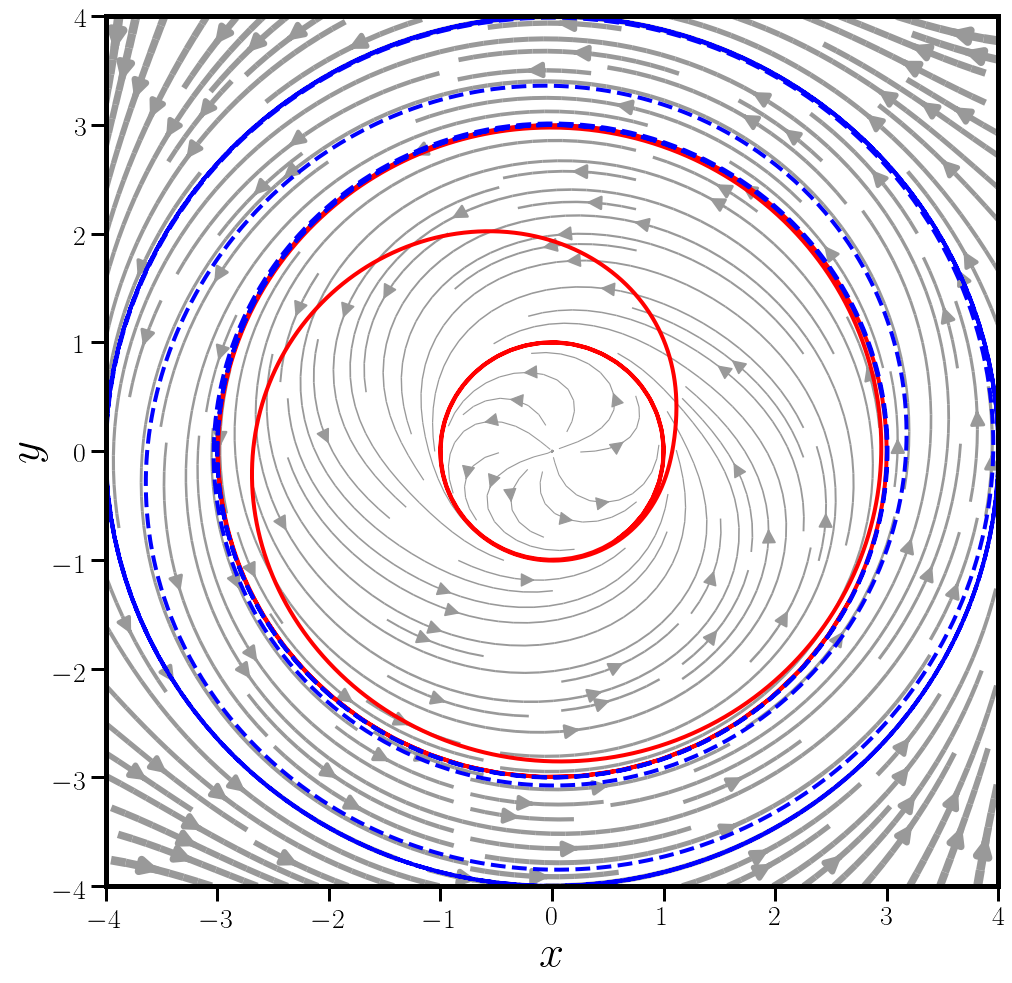

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Stream-plot

xmin, xmax = -4, 4
ymin, ymax = -4, 4

X, Y = np.meshgrid(np.linspace(xmin, xmax,400), np.linspace(ymin, ymax,400))
vx,vy=system_a(X,Y);
streamplot_linewidth=15
speed = np.sqrt(vx**2 + vy**2)
lw = (speed / speed.max())*(streamplot_linewidth_max - streamplot_linewidth_min) + streamplot_linewidth_min

ax.streamplot(X,Y, vx, vy, density=streamplot_density, color=streamplot_color, linewidth=lw, arrowsize=streamplot_arrowsize);

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Plot path

for mtype, p in paths:
    ff.set_order(int(len(m)/2))
    
    instanton_color = "blue" if mtype=="het" else sto_instanton_color
    instanton_linewidth = het_instanton_linewidth*0.8  if mtype=="het" else sto_instanton_linewidth*0.8
    instanton_linestyle = het_instanton_linestyle if mtype=="het" else sto_instanton_linestyle
    
    plt.plot(p[0,:], p[1,:], color=instanton_color, linewidth=instanton_linewidth, linestyle=instanton_linestyle)

# Plot fixed points

plt.plot(e_xa[0], e_xa[1], max_pt, mfc=max_pt_color, mec=max_pt_color, ms=max_pt_ms, mew=max_pt_mew)
plt.plot(e_xb[0], e_xb[1], min_pt, mfc=min_pt_color, mec=min_pt_color, ms=min_pt_ms, mew=min_pt_mew)

# Frame settings

ax.set_xlabel(r'$x$', fontsize=axes_font_size)
ax.set_ylabel(r'$y$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(plot_w, plot_h)

plt.savefig('concentric_limit_cycle_instanton.png', bbox_inches='tight')
plt.show()

## Spectral convergence

In [30]:
maier_stein_diffs = np.array([0.00256642,0.000204228,3.13115e-7,7.84595e-12,3.59267e-11,4.18543e-12,2.45287e-11,9.21331e-13,9.54975e-12,7.85039e-12,9.74143e-11,7.37987e-11,6.91297e-12,9.862e-12,4.15168e-13,2.0785e-12,2.14972e-12,8.02247e-13,5.6305e-13,9.80688e-12,5.82395e-12,2.63768e-10,2.63143e-10])
maier_stein_diffs_N = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

muller_brown_diffs = np.array([2.96294,0.0458204,0.000351533,9.45611e-6,0.0000301749,9.26087e-8,1.33167e-8,1.17899e-8,5.43082e-10,2.74264e-8,2.85484e-8,8.78143e-9,2.47596e-9,9.20306e-9,1.11888e-8,1.40454e-8,2.32868e-8,1.75908e-7,1.87077e-7,9.30666e-8,1.04036e-7,9.76872e-8,1.64627e-8,9.99107e-8,4.82072e-9,9.63245e-8,1.04158e-7,2.4429e-9,9.75422e-9,5.94682e-9,1.35985e-8,2.62105e-9,1.74585e-8,6.30616e-7,6.31864e-7,1.29367e-8,1.23629e-7,1.26155e-7,3.10455e-8,3.54369e-8,5.55565e-9,7.16536e-7,7.14917e-7,7.89501e-9,1.26293e-8])
muller_brown_diffs_N = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])

genetic_switch_diffs = np.array([0.36939,0.000183359,0.0000470638,2.04246e-6,4.45116e-8,2.21942e-8,2.65269e-9,1.57233e-8,4.60512e-9,2.61048e-9,7.81038e-10,1.24371e-8,4.14205e-9,1.81988e-10,6.22216e-9,3.00732e-9,4.95368e-9,2.62142e-9,3.5479e-9,1.40598e-9,3.58172e-8,3.58193e-9,1.07613e-9,1.49396e-9,2.40744e-9,5.37779e-9,1.62968e-9,7.18403e-9,2.02738e-6,0.0000111377])
genetic_switch_diffs_N = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
genetic_switch_diffs = genetic_switch_diffs[1:-4]
genetic_switch_diffs_N = genetic_switch_diffs_N[1:-4]

eggers_diffs = np.array([0.00811324,0.00441571,0.00117411,0.0000876049,0.0000185296,3.01153e-6,6.40796e-7,8.06351e-8,8.00877e-7,1.75764e-7,2.32272e-8,1.3841e-8,2.50671e-8,5.03006e-10,2.91724e-8,6.57692e-9,6.89893e-10,5.86919e-9,7.47437e-9,1.16678e-9,7.14653e-10,1.76537e-10,5.03503e-9,5.06363e-9,5.09683e-10,3.17386e-9,3.39845e-9,4.06896e-10])
eggers_diffs_N = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])

In [31]:
convergence_plot_color = "black"
convergence_plot_linewidth = 4
convergence_plot_ms = 12
convergence_plot_mew = 2
convergence_plot_font_size = 45
convergence_plot_w = 20
convergence_plot_h = 16

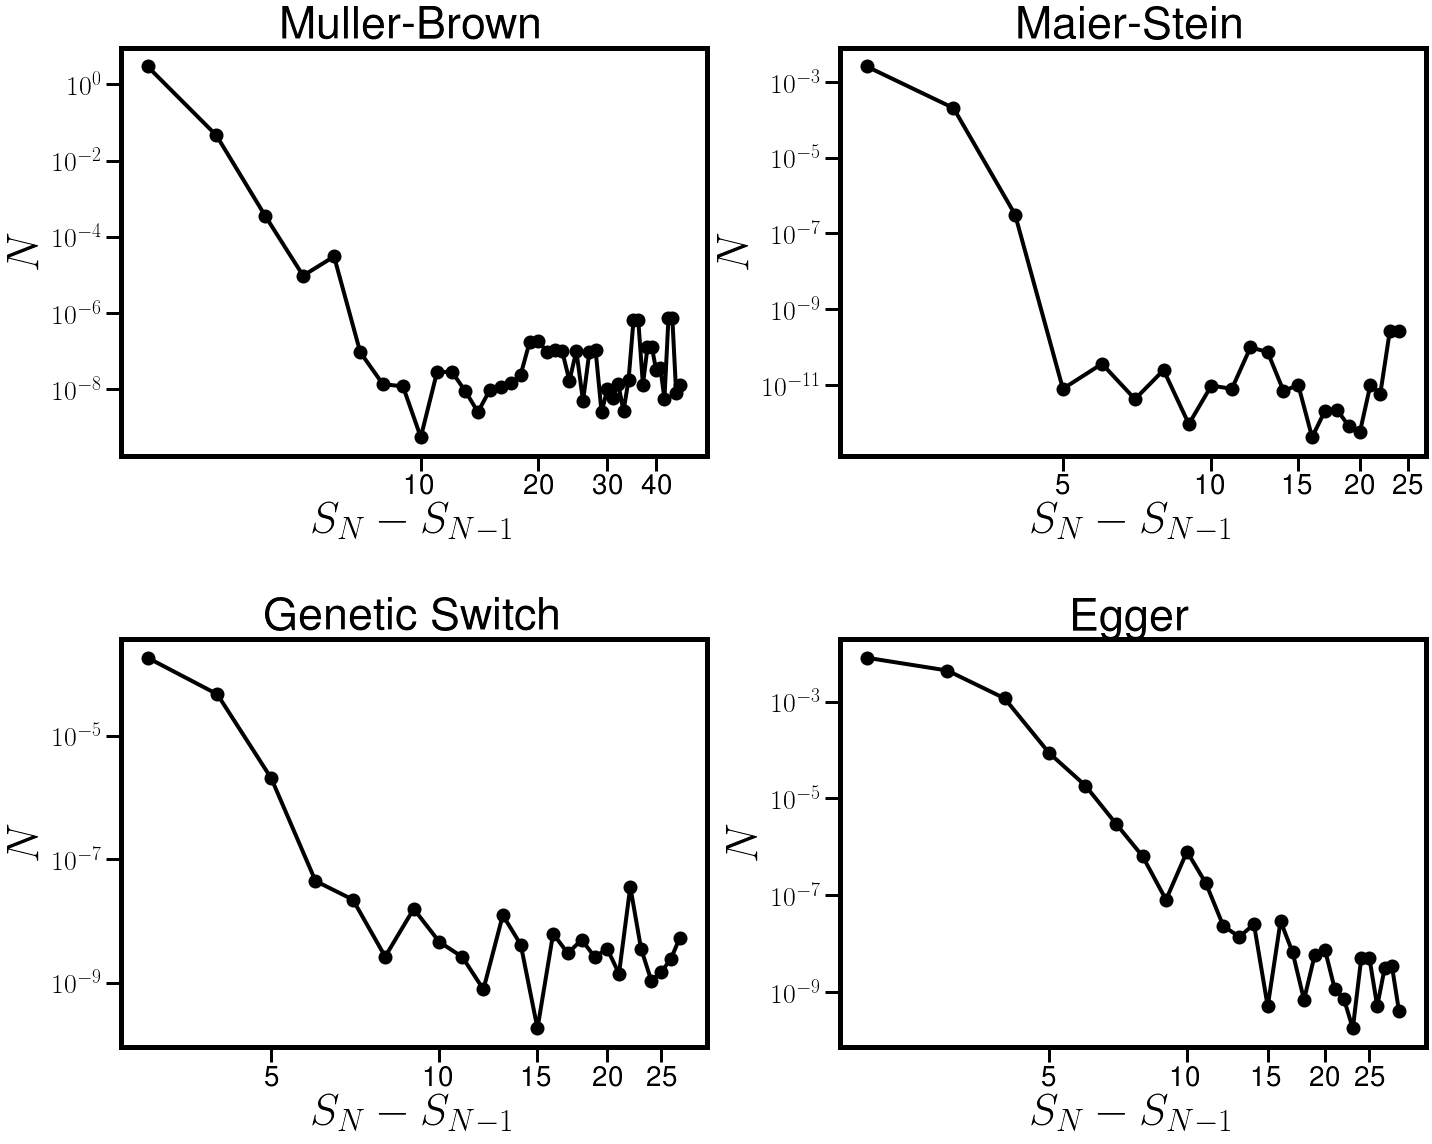

In [32]:
from matplotlib.ticker import FixedLocator, FixedFormatter

fig = plt.figure()

### Muller-Brown

ax = fig.add_subplot(221)
ax.set_title('Muller-Brown', fontsize=convergence_plot_font_size)
ax.loglog(muller_brown_diffs_N, muller_brown_diffs, "-o", ms=convergence_plot_ms, mew=convergence_plot_mew, color=convergence_plot_color, linewidth=convergence_plot_linewidth)
Ns_ticks = np.arange(0, 46, 10)
x_formatter = FixedFormatter(Ns_ticks)
x_locator = FixedLocator(Ns_ticks)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

##### Frame settings

ax.set_xlabel(r'$S_N - S_{N-1}$', fontsize=axes_font_size)
ax.set_ylabel(r'$N$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

### Maier-Stein

ax = fig.add_subplot(222)
ax.set_title('Maier-Stein', fontsize=convergence_plot_font_size)
ax.loglog(maier_stein_diffs_N, maier_stein_diffs, "-o", ms=convergence_plot_ms, mew=convergence_plot_mew, color=convergence_plot_color, linewidth=convergence_plot_linewidth)
Ns_ticks = np.arange(0, 26, 5)
x_formatter = FixedFormatter(Ns_ticks)
x_locator = FixedLocator(Ns_ticks)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

##### Frame settings

ax.set_xlabel(r'$S_N - S_{N-1}$', fontsize=axes_font_size)
ax.set_ylabel(r'$N$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)

### Genetic Switch

ax = fig.add_subplot(223)
ax.set_title('Genetic Switch', fontsize=convergence_plot_font_size)
ax.loglog(genetic_switch_diffs_N, genetic_switch_diffs, "-o", ms=convergence_plot_ms, mew=convergence_plot_mew, color=convergence_plot_color, linewidth=convergence_plot_linewidth)
Ns_ticks = np.arange(0, 29, 5)
x_formatter = FixedFormatter(Ns_ticks)
x_locator = FixedLocator(Ns_ticks)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

##### Frame settings

ax.set_xlabel(r'$S_N - S_{N-1}$', fontsize=axes_font_size)
ax.set_ylabel(r'$N$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)
    
### Eggers

ax = fig.add_subplot(224)
ax.set_title('Egger', fontsize=convergence_plot_font_size)
ax.loglog(eggers_diffs_N, eggers_diffs, "-o", ms=convergence_plot_ms, mew=convergence_plot_mew, color=convergence_plot_color, linewidth=convergence_plot_linewidth)
Ns_ticks = np.arange(0, 30, 5)
x_formatter = FixedFormatter(Ns_ticks)
x_locator = FixedLocator(Ns_ticks)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

##### Frame settings

ax.set_xlabel(r'$S_N - S_{N-1}$', fontsize=axes_font_size)
ax.set_ylabel(r'$N$', fontsize=axes_font_size)

ax.tick_params(axis='both', labelsize=tick_font_size, direction="out", length=tick_length, width=tick_width)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(axes_linewidth)
    
# Show and save figure

fig = mpl.pyplot.gcf()
fig.set_size_inches(convergence_plot_w, convergence_plot_h)

plt.tight_layout()
fig.subplots_adjust(hspace=0.45)
plt.savefig('spectral_convergence.png', bbox_inches='tight')
plt.show()